In [619]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [620]:
pd.reset_option('display.max_rows')

In [621]:
# pip install chardet

In [622]:
# import chardet

# Read the file in binary mode to detect encoding
# with open('attacks.csv', 'rb') as f:
#     raw_data = f.read()
#     result = chardet.detect(raw_data)
#     encoding = result['encoding']
#     print(f"Detected encoding: {encoding}")

In [623]:
# Let's open the file
with open('attacks.csv', 'r', encoding='windows-1252') as f:
    df = pd.read_csv(f)

In [624]:
df # let's take a general look at the df

Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   ...         Species   \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               Investigator or Source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href Case Number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

In [625]:
# hypothesis:
# - is there some relation between the age and the activity? yes but not really important
# - between the activity and the fatality? yes
# - between the species and the fatality?
# - between the type and country?
# - activity per country
# - fatality per oceans, in the US for instance (Florida)


In [626]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [627]:
# it looks like the last 2 columns have no meaning, they don't even have a name and all but 3 cells are NaN
df['Unnamed: 22'].isna().value_counts()

Unnamed: 22
True     25722
False        1
Name: count, dtype: int64

In [628]:
df['Unnamed: 23'].isna().value_counts()

Unnamed: 23
True     25721
False        2
Name: count, dtype: int64

In [629]:
# let's just get rid of them
df22columns = df.drop(columns=['Unnamed: 22', 'Unnamed: 23'])

In [630]:
df22columns.shape

(25723, 22)

In [631]:
df22columns.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
dtype: int64

In [632]:
dfnulls2 = df22columns['Case Number'].isna()
dfnulls2

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722    False
Name: Case Number, Length: 25723, dtype: bool

In [633]:
# we still have a lot of Nan values

dfnulls = df22columns[df22columns['Case Number'].isna()]
dfnulls

Case Number                  Date    Year      Type Country     Area  \
5488          NaN  Reported 06-Sep-1905  1905.0  Provoked     USA  Florida   
8702          NaN                   NaN     NaN       NaN     NaN      NaN   
8703          NaN                   NaN     NaN       NaN     NaN      NaN   
8704          NaN                   NaN     NaN       NaN     NaN      NaN   
8705          NaN                   NaN     NaN       NaN     NaN      NaN   
...           ...                   ...     ...       ...     ...      ...   
25717         NaN                   NaN     NaN       NaN     NaN      NaN   
25718         NaN                   NaN     NaN       NaN     NaN      NaN   
25719         NaN                   NaN     NaN       NaN     NaN      NaN   
25720         NaN                   NaN     NaN       NaN     NaN      NaN   
25721         NaN                   NaN     NaN       NaN     NaN      NaN   

                           Location Activity         Name Sex   ...  \
5488   Fort Pierce, St Lucie County  Fishing  David Curry    M  ...   
8702                            NaN      NaN          NaN  NaN  ...   
8703                            NaN      NaN          NaN  NaN  ...   
8704                            NaN      NaN          NaN  NaN  ...   
8705                            NaN      NaN          NaN  NaN  ...   
...                             ...      ...          ...  ...  ...   
25717                           NaN      NaN          NaN  NaN  ...   
25718                           NaN      NaN          NaN  NaN  ...   
25719                           NaN      NaN          NaN  NaN  ...   
25720                           NaN      NaN          NaN  NaN  ...   
25721                           NaN      NaN          NaN  NaN  ...   

      Fatal (Y/N) Time Species           Investigator or Source  \
5488            N  NaN      NaN  Muncie Evening Press, 8/6/1913   
8702          NaN  NaN      NaN                             NaN   
8703          NaN  NaN      NaN                             NaN   
8704          NaN  NaN      NaN                             NaN   
8705          NaN  NaN      NaN                             NaN   
...           ...  ...      ...                             ...   
25717         NaN  NaN      NaN                             NaN   
25718         NaN  NaN      NaN                             NaN   
25719         NaN  NaN      NaN                             NaN   
25720         NaN  NaN      NaN                             NaN   
25721         NaN  NaN      NaN                             NaN   

                          pdf  \
5488   1905.09.06.R-Curry.pdf   
8702                      NaN   
8703                      NaN   
8704                      NaN   
8705                      NaN   
...                       ...   
25717                     NaN   
25718                     NaN   
25719                     NaN   
25720                     NaN   
25721                     NaN   

                                            href formula  \
5488   http://sharkattackfile.net/spreadsheets/pdf_di...   
8702                                                 NaN   
8703                                                 NaN   
8704                                                 NaN   
8705                                                 NaN   
...                                                  ...   
25717                                                NaN   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   

                                                    href Case Number.1  \
5488   http://sharkattackfile.net/spreadsheets/pdf_di...  1905.09.06.R   
8702                                                 NaN           NaN   
8703                                                 NaN           NaN 

In [634]:
dfnulls['Case Number.1'].isna().sum()

17020

In [635]:
# we can see that every row in the column 'Case Number' is null except one row.
# we can also see that 'Case Number' is actually the date, which we also have in the columns 'Case Number.1' and 'Case Number.2'
# so we can just delete all the rows where 'Case Number.1' has null values

In [636]:
dfnocasenumber1 = df22columns.dropna(subset=['Case Number.1'])

In [637]:
dfnocasenumber1.shape # we got rid of 8.000+ rows with Null values, but there are still a lot of Nulls

(6302, 22)

In [638]:
dfnocasenumber1.isna().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

In [639]:
# let's take a look at the nulls in 'Year'
dfyear = dfnocasenumber1[dfnocasenumber1['Year'].isna()]
dfyear

Case Number                  Date  Year        Type    Country  \
187   2017.01.08.R  Reported 08-Jan-2017   NaN     Invalid  AUSTRALIA   
6079  1836.08.19.R  Reported 19-Aug-1836   NaN  Unprovoked    ENGLAND   

            Area    Location      Activity          Name Sex   ...  \
187   Queensland         NaN  Spearfishing  Kerry Daniel    M  ...   
6079  Cumberland  Whitehaven      Swimming         a boy    M  ...   

     Fatal (Y/N) Time    Species   Investigator or Source  \
187          NaN  NaN  Bull shark  Liquid Vision 1/8/2017   
6079           Y  NaN         NaN          C. Moore, GSAF   

                               pdf  \
187   2017.01.08.R-KerryDaniel.pdf   
6079   1835.08.19.R-Whitehaven.pdf   

                                           href formula  \
187   http://sharkattackfile.net/spreadsheets/pdf_di...   
6079  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href Case Number.1  \
187   http://sharkattackfile.net/spreadsheets/pdf_di...  2017.01.08.R   
6079  http://sharkattackfile.net/spreadsheets/pdf_di...  1836.08.19.R   

     Case Number.2 original order  
187   2017.01.08.R         6116.0  
6079  1836.08.19.R          224.0  

[2 rows x 22 columns]

In [640]:
# let's change these values
dfnocasenumber1.at[187,'Year'] = 2017
dfnocasenumber1.at[6079,'Year'] = 1836

In [641]:
dfnocasenumber1.iloc[187,:] # we check if it has been changed correctly

Case Number                                                    2017.01.08.R
Date                                                   Reported 08-Jan-2017
Year                                                                 2017.0
Type                                                                Invalid
Country                                                           AUSTRALIA
Area                                                             Queensland
Location                                                                NaN
Activity                                                       Spearfishing
Name                                                           Kerry Daniel
Sex                                                                       M
Age                                                                      35
Injury                               No attack, shark made a threat display
Fatal (Y/N)                                                             NaN
Time        

In [642]:
dfnocasenumber1.iloc[6079,:] # we check if it has been changed correctly

Case Number                                                    1836.08.19.R
Date                                                   Reported 19-Aug-1836
Year                                                                 1836.0
Type                                                             Unprovoked
Country                                                             ENGLAND
Area                                                             Cumberland
Location                                                         Whitehaven
Activity                                                           Swimming
Name                                                                  a boy
Sex                                                                       M
Age                                                                     NaN
Injury                                                                FATAL
Fatal (Y/N)                                                               Y
Time        

In [643]:
dfyear = dfnocasenumber1['Year'].isna()
dfnocasenumber1[dfyear] # we check if it has been changed correctly

Empty DataFrame
Columns: [Case Number, Date, Year, Type, Country, Area, Location, Activity, Name, Sex , Age, Injury, Fatal (Y/N), Time, Species , Investigator or Source, pdf, href formula, href, Case Number.1, Case Number.2, original order]
Index: []

[0 rows x 22 columns]

In [644]:
dfnocasenumber1.isna().sum()

Case Number                  1
Date                         0
Year                         0
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

In [645]:
# let's check if we can delete some more rows with these null values

In [646]:
# but first let's change the name
df2 = dfnocasenumber1
df2.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [647]:
dfType = df2['Type'].isna()
df2[dfType]

Case Number                  Date    Year Type    Country  \
85    2017.09.15.a           15-Sep-2017  2017.0  NaN      SAMOA   
382     2015.07.27           27-Jul-2015  2015.0  NaN  AUSTRALIA   
4867  1936.09.11.R  Reported 11-Sep-1936  1936.0  NaN    VIETNAM   
5705  1890.03.03.R  Reported 03-Mar-1890  1890.0  NaN     CEYLON   

               Area          Location           Activity           Name Sex   \
85     Upolu Island         Nofoali’i            Fishing           male    M   
382        Victoria  Tyrendarra Beach            Surfing           male    M   
4867            NaN            Saigon  Wreck of a sampam         8 crew    M   
5705            NaN               NaN             Diving  a pearl diver    M   

      ... Fatal (Y/N)   Time Species             Investigator or Source  \
85    ...           N  Night      NaN         Samoa Observer, 9/16/2017   
382   ...         NaN    NaN      NaN                               NaN   
4867  ...           Y    NaN      NaN  Lansing State Journal, 9/11/1936   
5705  ...           Y    NaN      NaN            The Guardian, 3/3/1890   

                          pdf  \
85     2017.09.15.a-Samoa.pdf   
382   2015.07.27-Victoria.pdf   
4867    1936.09.11-Saigon.pdf   
5705  1890.03.03.R-Ceylon.pdf   

                                           href formula  \
85    http://sharkattackfile.net/spreadsheets/pdf_di...   
382   http://sharkattackfile.net/spreadsheets/pdf_di...   
4867  http://sharkattackfile.net/spreadsheets/pdf_di...   
5705  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href Case Number.1  \
85    http://sharkattackfile.net/spreadsheets/pdf_di...  2017.09.15.a   
382   http://sharkattackfile.net/spreadsheets/pdf_di...    2015.07.27   
4867  http://sharkattackfile.net/spreadsheets/pdf_di...  1936.09.11.R   
5705  http://sharkattackfile.net/spreadsheets/pdf_di...  1890.03.03.R   

     Case Number.2 original order  
85    2017.09.15.a         6218.0  
382     2015.07.27         5921.0  
4867  1936.09.11.R         1436.0  
5705  1890.03.03.R          598.0  

[4 rows x 22 columns]

In [648]:
# we cannot delete these rows

In [649]:
dfhreff = df2['href formula'].isna()
df2[dfhreff] # let's keep this row as well

Case Number         Date    Year        Type    Country             Area  \
3244  1975.01.19  19-Jan-1975  1975.0  Unprovoked  AUSTRALIA  South Australia   

        Location Activity             Name Sex   ... Fatal (Y/N) Time  \
3244  Coffin Bay  Surfing  David Barrowman    M  ...           Y  NaN   

     Species                              Investigator or Source  \
3244      NaN  J. West; Adelaide Advertiser, 1/20/1975; P. Ke...   

                           pdf href formula  \
3244  1975.01.19-Barrowman.pdf          NaN   

                                                   href Case Number.1  \
3244  http://sharkattackfile.net/spreadsheets/pdf_di...    1975.01.19   

     Case Number.2 original order  
3244    1975.01.19         3059.0  

[1 rows x 22 columns]

In [650]:
dfcountry = df2['Country'].isna()
df2[dfcountry].head()

Case Number                  Date    Year        Type Country  \
62    2017.11.13.R  Reported 13-Nov-2017  2017.0  Unprovoked     NaN   
525     2014.08.00              Aug-2014  2014.0     Invalid     NaN   
2956  1983.00.00.d              Ca. 1983  1983.0  Unprovoked     NaN   
3378    1970.11.00              Nov-1970  1970.0  Unprovoked     NaN   
3387    1970.08.02           02-Aug-1970  1970.0     Invalid     NaN   

                 Area                   Location  \
62                NaN                        NaN   
525               NaN                        NaN   
2956  English Channel                        NaN   
3378              NaN                        NaN   
3387    Caribbean Sea  Between St. Kitts & Nevis   

                                         Activity  \
62                                        Surfing   
525                                  Sea disaster   
2956                                     Swimming   
3378                                          NaN   
3387  Sea Disaster Sinking of ferryboat Christina   

                                    Name Sex   ... Fatal (Y/N)       Time  \
62                         Timur Yunusov    M  ...           N        NaN   
525                       Cuban refugees    M  ...         NaN        NaN   
2956  Padma Shri Taranath Narayan Shenoy    M  ...           N        NaN   
3378                       Heinz Plotsky    M  ...           N        NaN   
3387                                 NaN  NaN  ...         NaN  Afternoon   

                                               Species   \
62                                                  NaN   
525                     Shark involvement not confirmed   
2956                                                NaN   
3378                                                NaN   
3387  Shark involvement prior to death was not confi...   

                      Investigator or Source  \
62                                 Instagram   
525             Associated Press, 11/27/2014   
2956                Times of India, 2/5/2012   
3378   H.D. Baldridge (1994), SAF Case #1645   
3387             Rome News Tribune, 8/3/1970   

                                     pdf  \
62                2017.11.13.R-Timur.pdf   
525        2014.08.00-Cuban-refugees.pdf   
2956             1983.00.00.d-Shenoy.pdf   
3378           1970.11.00-NV-Plotsky.pdf   
3387  1970.08.02-Christina-ferryboat.pdf   

                                           href formula  \
62    http://sharkattackfile.net/spreadsheets/pdf_di...   
525   http://sharkattackfile.net/spreadsheets/pdf_di...   
2956  http://sharkattackfile.net/spreadsheets/pdf_di...   
3378  http://sharkattackfile.net/spreadsheets/pdf_di...   
3387  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href Case Number.1  \
62    http://sharkattackfile.net/spreadsheets/pdf_di...  2017.11.13.R   
525   http://sharkattackfile.net/spreadsheets/pdf_di...    2014.08.00   
2956  http://sharkattackfile.net/spreadsheets/pdf_di...  1983.00.00.d   
3378  http://sharkattackfile.net/spreadsheets/pdf_di...    1970.11.00   
3387  http://sharkattackfile.net/spreadsheets/pdf_di...    1970.08.02   

     Case Number.2 original order  
62    2017.11.13.R         6241.0  
525     2014.08.00         5778.0  
2956  1983.00.00.d         3347.0  
3378    1970.11.00         2925.0  
3387    1970.08.02         2916.0  

[5 rows x 22 columns]

In [651]:
# since we cannot determine these countries, let's change the value so we don't have nulls

In [652]:
df2['Country'] = np.where(df2.Country.isna(), 'Undetermined', df2.Country)

In [653]:
# we check if it has been changed correctly
dfcountry = df2[df2['Country'].isna()]
dfcountry

Empty DataFrame
Columns: [Case Number, Date, Year, Type, Country, Area, Location, Activity, Name, Sex , Age, Injury, Fatal (Y/N), Time, Species , Investigator or Source, pdf, href formula, href, Case Number.1, Case Number.2, original order]
Index: []

[0 rows x 22 columns]

In [654]:
# correct, now there are no nulls in the column 'Country'
# now let's examine the columns and see if we can delete some more
df2.head()

Case Number         Date    Year        Type    Country             Area  \
0  2018.06.25  25-Jun-2018  2018.0     Boating        USA       California   
1  2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2  2018.06.09  09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3  2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity             Name Sex   ...  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe    F  ...   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely     F  ...   
2                    Habush, Oahu      Surfing      John Denges    M  ...   
3              Arrawarra Headland      Surfing             male    M  ...   
4                        La Ticla  Free diving   Gustavo Ramos     M  ...   

  Fatal (Y/N)           Time         Species           Investigator or Source  \
0           N          18h00      White shark                R. Collier, GSAF   
1           N  14h00  -15h00              NaN  K.McMurray, TrackingSharks.com   
2           N          07h45              NaN  K.McMurray, TrackingSharks.com   
3           N            NaN        2 m shark                  B. Myatt, GSAF   
4           N            NaN  Tiger shark, 3m                       A .Kipper   

                        pdf  \
0      2018.06.25-Wolfe.pdf   
1    2018.06.18-McNeely.pdf   
2     2018.06.09-Denges.pdf   
3  2018.06.08-Arrawarra.pdf   
4      2018.06.04-Ramos.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.18   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.09   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.08   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.04   

  Case Number.2 original order  
0    2018.06.25         6303.0  
1    2018.06.18         6302.0  
2    2018.06.09         6301.0  
3    2018.06.08         6300.0  
4    2018.06.04         6299.0  

[5 rows x 22 columns]

In [655]:
df2.shape

(6302, 22)

In [656]:
# There are two columns that look the same, let's check if they are actually the same
(df2['Case Number.1'] == df2['Case Number.2']).value_counts()

True     6282
False      20
Name: count, dtype: int64

In [657]:
# well no, there are 20 rows where the values are different
# let's create a subset
df3 = df2[(df2['Case Number.1'] != df2['Case Number.2'])]
df3

Case Number                                  Date    Year  \
34      2018.04.03                           03-Apr-2018  2018.0   
117   2017.07.20.a                           20-Jul-2017  2017.0   
144     2017.05.06                           05-May-2017  2017.0   
217     2016.09.15                           16-Sep-2016  2016.0   
314   2016.01.24.b                           24-Jan-2016  2016.0   
334     2015.12.23                           07-Nov-2015  2015.0   
339   2015.10.28.a                           28-Oct-2015  2015.0   
560     2014.05.04                           04-May-2014  2014.0   
3522    1967.07.05                           05-Jul-1967  1967.0   
3795  1962,08.30.b                           30-Aug-1962  1962.0   
3880  1961.09.02.R                  Reported 06-Sep-1961  1961.0   
4403    1952.08.05                           05-Aug-1952  1952.0   
4425  1851.12.15.R                        \n1951.12.15.R  1951.0   
5275  1900.00.00.R  Reported to have taken place in 1919  1919.0   
5358  1913.07.10.R                  Reported 10-Jul-1913  1913.0   
5386  1911.07.31.R                  Reported 31-Jul-1911  1911.0   
5777  1884.04.38.R                  Reported 28-Apr-1884  1884.0   
5883  1876.06.18.R                 Reported 18-Jun- 1874  1874.0   
6009    1853,94.29                           29-Apr-1853  1853.0   
6122  1808.06.01.R                  Reported 01-May-1808  1808.0   

              Type       Country                   Area  \
34      Unprovoked  SOUTH AFRICA  Eastern Cape Province   
117     Unprovoked           USA             California   
144     Unprovoked        MEXICO    Baja California Sur   
217     Unprovoked     AUSTRALIA               Victoria   
314     Unprovoked           USA                  Texas   
334        Invalid           USA                Florida   
339     Unprovoked           USA                 Hawaii   
560     Unprovoked  SOUTH AFRICA  Western Cape Province   
3522    Unprovoked        TURKEY         Mugla Province   
3795          Boat        TURKEY       Antalya Province   
3880      Provoked         ITALY        Venice Province   
4403      Provoked         ITALY                 Teramo   
4425       Invalid    MOZAMBIQUE        Sofala Province   
5275       Boating         ITALY                    NaN   
5358    Unprovoked    COSTA RICA                    NaN   
5386    Unprovoked         SPAIN                Málaga    
5777    Unprovoked        BRAZIL                    NaN   
5883    Unprovoked        MEXICO              Veracruz    
6009    Unprovoked        GREECE                 Corfu    
6122  Sea Disaster       ANTIGUA                    NaN   

                                       Location  \
34                              St. Francis Bay   
117      Seal Rock, Goleta Beach, Santa Barbara   
144                   Los Arbolitos, Cabo Pulmo   
217                                 Bells Beach   
314                                Off Surfside   
334   Paradise Beach, Melbourne, Brevard County   
339                                Malaka, Oahu   
560                                  Simonstown   
3522                            Kucukada Island   
3795                                     Ucagiz   
3880                                   Chioggia   
4403                                 Giulianova   
4425                                      Beira   
5275                                     Savona   
5358                                 Port Limon   
5386                                      Ceuta   
5777                                      Bahia   
5883                     Tlacotalpan, Vera Cruz   
6009                                        NaN   
6122                           Falmouth Harbour   

                                     Activity  \
34                                    Surfing   
117                                       SUP   
144                                Snorkeling   
217                                   Surfing   
314                  

In [658]:
# it is a bit strange, it looks like both columns are dates but sometimes it doesn't coincide with the 'Date' column
# let's isolate these columns to see it better
columnscasenumber = ['Date','Case Number','Case Number.1','Case Number.2']
dfcasenumberstudy=df3[columnscasenumber]
dfcasenumberstudy

Date   Case Number Case Number.1  \
34                             03-Apr-2018    2018.04.03    2018.04.02   
117                            20-Jul-2017  2017.07.20.a  2017/07.20.a   
144                            05-May-2017    2017.05.06    2017.06.06   
217                            16-Sep-2016    2016.09.15    2016.09.16   
314                            24-Jan-2016  2016.01.24.b  2015.01.24.b   
334                            07-Nov-2015    2015.12.23    2015.11.07   
339                            28-Oct-2015  2015.10.28.a    2015.10.28   
560                            04-May-2014    2014.05.04    2013.05.04   
3522                           05-Jul-1967    1967.07.05    1967/07.05   
3795                           30-Aug-1962  1962,08.30.b  1962.08.30.b   
3880                  Reported 06-Sep-1961  1961.09.02.R  1961.09,06.R   
4403                           05-Aug-1952    1952.08.05    1952.08.04   
4425                        \n1951.12.15.R  1851.12.15.R  1951.12.15.R   
5275  Reported to have taken place in 1919  1900.00.00.R  1919.00.00.R   
5358                  Reported 10-Jul-1913  1913.07.10.R  1913.17.10.R   
5386                  Reported 31-Jul-1911  1911.07.31.R  1911.07.31.T   
5777                  Reported 28-Apr-1884  1884.04.38.R  1884.04.28.R   
5883                 Reported 18-Jun- 1874  1876.06.18.R  1874.06.18.R   
6009                           29-Apr-1853    1853,94.29    1853.04.29   
6122                  Reported 01-May-1808  1808.06.01.R  1808.05.01.R   

     Case Number.2  
34      2018.04.03  
117   2017.07.20.a  
144     2017.05.06  
217     2016.09.15  
314   2016.01.24.b  
334     2015.12.23  
339   2015.10.28.a  
560     2014.05.04  
3522    1967.07.05  
3795  1962,08.30.b  
3880  1961.09.02.R  
4403    1952.08.05  
4425  1851.12.15.R  
5275  1900.00.00.R  
5358  1913.07.10.R  
5386  1911.07.31.R  
5777  1884.04.38.R  
5883  1876.06.18.R  
6009    1853,94.29  
6122  1808.06.01.R

In [659]:
df2.shape

(6302, 22)

In [660]:
# we will just keep one of these columns, 'Date' and 'Case Number' show almost the same info.
# we will keep 'Case Number' because of the format
dflesscolumns = df2.drop(columns=['Case Number.1','Case Number.2','Date'])
dflesscolumns.shape

(6302, 19)

In [661]:
# we can change the name of this column to make it clearer
dflesscolumns.rename(columns={'Case Number':'Date'}, inplace=True)

In [662]:
# the 'href' and 'href formula' columns display a pdf, let's try to open it
dflesscolumns.loc[0,'href']

'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf'

In [663]:
# since we cannot open it, we will just erase these columns as well
dfnohref = dflesscolumns.drop(columns=['href','href formula'])
dfnohref.shape

(6302, 17)

In [664]:
# let's erase also the 'pdf' column, since it's also a pdf we cannot open
dfnopdf = dfnohref.drop(columns='pdf')
dfnopdf.shape

(6302, 16)

In [665]:
# it looks like 'original order' is an index
dfnopdf['original order'].value_counts()

original order
569.0     2
6303.0    1
2106.0    1
2097.0    1
2098.0    1
         ..
4205.0    1
4206.0    1
4207.0    1
4208.0    1
2.0       1
Name: count, Length: 6301, dtype: int64

In [666]:
# only one value is repeted, we can erase the column
dfnooriginalorder = dfnopdf.drop(columns='original order')
dfnooriginalorder

Date    Year        Type             Country               Area  \
0     2018.06.25  2018.0     Boating                 USA         California   
1     2018.06.18  2018.0  Unprovoked                 USA            Georgia   
2     2018.06.09  2018.0     Invalid                 USA             Hawaii   
3     2018.06.08  2018.0  Unprovoked           AUSTRALIA    New South Wales   
4     2018.06.04  2018.0    Provoked              MEXICO             Colima   
...          ...     ...         ...                 ...                ...   
6297     ND.0005     0.0  Unprovoked           AUSTRALIA  Western Australia   
6298     ND.0004     0.0  Unprovoked           AUSTRALIA  Western Australia   
6299     ND.0003     0.0  Unprovoked                 USA     North Carolina   
6300     ND.0002     0.0  Unprovoked              PANAMA                NaN   
6301     ND.0001     0.0  Unprovoked  CEYLON (SRI LANKA)   Eastern Province   

                                 Location      Activity  \
0             Oceanside, San Diego County      Paddling   
1          St. Simon Island, Glynn County      Standing   
2                            Habush, Oahu       Surfing   
3                      Arrawarra Headland       Surfing   
4                                La Ticla   Free diving   
...                                   ...           ...   
6297                          Roebuck Bay        Diving   
6298                                  NaN  Pearl diving   
6299                       Ocracoke Inlet      Swimming   
6300                 Panama Bay 8ºN, 79ºW           NaN   
6301  Below the English fort, Trincomalee      Swimming   

                       Name Sex   Age  \
0               Julie Wolfe    F   57   
1           Adyson McNeely     F   11   
2               John Denges    M   48   
3                      male    M  NaN   
4            Gustavo Ramos     M  NaN   
...                     ...  ...  ...   
6297                   male    M  NaN   
6298                  Ahmun    M  NaN   
6299  Coast Guard personnel    M  NaN   
6300        Jules Patterson    M  NaN   
6301                   male    M   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

               Time         Species                  Investigator or Source  
0             18h00      White shark                       R. Collier, GSAF  
1     14h00  -15h00              NaN         K.McMurray, TrackingSharks.com  
2             07h45              NaN         K.McMurray, TrackingSharks.com  
3               NaN        2 m shark                         B. Myatt, GSAF  
4               NaN  Tiger shark, 3m                              A .Kipper  
...             ...              ...                                    ...  
6297            NaN              NaN       H. Taunton; N. Bartlett,  p. 234  
6298            NaN              NaN  H. Taunton; N. Bartlett,  pp. 233-234  
6299            NaN              NaN   F. Schwartz, p.23; C. Creswell, GSAF  
6300            NaN              NaN                    The Sun, 10/20/1938  
6301            NaN              NaN                             S.W. Baker  

[6302 rows x 15 columns]

In [667]:
# convert the type of the 'Year' column
df4 = dfnooriginalorder
df4.Year.dtype

dtype('float64')

In [668]:
df4.Year = df4.Year.astype(int)

In [669]:
df4

Date  Year        Type             Country               Area  \
0     2018.06.25  2018     Boating                 USA         California   
1     2018.06.18  2018  Unprovoked                 USA            Georgia   
2     2018.06.09  2018     Invalid                 USA             Hawaii   
3     2018.06.08  2018  Unprovoked           AUSTRALIA    New South Wales   
4     2018.06.04  2018    Provoked              MEXICO             Colima   
...          ...   ...         ...                 ...                ...   
6297     ND.0005     0  Unprovoked           AUSTRALIA  Western Australia   
6298     ND.0004     0  Unprovoked           AUSTRALIA  Western Australia   
6299     ND.0003     0  Unprovoked                 USA     North Carolina   
6300     ND.0002     0  Unprovoked              PANAMA                NaN   
6301     ND.0001     0  Unprovoked  CEYLON (SRI LANKA)   Eastern Province   

                                 Location      Activity  \
0             Oceanside, San Diego County      Paddling   
1          St. Simon Island, Glynn County      Standing   
2                            Habush, Oahu       Surfing   
3                      Arrawarra Headland       Surfing   
4                                La Ticla   Free diving   
...                                   ...           ...   
6297                          Roebuck Bay        Diving   
6298                                  NaN  Pearl diving   
6299                       Ocracoke Inlet      Swimming   
6300                 Panama Bay 8ºN, 79ºW           NaN   
6301  Below the English fort, Trincomalee      Swimming   

                       Name Sex   Age  \
0               Julie Wolfe    F   57   
1           Adyson McNeely     F   11   
2               John Denges    M   48   
3                      male    M  NaN   
4            Gustavo Ramos     M  NaN   
...                     ...  ...  ...   
6297                   male    M  NaN   
6298                  Ahmun    M  NaN   
6299  Coast Guard personnel    M  NaN   
6300        Jules Patterson    M  NaN   
6301                   male    M   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

               Time         Species                  Investigator or Source  
0             18h00      White shark                       R. Collier, GSAF  
1     14h00  -15h00              NaN         K.McMurray, TrackingSharks.com  
2             07h45              NaN         K.McMurray, TrackingSharks.com  
3               NaN        2 m shark                         B. Myatt, GSAF  
4               NaN  Tiger shark, 3m                              A .Kipper  
...             ...              ...                                    ...  
6297            NaN              NaN       H. Taunton; N. Bartlett,  p. 234  
6298            NaN              NaN  H. Taunton; N. Bartlett,  pp. 233-234  
6299            NaN              NaN   F. Schwartz, p.23; C. Creswell, GSAF  
6300            NaN              NaN                    The Sun, 10/20/1938  
6301            NaN              NaN                             S.W. Baker  

[6302 rows x 15 columns]

In [670]:
# there are a lot of value = 0 in 'Year', let's take a closer look
df4[df4['Year'] == 0]

Date  Year          Type             Country               Area  \
6177  0000.0214     0    Unprovoked        Undetermined         Ionian Sea   
6178  0000.0336     0    Unprovoked              GREECE            Piraeus   
6179  0000.0493     0  Sea Disaster              GREECE       Off Thessaly   
6180  0000.0725     0  Sea Disaster               ITALY     Tyrrhenian Sea   
6181    ND-0154     0    Unprovoked              CANADA                NaN   
...         ...   ...           ...                 ...                ...   
6297    ND.0005     0    Unprovoked           AUSTRALIA  Western Australia   
6298    ND.0004     0    Unprovoked           AUSTRALIA  Western Australia   
6299    ND.0003     0    Unprovoked                 USA     North Carolina   
6300    ND.0002     0    Unprovoked              PANAMA                NaN   
6301    ND.0001     0    Unprovoked  CEYLON (SRI LANKA)   Eastern Province   

                                               Location  \
6177                                                NaN   
6178                          In the haven of Cantharus   
6179                                                NaN   
6180  Krater found during excavations at Lacco Ameno...   
6181                                        Grand Banks   
...                                                 ...   
6297                                        Roebuck Bay   
6298                                                NaN   
6299                                     Ocracoke Inlet   
6300                               Panama Bay 8ºN, 79ºW   
6301                Below the English fort, Trincomalee   

                                               Activity  \
6177                              Ascending from a dive   
6178  Washing his pig in preparation for a religious...   
6179                          Shipwrecked Persian Fleet   
6180                                          Shipwreck   
6181                                            Fishing   
...                                                 ...   
6297                                             Diving   
6298                                       Pearl diving   
6299                                           Swimming   
6300                                                NaN   
6301                                           Swimming   

                            Name Sex   Age  \
6177     Tharsys, a sponge diver    M  NaN   
6178  A candidate for initiation    M  NaN   
6179                       males    M  NaN   
6180                       males    M  NaN   
6181                  Joe Folsom    M  NaN   
...                          ...  ...  ...   
6297                        male    M  NaN   
6298                       Ahmun    M  NaN   
6299       Coast Guard personnel    M  NaN   
6300             Jules Patterson    M  NaN   
6301                        male    M   15   

                                                 Injury Fatal (Y/N) Time  \
6177                      FATAL, shark/s bit him in two           Y  NaN   
6178  FATAL, shark "bit off all lower parts of him u...           Y  NaN   
6179  Herodotus tells of sharks attacking men in the...           Y  NaN   
6180  Depicts shipwrecked sailors  attacked by a sha...           Y  NaN   
6181                                         Arm bitten           N  NaN   
...                                                 ...         ...  ...   
6297                                              FATAL           Y  NaN   
6298                                              FATAL           Y  NaN   
6299                                              FATAL           Y  NaN   
6300                                              FATAL           Y  NaN   
6301  FATAL. "Shark bit him in half, carrying away t...           Y  NaN   

     Species                              Investigator or Source  
6177      NaN  Reported by Greek poet, Leonidas of Tarentum (...  
6178      NaN  Plutarch (45 - 125 A.D.) in Life of Phoec

<Axes: xlabel='Year', ylabel='Count'>

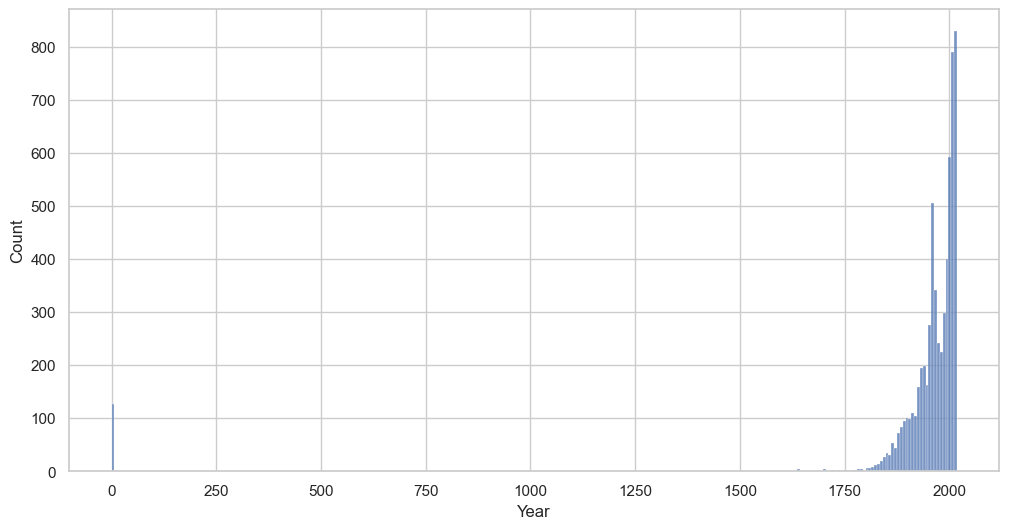

In [671]:
# looks like these 'ND.00XX' in 'Case Number' could mean 'No Data', since we don't have information of the year
# plus, we can see some info of the aproximate year in 'Investigator or Source'

import seaborn as sns
import matplotlib.pyplot as plt

# let's take a look at it visually
sns.histplot(data=df4, x='Year')

In [672]:
df4.shape

(6302, 15)

In [673]:
# we can see that most of the data is from 1700, so let's erase these values before this year
dffrom1700 = df4[df4['Year']>1700]

In [674]:
dffrom1700.shape

(6161, 15)

<Axes: xlabel='Year', ylabel='Count'>

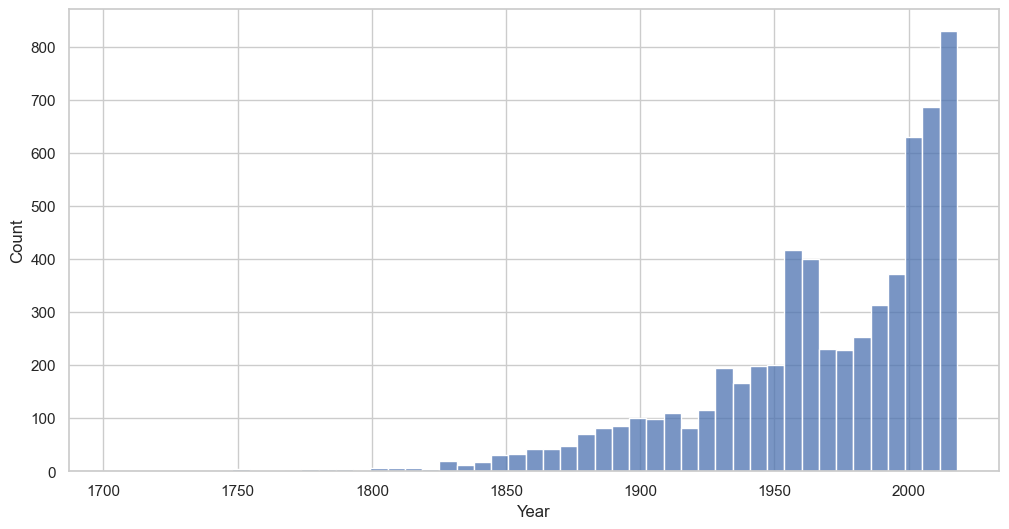

In [675]:
# let's take a newer look at it visually 
sns.histplot(data=dffrom1700, x='Year')

<Axes: xlabel='Year', ylabel='Count'>

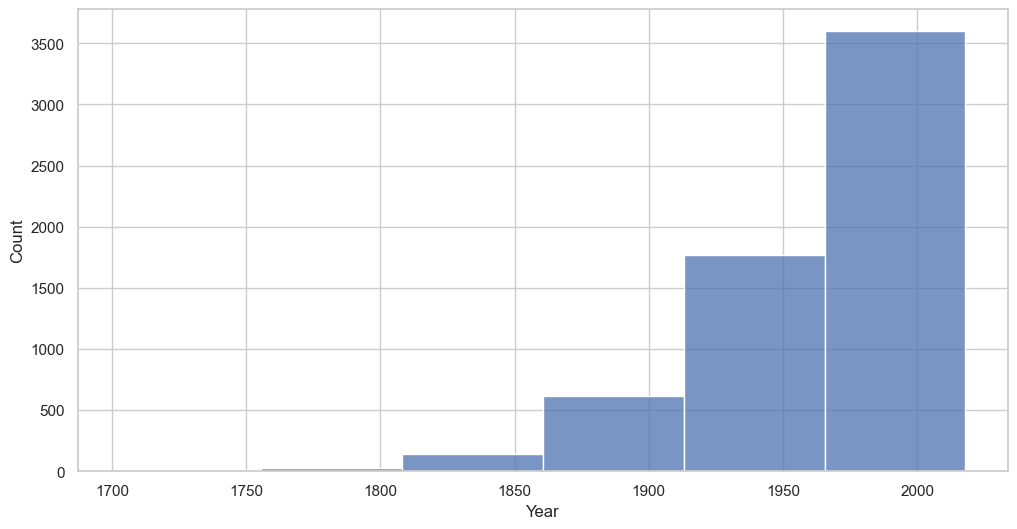

In [676]:
# we still have quite a long tail
sns.histplot(data=dffrom1700, x='Year', bins=6)

In [677]:
dfuntil1800 = dffrom1700[dffrom1700['Year']<1800]
dfuntil1800.sample(10)

Date  Year        Type    Country                    Area  \
6159    1721.06.00  1721  Unprovoked      ITALY                Sardinia   
6146  1771.07.12.R  1771  Unprovoked        USA                     NaN   
6156  1738.04.06.R  1738  Unprovoked      ITALY                  Sicily   
6151    1751.07.27  1751  Unprovoked        USA           Massachusetts   
6150  1753.10.27.R  1753  Unprovoked    JAMAICA                     NaN   
6143    1779.00.00  1779  Unprovoked        USA                  Hawaii   
6160    1703.03.26  1703  Unprovoked   BARBADOS         Southwest coast   
6136    1788.05.10  1788        Boat  AUSTRALIA         New South Wales   
6139  1785.09.26.R  1785  Unprovoked    ENGLAND                  Sussex   
6154    1748.00.00  1748  Unprovoked     PANAMA  Las Perlas archipelago   

                    Location        Activity  \
6159  Ponte della Maddelena,        Swimming   
6146              Damiscotte         Fishing   
6156       Strait of Messina        Swimming   
6151                     NaN        Swimming   
6150         Kingston Harbor  Fell overboard   
6143          Maliu, Hawai'i         Surfing   
6160            Carlisle Bay        Swimming   
6136           Sydney Harbor         Fishing   
6139                Brighton             NaN   
6154   Taboga & Isla del Rey    Pearl diving   

                                                   Name Sex     Age  \
6159                                               male    M    NaN   
6146                                               male    M    NaN   
6156                                               male    M    NaN   
6151                                               male    M    NaN   
6150                                               male    M    NaN   
6143                                   Nu'u-anu-pa'a hu    M  young   
6160  Samuel Jennings, a deserter from the British f...    M     19   
6136                                               boat  NaN    NaN   
6139                                                NaN    M    NaN   
6154                                     African slaves    M    NaN   

                                                 Injury Fatal (Y/N)   Time  \
6159  FATAL,  partial remains recovered from shark’s...           Y    NaN   
6146                                              FATAL           Y    NaN   
6156                                              FATAL           Y    NaN   
6151                                              FATAL           Y    NaN   
6150                                              FATAL           Y    NaN   
6143                         FATAL, buttock lacerated             Y    NaN   
6160  Hand and foot severely bitten, surgically ampu...           N  Night   
6136   No injury to occupants, shark bit oar and rudder           N    NaN   
6139                 Human remains recovered from shark           Y    NaN   
6154                                              FATAL           Y    NaN   

                          Species   \
6159  White shark, 1600-lb female    
6146                           NaN   
6156                           NaN   
6151                           NaN   
6150                           NaN   
6143                           NaN   
6160                           NaN   
6136                           NaN   
6139                  Tiger shark?   
6154                           NaN   

                                 Investigator or Source  
6159                    F. Ricciardi; A. De Maddalena.   
6146                                     C. Moore, GSAF  
6156                                     C. Moore, GSAF  
6151                    Pennsylvania Gazette, 8/15/1751  
6150                        Maryland Gazette, 1/31/1754  
6143  G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...  
6160                           W.R.Cutter, Vol.1, p.252  
6136  G.P. Whitley citing J. Cobley, Sydney Cove, p....  
6139                                     C. Moore, GSAF  
6154               

In [678]:
# we also see that some information of these old reports is missing: species, day and month, age, etc.
# let's just drop these lines
dffrom1800 = dffrom1700[dffrom1700['Year']>1800]

<Axes: xlabel='Year', ylabel='Count'>

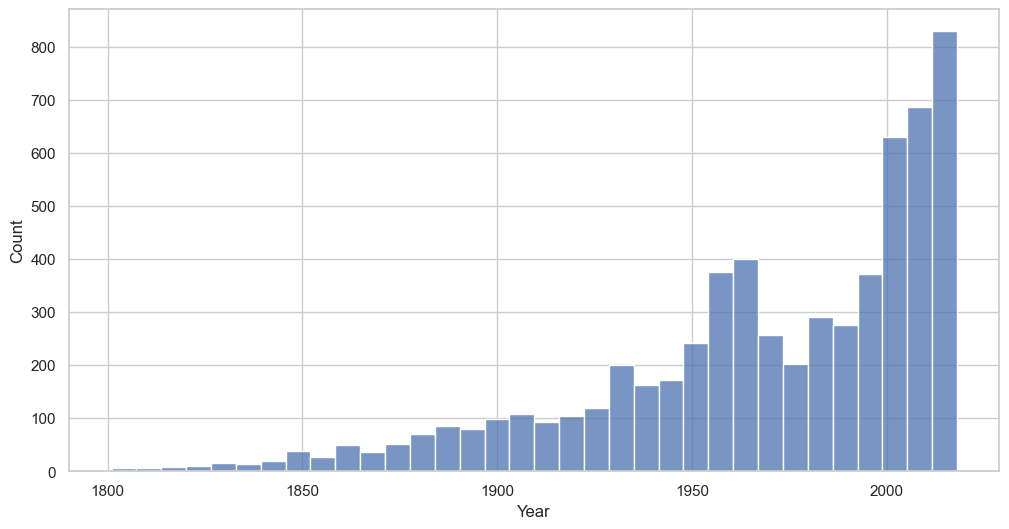

In [679]:
sns.histplot(data=dffrom1800, x='Year')

In [680]:
# let's compare the summary statistics of different time periods to see better which years to keep

statsallyears = df4.Year.describe().round(2)
stats1700 = dffrom1700.describe().round(2)
stats1800 = dffrom1800.describe().round(2)
dffrom1850 = dffrom1700[dffrom1700['Year']>1850]
stats1850 = dffrom1850.describe().round(2)
dffrom1900 = dffrom1700[dffrom1700['Year']>1900]
stats1900 = dffrom1900.describe().round(2)
dffrom1950 = dffrom1700[dffrom1700['Year']>1950]
stats1950 = dffrom1950.describe().round(2)

combined = pd.concat([statsallyears, stats1700, stats1800, stats1850, stats1900, stats1950], axis=1, keys=['All','1700','1800','1850','1900','1950'])
combined

All     1700     1800     1850     1900     1950
          Year     Year     Year     Year     Year     Year
count  6302.00  6161.00  6132.00  6027.00  5550.00  4455.00
mean   1927.27  1967.86  1968.82  1971.18  1978.95  1991.11
std     281.08    45.87    43.77    40.24    31.31    20.56
min       0.00  1703.00  1801.00  1851.00  1901.00  1951.00
25%    1942.00  1945.00  1946.00  1949.00  1958.00  1972.00
50%    1977.00  1980.00  1980.00  1981.00  1987.00  1997.00
75%    2005.00  2005.00  2005.00  2006.00  2007.00  2009.00
max    2018.00  2018.00  2018.00  2018.00  2018.00  2018.00

<Axes: xlabel='Year', ylabel='Count'>

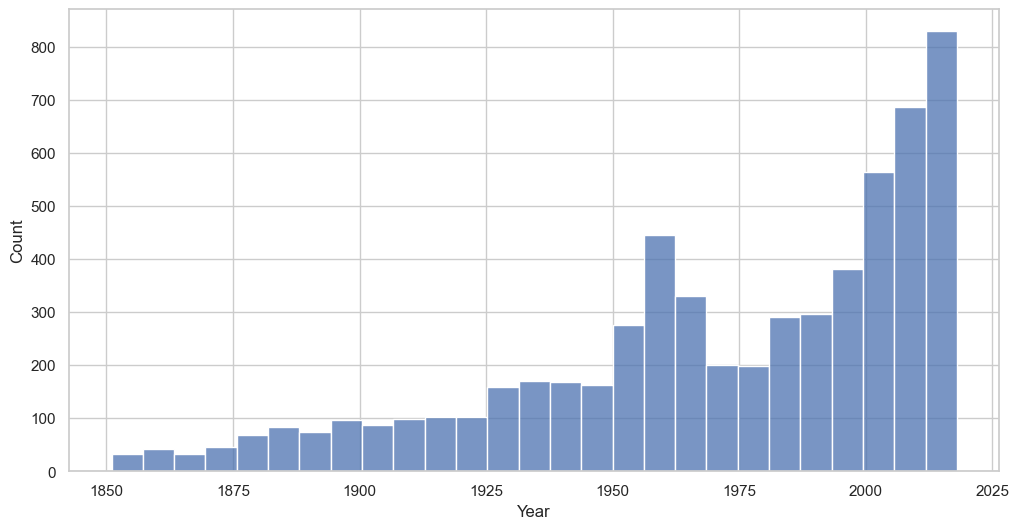

In [681]:
# if we compare all the previous dfs, we see that the mean increased significantly in the periods All-1700 and 1850-1950
# this is because the mean is strongly affected by extreme numbers (all the Year=0 values we had in the beggining, for instance)
# we can also observe a similar change in the median, in 1850 the median is 1981, but in 1900 it's 1987, quite a big change
# so we will just keep the values from 1850
dfclean = dffrom1850
sns.histplot(data=dfclean, x='Year')

In [682]:
# let's clean the names of the columns
dfclean.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source'],
      dtype='object')

In [683]:
import warnings
warnings.filterwarnings("ignore")

In [684]:
dfclean.rename(columns={'Sex ':'Sex'}, inplace=True)
dfclean.rename(columns={'Species ':'Species'}, inplace=True)
columns = list(dfclean.columns)
dfgood = dfclean.copy()
columns_lower = {i:i.lower() for i in dfgood.columns}
dfgood.rename(columns = columns_lower, inplace=True)
dfgood.sample()

date  year        type country     area  \
1214  2008.08.28  2008  Unprovoked     USA  Florida   

                              location activity         name sex age  \
1214  New Smyrna Beach, Volusia County  Surfing  Thomas Gold   M  19   

                            injury fatal (y/n)   time species  \
1214  Superfical cut to left ankle           N  12h00     NaN   

     investigator or source  
1214     S. Petersohn, GSAF

In [685]:
dfgood.dtypes

date                      object
year                       int32
type                      object
country                   object
area                      object
location                  object
activity                  object
name                      object
sex                       object
age                       object
injury                    object
fatal (y/n)               object
time                      object
species                   object
investigator or source    object
dtype: object

In [686]:
# only the year is a number type, while Age should be as well
# if it's an object, we will not be able to get numerical statistics

In [687]:
dfgood['age'].unique() # let's take a look at the unique values

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [688]:
dfgood.shape # let's take a look at the number of rows

(6027, 15)

In [689]:
# first I create a copy of 'age' so I can store these values just in case
df6 = dfgood.copy()
df6['info_age'] = df6['age']
# I want to put them side by side
df6.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time', 'species',
       'investigator or source', 'info_age'],
      dtype='object')

In [690]:
newcolumns = ['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'info_age', 'injury', 'fatal (y/n)', 'time', 'species',
       'investigator or source']
df7 = df6.reindex(columns=newcolumns)
df7.sample() # let's check if the order has been changed correctly

date  year        type           country            area  \
4191  1957.09.02  1957  Unprovoked  MARSHALL ISLANDS  Eniwetok Atoll   

          location activity             name sex  age info_age    injury  \
4191  Parry Island      NaN  Walter L. Huges   M  NaN      NaN  Survived   

     fatal (y/n) time                                            species  \
4191           N  NaN  Identified as carcharinid shark (based on its ...   

            investigator or source  
4191  V.M. Coppleson (1962), p.248

In [691]:
# I want to apply regex to select the rows where 'age' has an odd value, where there is not a digit
# I cannot do it because I have null values
# how many nulls are there in 'age'?
dfagenulls = df7[df7.age.isna()]
dfagenulls.shape

(2581, 16)

In [692]:
# so let's erase the nulls
dfnoagenulls = df7.dropna(subset=['age']) # I delete the rows where 'age' is null
dfnoagenulls.shape # to see how many rows I have left

(3446, 16)

In [693]:
dfoddage = dfnoagenulls[dfnoagenulls['age'].str.contains(r"\D")] # I apply regex to select the rows where 'age' has an odd value, where there is not a digit
dfoddage

date  year        type           country             area  \
48      2018.01.21  2018  Unprovoked     NEW CALEDONIA              NaN   
150     2017.04.27  2017  Unprovoked       NEW ZEALAND     South Island   
182     2017.01.22  2017  Unprovoked               USA          Florida   
194   2016.12.11.b  2016  Unprovoked  FRENCH POLYNESIA         Tuamotos   
219     2016.09.11  2016  Unprovoked               USA          Florida   
...            ...   ...         ...               ...              ...   
5181    1924.07.04  1924     Boating               USA       California   
5312    1916.06.30  1916  Unprovoked               USA       New Jersey   
5483    1906.01.28  1906  Unprovoked         AUSTRALIA  New South Wales   
5544  1901.09.23.R  1901  Unprovoked            CYPRUS  Southern Cyprus   
6002  1855.04.09.R  1855  Unprovoked         AUSTRALIA  South Australia   

                             location                         activity  \
48                           Nouville                     Spearfishing   
150             Porpoise Bay, Catlins                    Body boarding   
182   Vero Beach, Indian River County                              NaN   
194                    Takapoto Atoll                          Fishing   
219     Ponte Vedra, St. Johns County                           Wading   
...                               ...                              ...   
5181     Newport Beach, Orange County                          Fishing   
5312   Atlantic City, Atlantic County                         Swimming   
5483                    Georges River                          Bathing   
5544                          Larnaca                         Swimming   
6002                   Port Wakefield  Fell overboard from the Malacca   

                                                   name sex          age  \
48                                                 male   M          40s   
150                                              female   F          20s   
182                                                male   M         Teen   
194                                                male   M          40s   
219                                                male   M          60s   
...                                                 ...  ..          ...   
5181  18' boat, occupants Richard Gunther & Donald C...   M  ?    &   14   
5312                                                boy   M     10 or 12   
5483                             William Joseph Dobson.   M     31 or 33   
5544                                               male   M         Teen   
6002                                              child   F           2½   

         info_age                                             injury  \
48            40s                        Injuries to abdomen and arm   
150           20s            Puncture wounds & laceration above knee   
182          Teen               Puncture wounds to lower arm or hand   
194           40s                                      Hand injured?   
219           60s                                Minor injury to arm   
...           ...                                                ...   
5181  ?    &   14  No injury, shark tore hole in the side of the ...   
5312     10 or 12                                        Heel bitten   
5483     31 or 33                                              FATAL   
5544         Teen                FATAL, bitten on arms, chest & legs   
6002           2½                                              FATAL   

     fatal (y/n)   time           species  \
48             N  15h30  Bull shark, 3 m    
150            N  14h00               NaN   
182            N  14h00               NaN   
194            N    NaN               NaN   
219            N  15h15    3' to 4' shark   
...          ...    ...               ...   
5181           N    NaN               NaN   
5312           N    NaN               NaN   
5483           Y  14h10               NaN

In [694]:
dfoddage.age.unique() # the odd values in 'age'

array(['40s', '20s', 'Teen', '60s', '18 months', '30s', '50s', 'teen',
       '28 & 26', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30',
       'Teens', '36 & 26', '8 or 10', '\xa0 ', ' ', '30 or 36', '6½',
       '21 & ?', '33 or 37', 'mid-30s', '23 & 20', ' 30',
       '7      &    31', ' 28', '20?', "60's", '32 & 30', '16 to 18',
       'Elderly', 'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ',
       '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months',
       '25 to 35', '23 & 26', '(adult)', '33 & 37', '25 or 28',
       '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', '30 & 32', '50 & 30',
       '17 & 35', 'X', '"middle-age"', '13 or 18', '34 & 19', '33 & 26',
       '2 to 3 months', 'MAKE LINE GREEN', ' 43', '"young"', '7 or 8',
       '17 & 16', 'F', 'Both 11', '9 or 10', 'young', '36 & 23', '  ',
       'A.M.', '?    &   14', '10 or 12', '31 or 33', '2½'], dtype=object)

In [695]:
dfoddage.index # let's get the indexes of these 105 rows with these odd values

Index([  48,  150,  182,  194,  219,  294,  445,  468,  502,  509,
       ...
       4999, 5002, 5061, 5084, 5170, 5181, 5312, 5483, 5544, 6002],
      dtype='int64', length=105)

In [696]:
df8 = dfnoagenulls.copy() # we make a copy
# we could analize every row and substitute them for a closer value, such as '1' where it says '9 months', but we will just substitute these odd values for the mean
df8.loc[dfoddage.index, 'age'] = np.nan # first we substitute the values in these 105 rows for nulls

In [697]:
df8.sample(10)

date  year        type           country  \
1814  2002.11.00.a  2002  Unprovoked  FRENCH POLYNESIA   
4448    1951.03.15  1951  Unprovoked      SOUTH AFRICA   
910     2011.06.15  2011  Unprovoked           REUNION   
205     2016.10.14  2016  Unprovoked               USA   
2481  1993.08.15.a  1993  Unprovoked               USA   
1883    2002.02.07  2002     Boating         AUSTRALIA   
4254    1956.05.07  1956  Unprovoked              CUBA   
3039    1981.02.19  1981  Unprovoked      SOUTH AFRICA   
3511    1967.08.27  1967    Provoked               USA   
863   2011.09.24.a  2011  Unprovoked               USA   

                        area                          location  \
1814         Society Islands                          Tetiaroa   
4448           KwaZulu-Natal               South Beach, Durban   
910   Saint-Gilles-les-Bains                      Boucan-Canot   
205                   Hawaii  Charlie Young Beach, Kihei, Maui   
2481          North Carolina                     Pamlico Sound   
1883         New South Wales     Paramatta River (near Sydney)   
4254                     NaN                               NaN   
3039           KwaZulu-Natal                        Umtentweni   
3511              California                           Ventura   
863           South Carolina  North Myrtle Beach, Horry County   

                                               activity                 name  \
1814                   Fishing, standing in 2' of water        Scott Heywood   
4448                                       Body surfing  Heinrich Stapelberg   
910                                     Boogie Boarding         Eddie Aubert   
205                                          Snorkeling               female   
2481                           Riding floatation device         Petra Rijoes   
1883                                           Kayaking        Paul McNamara   
4254  Free diving, working on U/W scenes for motion ...        Russ Shearman   
3039                                           Swimming          Richard Guy   
3511                       Pulling shark from the water           Jim Beatty   
863                                Jumping in the waves       Isaac O'Hara,    

     sex age info_age                                             injury  \
1814   M  52       52                                       Shin bruised   
4448   M  19       19                                Left foot lacerated   
910    M  31       31                                              FATAL   
205    F  66       66                              Injuries to left calf   
2481   F  19       19             Severe lacerations to abdomen & thighs   
1883   M  35       35               Stern of kayak bitten/chest bruised    
4254   M  30       30                                              FATAL   
3039   M  30       30                                     Foot lacerated   
3511   M  24       24  Nipped on shoulder by captive shark PROVOKED I...   
863    M   5        5                           Laceration to left thigh   

     fatal (y/n)   time                                        species  \
1814           N    NaN                                            NaN   
4448           N  12h00                                            NaN   
910            Y  17h30                                            NaN   
205            N  09h50                                            NaN   
2481           N  10h00                                     Bull shark   
1883           N  19h15  C. leucas tooth fragment recovered from kayak   
4254           Y    NaN                                            NaN   
3039           N  17h20               Juvenile dusky or blacktip shark   
3511           N  14h30                                  5' blue shark   
863            N  10h00                                            NaN   

                                 investigator or source  
1814                                         S. Heywood  

In [698]:
dfnoagenulls.shape

(3446, 16)

In [699]:
df8.age.isna().sum() # we check we have the same number of rows with nulls as we had before with odd values

105

In [700]:
# I want to replace these NaN with the mean, but I cannot do that since they are still strings. 
# So let's make a copy where I will drop these values, turn then into int and then calculate the mean
dfagereal = df8.copy() # I make a copy
dfagereal = df8.dropna(subset=['age']) # I drop the nulls
dfagereal.shape # I check the shape, there should be 105 less than before so 3446-105 = 3341

(3341, 16)

In [701]:
dfagereal['age'] = dfagereal['age'].astype(int) # I convert 'age' into int

In [702]:
dfagereal.age.info() # I check it has been changed correctly

<class 'pandas.core.series.Series'>
Index: 3341 entries, 0 to 6019
Series name: age
Non-Null Count  Dtype
--------------  -----
3341 non-null   int32
dtypes: int32(1)
memory usage: 39.2 KB


In [703]:
# now I can calculate the mean
age_mean = dfagereal.age.mean()
dfnullmean = df8.copy()
dfnullmean['age'] = dfnullmean['age'].fillna(age_mean) # I fill the nulls with the mean
dfnullmean['age'] = dfnullmean['age'].astype(int) # I convert 'age' into int
dfnullmean.age.mean()

27.370574579222286

In [704]:
# now I can calculate the mean
age_mean = dfagereal.age.mean()
dfnullmean = df8.copy()
dfnullmean['age'] = dfnullmean['age'].fillna(age_mean) # I fill the nulls with the mean
dfnullmean['age'] = dfnullmean['age'].astype(int) # I convert 'age' into int
dfnullmean.age.mean()

27.370574579222286

In [705]:
dfagereal.age.mean()

27.382220891948517

In [706]:
# we see that the mean has barely changed

In [707]:
dfagereal.age.value_counts()

age
17    153
18    150
20    140
19    139
16    136
     ... 
87      1
67      1
72      1
81      1
82      1
Name: count, Length: 80, dtype: int64

In [708]:
dfagereal.shape

(3341, 16)

In [709]:
dfnullmean.age.value_counts()

age
27    182
17    153
18    150
20    140
19    139
     ... 
87      1
67      1
82      1
81      1
74      1
Name: count, Length: 80, dtype: int64

In [710]:
# all the null values were converted to the mean (27.38) which in int is 27, so we can see a lot more of this value in value_counts()

In [711]:
dfnullmean.sample(10) # we can see that this approach is aproximate, because the mean is different than the real age of some people
# but we do so in order to get mathematicals statistics of the age while keeping the real age stored in the column 'info_age'

date  year        type               country  \
3181    1976.06.23  1976  Unprovoked                   USA   
4395    1952.12.21  1952  Unprovoked             AUSTRALIA   
2619    1990.10.20  1990  Unprovoked                   USA   
4069  1959.08.15.b  1959     Invalid                   USA   
4304    1955.02.05  1955  Unprovoked             AUSTRALIA   
4471    1950.07.00  1950  Unprovoked                   USA   
2183    1998.06.08  1998  Unprovoked                   USA   
4130    1958.12.13  1958  Unprovoked                   USA   
5151    1926.04.22  1926  Unprovoked  SOUTH ATLANTIC OCEAN   
728     2012.10.23  2012  Unprovoked                   USA   

                       area  \
3181                Florida   
4395        South Australia   
2619                Florida   
4069                Florida   
4304        New South Wales   
4471                Florida   
2183                Florida   
4130                 Hawaii   
5151  South of the Equator    
728              California   

                                               location  \
3181                 St. Andrews State Park, Bay County   
4395                                       Cape Douglas   
2619       North end of County Beach, Palm Beach County   
4069                            Panama City, Bay County   
4304               Sugarloaf Bay, Middle Harbor, Sydney   
4471              Rock Harbor, Key Largo, Monroe County   
2183                      Daytona Beach, Volusia County   
4130  Near Twin Islands off Lanikai, O'ahu (east coast)   
5151     Steamship bound from Cape Town to Philadelphia   
728            Surf Beach, Lompoc, Santa Barbara County   

                                               activity  \
3181                                         Skindiving   
4395                              Fishing, setting nets   
2619                                            Surfing   
4069                                             Diving   
4304                                           Swimming   
4471  Goggle-diving for seaweeds, but standing in water   
2183                                            Surfing   
4130                            Surfing on air mattress   
5151               Fell overboard from SS Ripley Castle   
728                                             Surfing   

                             name sex  age info_age  \
3181                  Paul Maurer   M   17       17   
4395                  John Holmes   M   25       25   
2619                  Carl Demers   M   25       25   
4069                 Gary Seymour   M   21       21   
4304    Bruno Aloysius Rautenberg   M   25       25   
4471               Warren Rathgen   M   21       21   
2183                Brian Catarra   M   18       18   
4130            William S. Weaver   M   15       15   
5151     Thomas (or Tony) Madison   M   26       26   
728   Francisco Javier Solorio Jr   M   39       39   

                                                 injury fatal (y/n)  \
3181                           Lacerations to right arm           N   
4395                       Bitten on thigh and buttocks           N   
2619                                       Wrist bitten           N   
4069                                          No injury         NaN   
4304                                FATAL, legs bitten            Y   
4471         Shallow lacerations on back of right thigh           N   
2183  2-inch laceration on dorsum of foot, 1-inch la...           N   
4130                               FATAL, leg severed             Y   
5151  When taken back on board 2 hours later both le...           N   
728                                               FATAL           Y   

              time                                    species  \
3181         Night                           12' to 14' shark   
4395  "After dark"                           2.4 m [8'] shark   
2619         16h00                           4' spinner shark   
4069           NaN                       

<Axes: xlabel='age', ylabel='Count'>

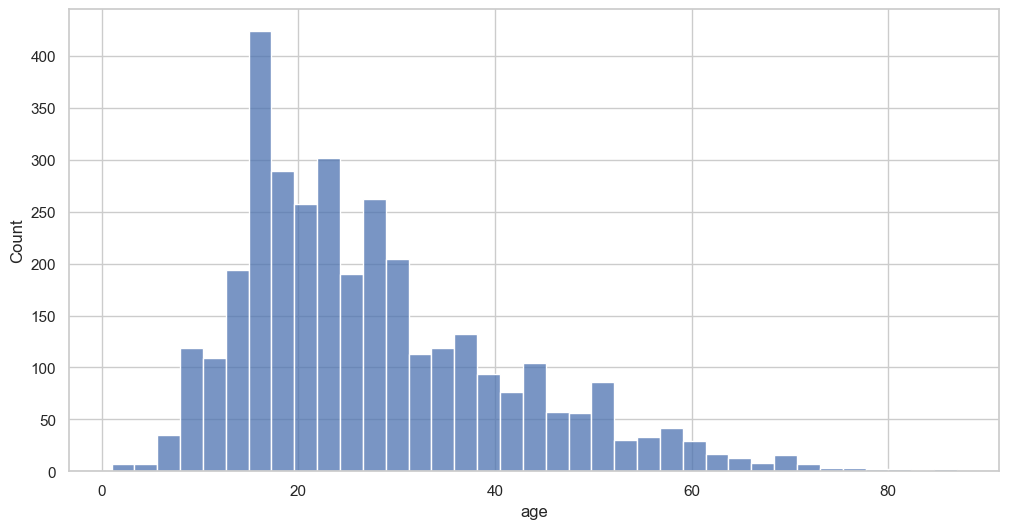

In [712]:
# now yes, finally the 'age' values are int and we can generate a correct histogram
sns.histplot(data=dfnullmean, x='age')

In [713]:
dfnullmean.describe().round(2)

year      age
count  3446.00  3446.00
mean   1984.92    27.37
std      30.33    13.69
min    1852.00     1.00
25%    1965.00    17.00
50%    1996.00    24.00
75%    2009.00    35.00
max    2018.00    87.00

In [714]:
dfnullmean.shape

(3446, 16)

In [715]:
dfgood.shape # let's take a look again at the number of rows we had before erasing the nulls in 'age'

(6027, 15)

In [716]:
dfagenulls.shape # I can get back these 'age' null values that we erased before in order to apply regex,
# because there is information that may interest us, such as the gender, country, species...

(2581, 16)

In [717]:
dfagemean = pd.concat([dfnullmean, dfagenulls])
dfagemean.age.mean()

27.370574579222286

In [718]:
dfagemean.age.std()

13.686281587947692

In [719]:
dfagemean.dtypes

date                      object
year                       int32
type                      object
country                   object
area                      object
location                  object
activity                  object
name                      object
sex                       object
age                       object
info_age                  object
injury                    object
fatal (y/n)               object
time                      object
species                   object
investigator or source    object
dtype: object

In [720]:
dfagemean['age'] = dfagemean['age'].astype(float)
dfagemean.age.value_counts(dropna=False)

age
NaN     2581
27.0     182
17.0     153
18.0     150
20.0     140
        ... 
84.0       1
87.0       1
67.0       1
81.0       1
82.0       1
Name: count, Length: 81, dtype: int64

In [721]:
age_mean = dfagereal.age.mean()
age_mean

27.382220891948517

In [722]:
dfagemean['age'] = dfagemean['age'].fillna(age_mean).round(2) # I fill the nulls with the mean
dfagemean.age.value_counts(dropna=False) # to also see the nulls

# I don't want to convert yet the ages to int, because it will change all the nulls (now age=27.38) into 27
# I will get rid of these values where age=27.38 later, when I want to work with the 'age'
# dfagemean['age'] = dfagemean['age'].astype(int) # I convert 'age' into int

age
27.38    2581
27.00     182
17.00     153
18.00     150
20.00     140
         ... 
84.00       1
87.00       1
67.00       1
81.00       1
82.00       1
Name: count, Length: 81, dtype: int64

In [723]:
dfagemean.sample(9) # I check if it has been changed correctly

date  year        type           country  \
1013    2010.07.11  2010    Provoked               USA   
5729    1888.07.04  1888     Invalid           CROATIA   
4359    1953.12.22  1953  Unprovoked      SOUTH AFRICA   
798   2012.04.19.b  2012  Unprovoked               USA   
1944   2001.05.23   2001  Unprovoked               USA   
2810  1986.09.00.a  1986  Unprovoked               USA   
4392  1953.00.00.b  1953  Unprovoked  PAPUA NEW GUINEA   
3769    1963.01.12  1963    Provoked      SOUTH AFRICA   
4531  1948.12.14.b  1948  Unprovoked              IRAN   

                               area  \
1013                        Florida   
5729                         Lukovo   
4359          Eastern Cape Province   
798                         Florida   
1944                 South Carolina   
2810                        Florida   
4392  Bougainville (North Solomons)   
3769          Eastern Cape Province   
4531             Shat-Al-Arab River   

                                           location  activity  \
1013          Lauderdale-by-the-Sea, Broward County   Fishing   
5729                                            NaN       NaN   
4359                                 Port Elizabeth  Swimming   
798                     Indialantic, Brevard County   Surfing   
1944    Coligny Beach, Hilton Head, Beaufort County  Swimming   
2810  Ponce Inlet, New Smyrna Beach, Volusia County   Surfing   
4392                            Kahuli, Buka Island   Washing   
3769                                       Humewood   Fishing   
4531                                         Abadan       NaN   

                   name  sex    age info_age  \
1013               male    M  27.38      NaN   
5729                NaN  NaN  27.38      NaN   
4359      Glen Stoddart    M  23.00       23   
798    Justin Ellingham    M  28.00       28   
1944       Tripp Choate    M  11.00       11   
2810          Anonymous  NaN  18.00       18   
4392               male    M  27.38      NaN   
3769                NaN    M  27.38      NaN   
4531  Abdul Imam (male)    M  19.00       19   

                                                 injury fatal (y/n)   time  \
1013  Small laceration to forearm from netted shark ...           N    NaN   
5729         Human remains & clothing found in 7' shark         NaN    NaN   
4359                                 Lacerations to arm           N    NaN   
798                                 Lacerations to hand           N  19h28   
1944                                     Shin lacerated           N    NaN   
2810                                        Hand bitten           N    NaN   
4392                                FATAL, torso bitten           Y    NaN   
3769  Foot bitten by shark hooked & taken on boat  P...           N    NaN   
4531                                 Left thumb severed           N    NaN   

                                           species  \
1013                        Nurse shark, juvenile    
5729  Shark involvement prior to death unconfirmed   
4359                                           NaN   
798                                       5' shark   
1944             1.2 m to 1.5 m [4.5' to 5'] shark   
2810                                           NaN   
4392                                           NaN   
3769                                  <1.5 m shark   
4531                                           NaN   

                                 investigator or source  
1013                                  News 7, 7/13/2010  
5729                                     C. Moore, GSAF  
4359                                          H. Monson  
798                             MyFoxOrlando, 4/19/2012  
1944                                  C. Creswell, GSAF  
2810                        Orlando Sentinel. 9/20/1986  
4392                  A. Bleakley;  A. M. Rapson, p.148  
3769                                               GSAF  
4531  A. Anderson, M.D. / Lt. Col. R.S. Hunt, Royal ...

<Axes: xlabel='age', ylabel='Count'>

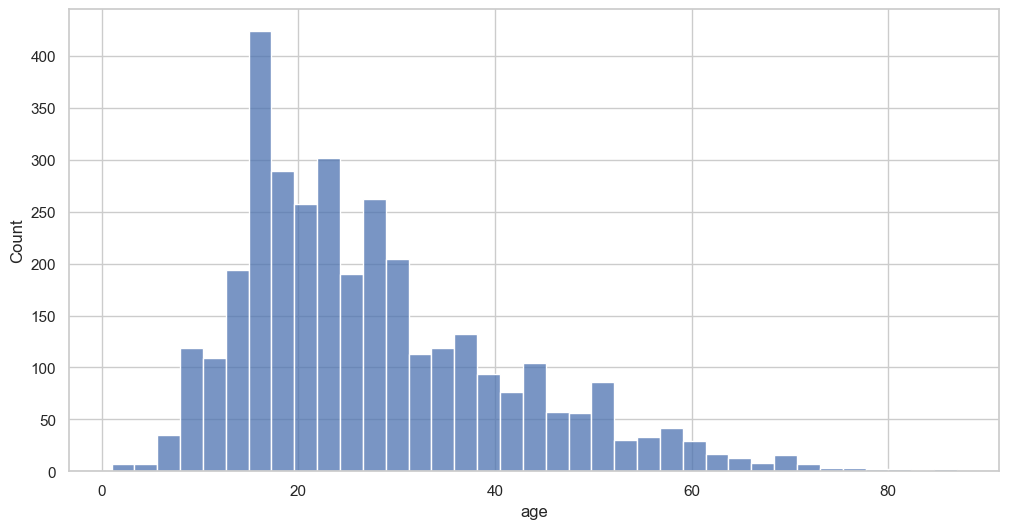

In [724]:
sns.histplot(data=dfnullmean, x='age')

<Axes: xlabel='age', ylabel='Count'>

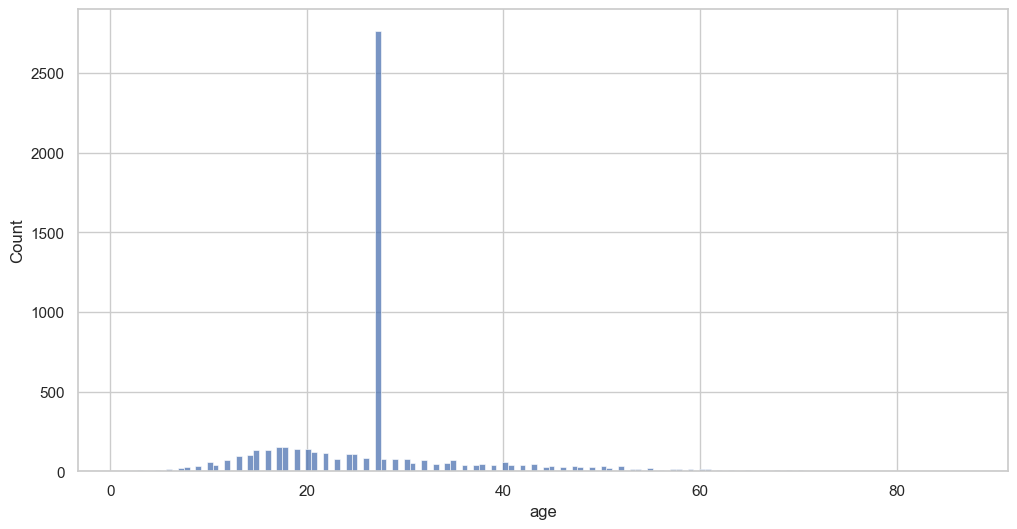

In [725]:
sns.histplot(data=dfagemean, x='age')

In [726]:
dfagemean.age.value_counts()

age
27.38    2581
27.00     182
17.00     153
18.00     150
20.00     140
         ... 
84.00       1
87.00       1
67.00       1
81.00       1
82.00       1
Name: count, Length: 81, dtype: int64

In [727]:
# the 2nd histogram, of the 6027 values, is not useful for 'age' numerical analysis
# because there are 2581 values (dfagenulls = around 42% of the df) that we have converted into the mean (27.38), so we see a peak in the distribution 
# we don't have to keep the dfnullmean (3446 rows) to do the 'age' numerical analysis
# we can just get rid of these values where age=27.38 later, when I want to work with the 'age'
# and we'll continue working with the dfagemean (6027 rows)

In [728]:
dfagemean.shape

(6027, 16)

In [729]:
# let's take a look at other problematic columns
dfagemean['sex'].unique()

array(['F', 'M', 'M ', nan, 'lli', 'N', '.'], dtype=object)

In [730]:
dfagemean.sex.value_counts()

sex
M      4864
F       619
M         2
lli       1
N         1
.         1
Name: count, dtype: int64

In [731]:
# we isolate these 2 rows where the gender is 'M '
df_male_spaces = dfagemean[dfagemean['sex']=='M ']
df_male_spaces

date  year        type    country        area  \
563   2014.04.22  2014  Unprovoked        USA     Florida   
1587  2005.05.15  2005  Unprovoked  AUSTRALIA  Queensland   

                          location      activity           name sex    age  \
563   Cocoa Beach, Brevard  County      Swimming           male  M   42.00   
1587      50 km east of Townsville  Spearfishing  Ben Edelstein  M   27.38   

     info_age                                      injury fatal (y/n)   time  \
563        42  Laceration & puncture wounds to right foot           N  15h30   
1587      NaN                  Severe injury to lower leg           N    NaN   

             species                        investigator or source  
563              NaN            R. Neale, Florida Today, 4/22/2014  
1587  Blacktip shark  J. Anderson, Townsville Bulletin, 5/21/2005

In [732]:
df_gender = dfagemean.copy() # we create a copy just in case
df_gender['sex'] = np.where(df_gender['sex']=='M ', 'M', df_gender['sex']) # we change these 2 values
df_gender.sex.value_counts()

sex
M      4866
F       619
lli       1
N         1
.         1
Name: count, dtype: int64

In [733]:
dfsexlli = df_gender[df_gender['sex']=='lli']
dfsexlli

date  year        type country        area  \
1624  2004.11.11.b  2004  Unprovoked     USA  California   

                                            location activity        name  \
1624  Bunkers, Humboldt Bay, Eureka, Humboldt County  Surfing  Brian Kang   

      sex   age info_age                              injury fatal (y/n)  \
1624  lli  38.0       38  Lacerations to hand, knee & thigh            N   

       time                  species            investigator or source  
1624  13h30  5.5 m [18'] white shark  R. Collier, GSAF

In [734]:
# it looks like a male called Brian
df_gender['sex'] = np.where(df_gender['sex']=='lli', 'M', df_gender['sex']) # we change this value
df_gender.sex.value_counts()

sex
M    4867
F     619
N       1
.       1
Name: count, dtype: int64

In [735]:
dfindex = df_gender.copy()
dfindex.reset_index(drop=True)

date  year          type country            area  \
0       2018.06.25  2018       Boating     USA      California   
1       2018.06.18  2018    Unprovoked     USA         Georgia   
2       2018.06.09  2018       Invalid     USA          Hawaii   
3     2018.06.03.a  2018    Unprovoked  BRAZIL      Pernambuco   
4       2018.05.27  2018    Unprovoked     USA         Florida   
...            ...   ...           ...     ...             ...   
6022    1852.00.00  1852    Unprovoked     USA  South Carolina   
6023  1851.06.16.R  1851    Unprovoked  MEXICO          Oaxaca   
6024  1851.03.08.R  1851    Unprovoked     USA          Hawaii   
6025    1851.00.00  1851    Unprovoked     USA      California   
6026    1806.04.24  1896  Sea Disaster     USA             NaN   

                                               location  \
0                           Oceanside, San Diego County   
1                        St. Simon Island, Glynn County   
2                                          Habush, Oahu   
3                                 Piedade Beach, Recife   
4     Lighhouse Point Park, Ponce Inlet, Volusia County   
...                                                 ...   
6022                  Mount Pleasant, Charleston County   
6023                                 Tehuantepec Harbor   
6024                                    Honolulu Harbor   
6025  San Francisco Bay (or San Leandro Bay), near c...   
6026                                                NaN   

                                            activity  \
0                                           Paddling   
1                                           Standing   
2                                            Surfing   
3                                           Swimming   
4                                            Fishing   
...                                              ...   
6022  Vessel capsized, wading ashore carrying an oar   
6023                                         Bathing   
6024                                        Swimming   
6025                                 Hard hat diving   
6026                                             NaN   

                                                   name sex    age info_age  \
0                                           Julie Wolfe   F  57.00       57   
1                                       Adyson McNeely    F  11.00       11   
2                                           John Denges   M  48.00       48   
3                                Jose Ernesto da Silva    M  18.00       18   
4                                                  male   M  52.00       52   
...                                                 ...  ..    ...      ...   
6022                                   Charles Chambers   M  27.38      NaN   
6023  John H. Gray & another member of the Tehuantep...   M  27.38      NaN   
6024                                       James Kinney   M  27.38      NaN   
6025                                   William Cortigan   M  27.38      NaN   
6026                          Crew of the schooner Mary   M  27.38      NaN   

                                                 injury fatal (y/n)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                                                 FATAL           Y   
4               Minor injury to foot. PROVOKED INCIDENT           N   
...                                                 ...         ...   
6022                      FATAL, body was not recovered           Y   
6023                                              FATAL           Y   
6024                                              FATAL           Y   
6025                                     3 toes severed           N   
6026                Shark scavenged on the dead sailors         NaN   

                time          species

In [736]:
dfsexN = dfindex[dfindex['sex']=='N']
dfsexN

date  year     type    country             area  location  \
4938  1934.07.11  1934  Boating  AUSTRALIA  New South Wales  Cronulla   

     activity                                         name sex    age  \
4938  Fishing  18' boat, occupants William & Leslie Newton   N  27.38   

     info_age                                             injury fatal (y/n)  \
4938      NaN  No injury to occupants Sharks continually foll...           N   

     time             species  \
4938  NaN  Blue pointer, 11'    

                                 investigator or source  
4938  G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...

In [737]:
# the shark attacked or followed a boat with 2 people, one male and one female

In [738]:
# so let's duplicated the row
dfduplicatedrow = pd.concat([dfindex, dfsexN])
dfduplicatedrow.reset_index(drop=True, inplace=True)
dfduplicatedrow # to make sure we have duplicated it correctly

date  year          type    country             area  \
0       2018.06.25  2018       Boating        USA       California   
1       2018.06.18  2018    Unprovoked        USA          Georgia   
2       2018.06.09  2018       Invalid        USA           Hawaii   
3     2018.06.03.a  2018    Unprovoked     BRAZIL       Pernambuco   
4       2018.05.27  2018    Unprovoked        USA          Florida   
...            ...   ...           ...        ...              ...   
6023  1851.06.16.R  1851    Unprovoked     MEXICO           Oaxaca   
6024  1851.03.08.R  1851    Unprovoked        USA           Hawaii   
6025    1851.00.00  1851    Unprovoked        USA       California   
6026    1806.04.24  1896  Sea Disaster        USA              NaN   
6027    1934.07.11  1934       Boating  AUSTRALIA  New South Wales   

                                               location         activity  \
0                           Oceanside, San Diego County         Paddling   
1                        St. Simon Island, Glynn County         Standing   
2                                          Habush, Oahu          Surfing   
3                                 Piedade Beach, Recife         Swimming   
4     Lighhouse Point Park, Ponce Inlet, Volusia County          Fishing   
...                                                 ...              ...   
6023                                 Tehuantepec Harbor          Bathing   
6024                                    Honolulu Harbor         Swimming   
6025  San Francisco Bay (or San Leandro Bay), near c...  Hard hat diving   
6026                                                NaN              NaN   
6027                                           Cronulla          Fishing   

                                                   name sex    age info_age  \
0                                           Julie Wolfe   F  57.00       57   
1                                       Adyson McNeely    F  11.00       11   
2                                           John Denges   M  48.00       48   
3                                Jose Ernesto da Silva    M  18.00       18   
4                                                  male   M  52.00       52   
...                                                 ...  ..    ...      ...   
6023  John H. Gray & another member of the Tehuantep...   M  27.38      NaN   
6024                                       James Kinney   M  27.38      NaN   
6025                                   William Cortigan   M  27.38      NaN   
6026                          Crew of the schooner Mary   M  27.38      NaN   
6027        18' boat, occupants William & Leslie Newton   N  27.38      NaN   

                                                 injury fatal (y/n)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                                                 FATAL           Y   
4               Minor injury to foot. PROVOKED INCIDENT           N   
...                                                 ...         ...   
6023                                              FATAL           Y   
6024                                              FATAL           Y   
6025                                     3 toes severed           N   
6026                Shark scavenged on the dead sailors         NaN   
6027  No injury to occupants Sharks continually foll...           N   

                time             species  \
0              18h00         White shark   
1      14h00  -15h00                 NaN   
2              07h45                 NaN   
3     Late afternoon         Tiger shark   
4                NaN     Lemon shark, 3'   
...              ...                 ...   
6023             NaN                 NaN   
6024             NaN                 NaN   
6025             NaN           18' shark   
6026             N

In [739]:
dfsexN2 = dfduplicatedrow[dfduplicatedrow['sex']=='N']
dfsexN2

date  year     type    country             area  location  \
5165  1934.07.11  1934  Boating  AUSTRALIA  New South Wales  Cronulla   
6027  1934.07.11  1934  Boating  AUSTRALIA  New South Wales  Cronulla   

     activity                                         name sex    age  \
5165  Fishing  18' boat, occupants William & Leslie Newton   N  27.38   
6027  Fishing  18' boat, occupants William & Leslie Newton   N  27.38   

     info_age                                             injury fatal (y/n)  \
5165      NaN  No injury to occupants Sharks continually foll...           N   
6027      NaN  No injury to occupants Sharks continually foll...           N   

     time             species  \
5165  NaN  Blue pointer, 11'    
6027  NaN  Blue pointer, 11'    

                                 investigator or source  
5165  G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...  
6027  G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...

In [740]:
# and assign one value to M and one to F
dfduplicatedrow.loc[5165, 'sex'] = 'M'
dfduplicatedrow.loc[6027, 'sex'] = 'F'
dfduplicatedrow.sex.value_counts(dropna=False)

sex
M      4868
F       620
NaN     539
.         1
Name: count, dtype: int64

In [741]:
dfsexdot = dfduplicatedrow[dfduplicatedrow['sex']=='.']
dfsexdot

date  year          type           country         area  \
5527  1908.06.02.R  1908  Sea Disaster  PAPUA NEW GUINEA  New Britain   

     location activity name sex    age info_age  \
5527   Matupi        .  NaN   .  27.38      NaN   

                                                 injury fatal (y/n) time  \
5527  Remains of 3 humans recovered from shark, but ...           Y  NaN   

                        species     investigator or source  
5527  Allegedly a 33-foot shark  Taranaki Herald, 6/2/1908

In [742]:
# let's just change it to a null
dfduplicatedrow.loc[5527, 'sex'] = np.nan 
dfduplicatedrow.sex.value_counts(dropna=False)

sex
M      4868
F       620
NaN     540
Name: count, dtype: int64

In [743]:
dfduplicatedrow.loc[5527, 'sex']

nan

In [744]:
# we don't want NaN values because they don't appear in graphics, so I turn them into a specific string
dfduplicatedrow.sex.fillna('Unknown', inplace=True)
dfduplicatedrow.sex.value_counts(dropna=False)

sex
M          4868
F           620
Unknown     540
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

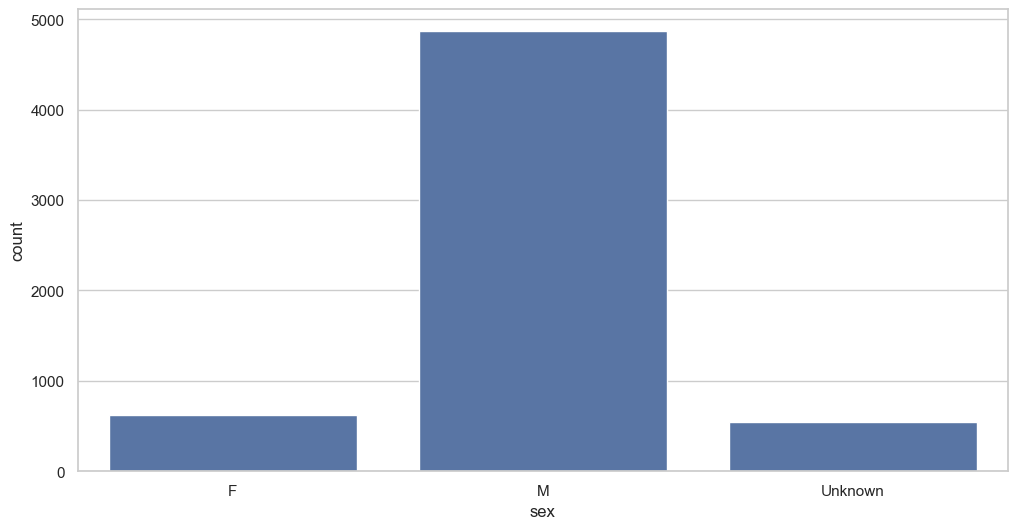

In [745]:
sns.countplot(data=dfduplicatedrow, x='sex') # so far the raw visualization for 'age' is the following

In [746]:
# let's continue cleaning, we will now clean the 'fatal' column
df_fatal = dfduplicatedrow.copy()
# let's first change the name of the colum
df_fatal.rename(columns={'fatal (y/n)':'fatal'}, inplace=True)
df_fatal['fatal'].unique()

array(['N', 'Y', nan, 'M', '2017', 'UNKNOWN', ' N', 'N '], dtype=object)

In [747]:
df_fatal['fatal'].value_counts()

fatal
N          4190
Y          1245
UNKNOWN      62
 N            7
M             1
2017          1
N             1
Name: count, dtype: int64

In [748]:
df_fatal['fatal'] = df_fatal['fatal'].str.strip()
df_fatal['fatal'].unique()

array(['N', 'Y', nan, 'M', '2017', 'UNKNOWN'], dtype=object)

In [749]:
df_fatal['fatal'].value_counts()

fatal
N          4198
Y          1245
UNKNOWN      62
M             1
2017          1
Name: count, dtype: int64

In [750]:
# let's take a closer look at the odd values
df_fatal[df_fatal['fatal']=='M']

date  year      type           country      area      location  \
205  2016.04.18.b  2016  Provoked  FRENCH POLYNESIA  Tuamotos  Makemo Atoll   

         activity         name sex   age info_age  \
205  Spearfishing  Hoata Iotua   M  22.0       22   

                                                injury fatal     time  \
205  Laceration to knee by speared shark PROVOKED I...     M  Morning   

                  species investigator or source  
205  Grey reef shark, 2 m   TNTV News, 4/19/2016

In [751]:
# I searched info of this attack on Google and found that he did not die because of the attack
df_fatal.at[205,'fatal'] = 'N' # I change the 'fatal' value to 'N'
df_fatal.loc[205] # I check if it has been changed correctly

date                                                           2016.04.18.b
year                                                                   2016
type                                                               Provoked
country                                                    FRENCH POLYNESIA
area                                                               Tuamotos
location                                                       Makemo Atoll
activity                                                       Spearfishing
name                                                            Hoata Iotua
sex                                                                       M
age                                                                    22.0
info_age                                                                 22
injury                    Laceration to knee by speared shark PROVOKED I...
fatal                                                                     N
time        

In [752]:
df_fatal['fatal'].value_counts() # let's check again the value counts

fatal
N          4199
Y          1245
UNKNOWN      62
2017          1
Name: count, dtype: int64

In [753]:
# let's take a closer look at the last odd value
df_fatal[df_fatal['fatal']=='2017']

date  year      type country      area  location  \
588  2012.06.10  2012  Provoked   ITALY  Sardinia  Muravera   

                                            activity          name sex   age  \
588  Attempting to rescue an injured & beached shark  Giorgio Zara   M  57.0   

    info_age                                    injury fatal     time  \
588       57  Lower left leg injured PROVOKED ACCIDENT  2017  Morning   

              species investigator or source  
588  Blue shark, 2.5m    D. Puddo, 6/11/2012

In [754]:
# this could mean he died in 2017, 5 years later. Let's just assume it was not fatal
df_fatal.at[588,'fatal'] = 'N' # I change the 'fatal' value to 'N'
df_fatal.loc[588] # I check if it has been changed correctly

date                                                           2012.06.10
year                                                                 2012
type                                                             Provoked
country                                                             ITALY
area                                                             Sardinia
location                                                         Muravera
activity                  Attempting to rescue an injured & beached shark
name                                                         Giorgio Zara
sex                                                                     M
age                                                                  57.0
info_age                                                               57
injury                           Lower left leg injured PROVOKED ACCIDENT
fatal                                                                   N
time                                  

In [755]:
df_fatal['fatal'].value_counts(dropna=False) # let's check again the value counts
# sns.histplot(data=df_fatal, x='fatal')

fatal
N          4200
Y          1245
NaN         521
UNKNOWN      62
Name: count, dtype: int64

<Axes: xlabel='fatal', ylabel='Count'>

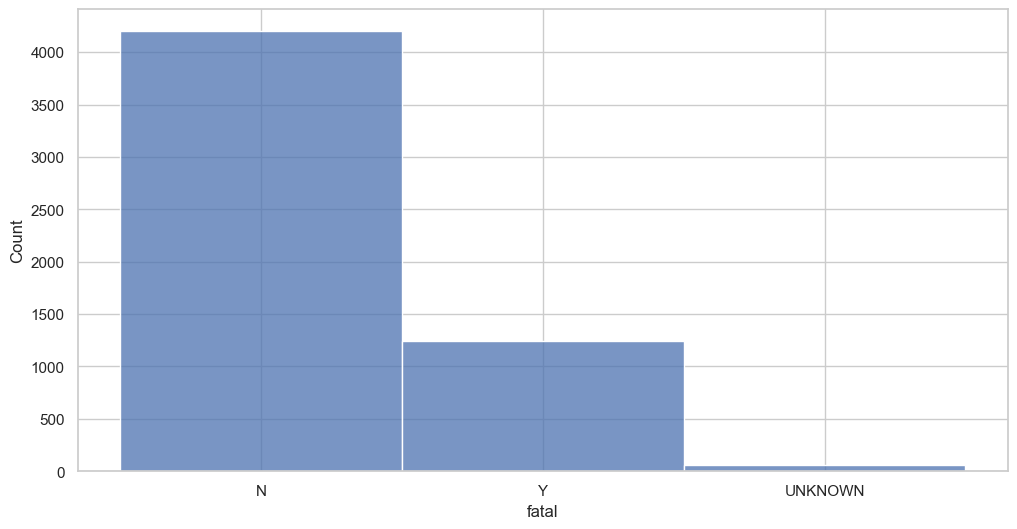

In [756]:
# we have finally cleaned the 'fatal' column, let's do a quick visualization
sns.histplot(data=df_fatal, x='fatal')

In [757]:
df_fatal.sample(5) # let's continue cleaning, so we take a look again at the df

date  year        type       country                   area  \
2194    1981.05.10  1981  Unprovoked  SOUTH AFRICA  Eastern Cape Province   
780     2010.02.11  2010  Unprovoked     AUSTRALIA        New South Wales   
2954    1954.09.15  1954  Unprovoked     HONG KONG                    NaN   
1852    1993.06.00  1993  Unprovoked           USA         North Carolina   
3761  2008.11.09.b  2008     Boating     AUSTRALIA        South Australia   

                     location  activity                                 name  \
2194             King’s Beach   Surfing                          John Dunser   
780   Mona Vale Beach, Sydney   Surfing                           Paul Welsh   
2954                 Junk Bay  Swimming  James Cook, a seaman from HMS Comus   
1852  Hamstead, Pender County  Swimming                      Suzanne Pferrer   
3761              North Haven   Fishing                                  NaN   

     sex    age info_age                                           injury  \
2194   M  19.00       19                          No Injury, board bitten   
780    M  46.00       46      Minor injury, lacerations to left lower leg   
2954   M  20.00       20                       FATAL, leg severely bitten   
1852   F  27.00     60's                       No injury, bumped by shark   
3761   M  27.38      NaN  No injury to occupant, shark bit dinghy & motor   

     fatal   time                            species  \
2194     N  14h45  Raggedtooth shark, 2.5 m [8.25']    
780      N  08h00              Wobbegong shark, 1.6m   
2954     Y    NaN                                NaN   
1852     N   Dusk                           6' shark   
3761     N    NaN                Bronze whaler shark   

                                 investigator or source  
2194                                M. Smale, PE Museum  
780                        John West,       Taronga Zoo  
2954  V.M. Coppleson (1958), p.260; A. MacCormick, p...  
1852                                        C. Creswell  
3761                                 C. Johansson, GSAF

In [758]:
# let's title the countries
dfcountries = df_fatal.copy()
dfcountries.country = dfcountries.country.apply(lambda i:i.title())
dfcountries.sample(4)

date  year        type       country                     area  \
444   2013.10.26.b  2013  Unprovoked       Reunion             d’Étang-Salé   
3814  2006.10.00.a  2006  Unprovoked  Gulf Of Aden  Between Somalia & Yemen   
5375  1921.01.11.R  1921     Invalid   Philippines   Cavite Province, Luzon   
2022  1988.00.00.c  1988  Unprovoked     Australia          New South Wales   

         location       activity                  name      sex    age  \
444   Ravine Mula  Body boarding        Gicquel Tanguy        M  24.00   
3814          NaN         Murder  5 Ethiopian refugees  Unknown  27.38   
5375          NaN            NaN                   NaN  Unknown  27.38   
2022       Sydney        Surfing          Ryan Kwanten        M  12.00   

     info_age                                             injury fatal   time  \
444        24                                  Right leg severed     N  16h30   
3814      NaN  FATAL,  beaten & thrown overboard by smugglers...     Y    NaN   
5375      NaN  Buttons & shoes found in shark caught in fish ...   NaN    NaN   
2022       12                                        Hand bitten     N    NaN   

                              species  \
444   Thought to involve a bull shark   
3814                              NaN   
5375                     Questionable   
2022                  Wobbegong shark   

                                 investigator or source  
444                             Global Post, 10/26/2013  
3814  United Nations High Commission for Refugees, 1...  
5375                    Reno Evening Gazette, 1/11/1921  
2022                               Star Pulse, 7/8/2010

<Axes: xlabel='year', ylabel='age'>

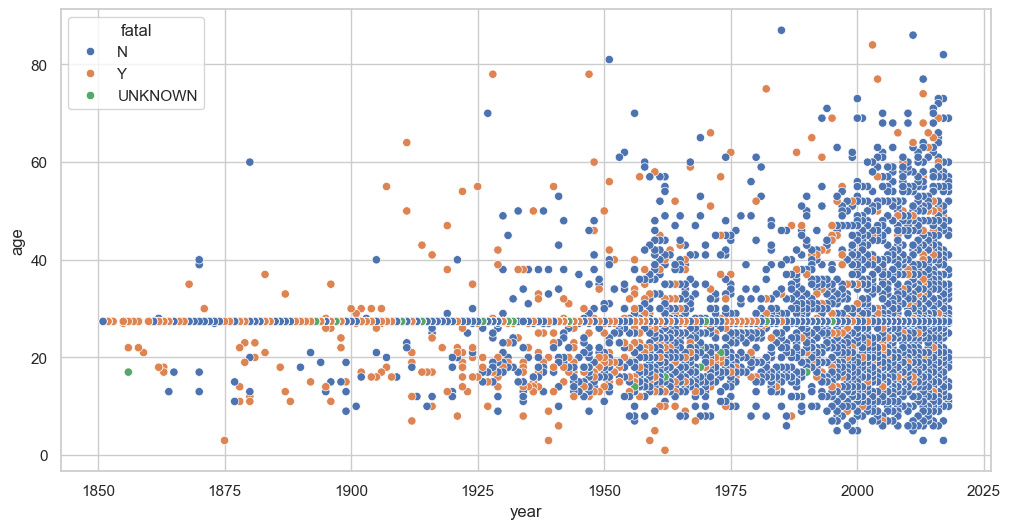

In [759]:
sns.scatterplot(x="year", y="age", hue="fatal", data=dfcountries)

In [760]:
# it doesn't look like this output is specially useful

In [761]:
len(dfcountries.country.unique())

193

In [762]:
# So many countries, let's take a quick look at them
countries_valuecounts = dfcountries.country.unique() # to get all the countries
countries_list = list(countries_valuecounts) # store them in a list
countries_list.sort() # sort the list alphabetically
print(', '.join(countries_list)) # to see the full list, but I have to scroll to the right and I don't see clearly the full name
countries_list # I see it better, though the output is truncated

 Philippines,  Tonga, Admiralty Islands, American Samoa, Andaman / Nicobar Islandas, Andaman Islands, Angola, Antigua, Argentina, Aruba, Atlantic Ocean, Australia, Azores, Bahamas, Bangladesh, Barbados, Bay Of Bengal, Belize, Bermuda, Brazil, British Isles, British New Guinea, British Virgin Islands, British West Indies, Burma, Canada, Cape Verde, Caribbean Sea, Cayman Islands, Central Pacific, Ceylon, Chile, China, Columbia, Comoros, Cook Islands, Costa Rica, Crete, Croatia, Cuba, Curacao, Cyprus, Diego Garcia, Dominican Republic, Ecuador, Egypt, Egypt , Egypt / Israel, El Salvador, England, Equatorial Guinea / Cameroon, Falkland Islands, Federated States Of Micronesia, Fiji, France, French Polynesia, Gabon, Georgia, Grand Cayman, Greece, Grenada, Guam, Guatemala, Guinea, Gulf Of Aden, Guyana, Haiti, Honduras, Hong Kong, Iceland, India, Indian Ocean, Indian Ocean?, Indonesia, Iran, Iran / Iraq, Iraq, Ireland, Israel, Italy, Italy / Croatia, Jamaica, Japan, Java, Johnston Island, Kenya

[' Philippines',
 ' Tonga',
 'Admiralty Islands',
 'American Samoa',
 'Andaman / Nicobar Islandas',
 'Andaman Islands',
 'Angola',
 'Antigua',
 'Argentina',
 'Aruba',
 'Atlantic Ocean',
 'Australia',
 'Azores',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Bay Of Bengal',
 'Belize',
 'Bermuda',
 'Brazil',
 'British Isles',
 'British New Guinea',
 'British Virgin Islands',
 'British West Indies',
 'Burma',
 'Canada',
 'Cape Verde',
 'Caribbean Sea',
 'Cayman Islands',
 'Central Pacific',
 'Ceylon',
 'Chile',
 'China',
 'Columbia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Crete',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Diego Garcia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Egypt ',
 'Egypt / Israel',
 'El Salvador',
 'England',
 'Equatorial Guinea / Cameroon',
 'Falkland Islands',
 'Federated States Of Micronesia',
 'Fiji',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Grand Cayman',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Gulf Of Aden',
 'Guyan

In [763]:
dfcountries['country'] = dfcountries['country'].str.lstrip() # I delete the spaces in the beginning of the string

In [764]:
# there are some places that are not countries
dfcountries[dfcountries['country']=='Azores']

date  year      type country area  \
861   2009.01.27.R  2009  Provoked  Azores  NaN   
3693    2010.10.25  2010  Provoked  Azores  NaN   
4688  1959.08.31.R  1959      Boat  Azores  NaN   
5235  1930.09.12.R  1930   Boating  Azores  NaN   
5916    1872.11.24  1872   Invalid  Azores  NaN   

                                     location activity  \
861   Onboard the fishing vessel Nuevo Cedes   Fishing   
3693              350 miles from Faial Island  Fishing   
4688                               Sao Miguel  Fishing   
5235                                      NaN      NaN   
5916                                      NaN      NaN   

                                                   name      sex    age  \
861                                 A Spanish fisherman        M  49.00   
3693                              crewman from the Gedi        M  27.38   
4688                                    40' bonito boat  Unknown  27.38   
5235                                                NaN  Unknown  27.38   
5916  Abel Fosdyk (who claimed to be sole survivor f...        M  27.38   

     info_age                                             injury fatal time  \
861        49              Left forearm bitten PROVOKED INCIDENT     N  NaN   
3693      NaN                               PROVOKED INCIDENT?       N  NaN   
4688      NaN           No injury to occupants; shark bit rudder     N  NaN   
5235      NaN           No inury to occupants, shark struck boat     N  NaN   
5916      NaN  No injury, but according to Fosdyk, captain & ...   NaN  NaN   

                                                species  \
861                                                 NaN   
3693                                                NaN   
4688  White shark, based on 2 teeth retrieved from r...   
5235                                                NaN   
5916                                                NaN   

         investigator or source  
861          C. Johansson, GSAF  
3693  Jornal Diario, 10/26/2010  
4688                A. Cordeiro  
5235             C. Moore, GSAF  
5916           Strand Magazine

In [765]:
dfcountries['area'] = np.where(dfcountries['country']=='Azores', 'Azores',dfcountries['area']) # where 'Azores' is in country, put it in 'area'
dfcountries['country'] = np.where(dfcountries['country']=='Azores', 'Portugal',dfcountries['country']) # where 'Azores' is in country, write 'Portugal'

In [766]:
# there are some places that are not countries
dfcountries[dfcountries['country']=='Columbia'] # not well written

date  year          type   country                    area  \
182     2016.06.24  2016    Unprovoked  Columbia        Isla Provedencia   
675     2011.07.05  2011    Unprovoked  Columbia                   Sucre   
685   2011.06.06.R  2011    Unprovoked  Columbia  San Andrés archipelago   
2464    1968.08.08  1968    Unprovoked  Columbia    Magdalena Department   
2947  1955.00.00.b  1955    Unprovoked  Columbia       Isles del Rosario   
4462  1967.08.14.R  1967    Unprovoked  Columbia                     NaN   
4483    1966.01.14  1966  Sea Disaster  Columbia                     NaN   
4622    1961.01.01  1961    Unprovoked  Columbia           Roncador Bank   
4883    1951.08.00  1951    Unprovoked  Columbia           Caribbean Sea   

                                        location  \
182                                          NaN   
675                         Libertad, San Onofre   
685                              Albuquerque Cay   
2464                       Makuaka Caño, Taganga   
2947                      Southwest of Cartegena   
4462                                         NaN   
4483                               Off Cartagena   
4622  Roncador Bank, 135 nm north of San Andres    
4883                                   Cartegena   

                                               activity  \
182                                        Scuba Diving   
675                                            Kayaking   
685                                        Spearfishing   
2464                                   Dynamite fishing   
2947                                       Spearfishing   
4462                                                NaN   
4483  Colombian  (Avianca) DC-4 airliner plunged int...   
4622  Taking boat from California to Florida when it...   
4883                                            Bathing   

                                                  name      sex    age  \
182                                       Arturo Velez        M  59.00   
675                          Andrés Tulio Amaya Vidal         M  17.00   
685                                   Jhon Jairo James        M  24.00   
2464                      Abel Mattos Antoniou Vasquez        M  18.00   
2947                               Gabriel Echiavarria        M  12.00   
4462                                      Thomas Walsh        M  27.38   
4483                                               NaN  Unknown  27.38   
4622                                       Joe Chaney         M  27.38   
4883  4 people killed in the past week, others injured  Unknown  27.38   

     info_age                                         injury fatal   time  \
182        59                      Severe bite to right hand     N  11h00   
675        17  Right arm bitten, defense wounds to left hand     N  10h30   
685        24             Injuries to right hand and forearm     N    NaN   
2464       18                            Lacerations to head     N  10h30   
2947       12                         Swim fin & foot bitten     N    NaN   
4462      NaN               3 fingers were bitten by a shark     N    NaN   
4483      NaN                     10 survived, 51 perished.      Y    NaN   
4622      NaN                                     Leg bitten     N    NaN   
4883      NaN                                          FATAL     Y    NaN   

                              species  \
182        Caribbean reef shark, 4.5'   
675                               NaN   
685                               NaN   
2464                        2 m shark   
2947                 1.5 m [5'] shark   
4462                              NaN   
4483  Shark involvement not confirmed   
4622                 1.8 m [6'] shark   
4883                              NaN   

                                 investigator or source  
182                                        Dr. A. Velez  
675                              El Universal, 7/6/2011  
685                             Il Isleno.co

In [767]:
dfcountries['country'] = np.where(dfcountries['country']=='Columbia', 'Colombia',dfcountries['country']) # where 'Columbia' is in country, write 'Colombia'
(dfcountries['country']=='Colombia').sum()

9

In [768]:
# there are some places that are not countries
dfcountries[dfcountries['country']=='England']

date  year        type  country  \
10    2018.05.13.a  2018     Invalid  England   
895   2008.08.30.a  2008    Provoked  England   
1019  2007.05.17.R  2007    Provoked  England   
2778  1960.08.04.b  1960    Provoked  England   
3969    2000.02.14  2000    Provoked  England   
4279  1981.06.15.R  1981        Boat  England   
4423  1970.01.09.R  1970  Unprovoked  England   
4431    1969.07.27  1969    Provoked  England   
4446    1968.06.00  1968  Unprovoked  England   
5321    1925.09.03  1925  Unprovoked  England   
5332    1924.07.14  1924    Provoked  England   
5362  1922.09.26.R  1922  Unprovoked  England   
5372    1921.09.00  1921    Provoked  England   
5538  1907.09.18.R  1907     Invalid  England   
5893  1876.00.00.c  1876  Unprovoked  England   
5999  1856.06.21.R  1856  Unprovoked  England   

                                      area                           location  \
10                                Cornwall                     Off Land's End   
895                            North Devon                       Lundy Island   
1019                                  Kent                         Folkestone   
2778               In the English Channel           Off the south Devon coast   
3969                        Worcestershire  The Fountain Pub in Tenbury Wells   
4279                                   NaN                      Isle of Wight   
4423                                 Devon                         Teignmouth   
4431                                   NaN                                NaN   
4446                                   NaN                                NaN   
5321                         Isle of Wight                       Off Shanklin   
5332                                Dorset                           Weymouth   
5362                        East Yorkshire                            Hornsea   
5372                                Dorset                           Weymouth   
5538                       English Channel                                NaN   
5893  Between Hastings & Fairlight, Sussex                                NaN   
5999                         Isle of Wight                        Colwell Bay   

                                          activity                name sex  \
10                                         Fishing        Max Berryman   M   
895                                        Fishing     Stephen Perkins   M   
1019                                       Fishing         Phil Tanner   M   
2778                   Helping angler land a shark       William Capel   M   
3969              Feeding prawns to captive sharks  Paul Smith, a chef   M   
4279                                       Fishing         2 fishermen   M   
4423  Attempted to return injured shark to the sea         a fisherman   M   
4431                                           NaN          Eric Brown   M   
4446                                           NaN           Roy Cloke   M   
5321                                       Fishing        Mr. S. Page    M   
5332                          Fishing for mackerel         2 fishermen   M   
5362                                     Swimming         Mr.P. H. Lee   M   
5372                                       Fishing             Roberts   M   
5538                                      Swimming           J. Wolffe   M   
5893                                           NaN                male   M   
5999                                      Swimming                male   M   

        age info_age                                             injury fatal  \
10    21.00       21  Injured by teeth of a dead porbeagle shark he ...     N   
895   52.00       52     Wrist bitten by hooked shark PROVOKED INCIDENT     N   
1019  38.00       38  Bitten on the nose by a hooked shark PROVOKED ...     N   
2778  25.00       25     Arm lacerated elbow to wrist PROVOKED INCIDENT     N   
3969  27.38      NaN                   Fingers bitten PROVOKED INCIDEN

In [769]:
# there are some places that are not countries
dfcountries['country'] = np.where(dfcountries['country']=='England', 'United Kingdom',dfcountries['country']) # where 'England' is in country, write 'United Kingdom'
(dfcountries['country']=='United Kingdom').sum()

27

In [770]:
dfcountries[dfcountries['country']=='Scotland']

date  year        type   country            area  \
557     2012.08.31  2012    Provoked  Scotland  Inner Hebrides   
632   2011.10.28.R  2011  Unprovoked  Scotland           Moray   
810     2009.10.17  2009    Provoked  Scotland            Fife   
3771  2008.06.02.R  2008     Boating  Scotland     Easter Ross   
5106    1937.09.12  1937     Boating  Scotland     Argyllshire   
5107    1937.09.11  1937     Boating  Scotland           Arran   
5108    1937.09.01  1937  Unprovoked  Scotland          Argyll   
5952    1864.09.00  1864  Unprovoked  Scotland       Edinburgh   

                              location          activity  \
557              Off the Isle of Islay     Shark fishing   
632                           Spey Bay           Surfing   
810            Deep Sea World Aquarium            Diving   
3771                     Balintore Bay           Fishing   
5106                             Arran  Pleasure boating   
5107                      Fallen Rocks           Fishing   
5108  Carradale Bay, Kintyre Peninsula            Rowing   
5952                           Granton               NaN   

                                                   name      sex    age  \
557                                       Hamish Currie        M  53.00   
632                                        Andrew Rollo        M  26.00   
810                                                male        M  23.00   
3771                    12' boat,           2 occupants  Unknown  27.38   
5106                          Clyde steamer Glen Sannox  Unknown  27.38   
5107  boat: Lady Charlotte, occupants: C. McSporran ...  Unknown  27.38   
5108             Captain Angus Brown, his son & brother        M  27.38   
5952                                        Mr. Ballard        M  27.38   

     info_age                                             injury fatal   time  \
557        53  No injury, shoe bitten by hooked and landed sh...     N    NaN   
632        26              No injury, shark bumped leg & board.      N    NaN   
810        23  15-20 puncture wounds to arm by captive shark ...     N  14h45   
3771      NaN    No injury to occupants; shark struck their boat     N    NaN   
5106      NaN  No injury to occupants, two 5-foot observation...     N    NaN   
5107      NaN    No injury to occupants, propeller shaft damaged     N    NaN   
5108      NaN  3 people drowned when the boat was capsized by...     N    NaN   
5952      NaN                                 Leg bitten 3 times     N    NaN   

                  species                        investigator or source  
557   Porbeagle shark, 7'                         The Mirror, 8/31/2012  
632       8' to 10' shark                      Daily Record, 10/28/2011  
810           Angel shark                   Telegraph.co.uk, 10/18/2009  
3771        Basking shark                            C. Johansson, GSAF  
5106        Basking shark   Daily Mail (undated clipping); A Buttigieg   
5107        Basking shark  Times (London), 9/13/1937; C. Creswell, GSAF  
5108        Basking shark  Times (London), 9/2/1937; Fairfax, pp. 66-67  
5952             3' shark                     C. Moore citing R. Peirce

In [771]:
# there are some places that are not countries
dfcountries['country'] = np.where(dfcountries['country']=='Scotland', 'United Kingdom',dfcountries['country']) # where 'Scotland' is in country, write 'United Kingdom'
(dfcountries['country']=='United Kingdom').sum()

35

In [772]:
print(', '.join(countries_list)) # to see the full list, but I have to scroll to the right and I don't see clearly the full name
countries_list # I see it better, though the output is truncated

 Philippines,  Tonga, Admiralty Islands, American Samoa, Andaman / Nicobar Islandas, Andaman Islands, Angola, Antigua, Argentina, Aruba, Atlantic Ocean, Australia, Azores, Bahamas, Bangladesh, Barbados, Bay Of Bengal, Belize, Bermuda, Brazil, British Isles, British New Guinea, British Virgin Islands, British West Indies, Burma, Canada, Cape Verde, Caribbean Sea, Cayman Islands, Central Pacific, Ceylon, Chile, China, Columbia, Comoros, Cook Islands, Costa Rica, Crete, Croatia, Cuba, Curacao, Cyprus, Diego Garcia, Dominican Republic, Ecuador, Egypt, Egypt , Egypt / Israel, El Salvador, England, Equatorial Guinea / Cameroon, Falkland Islands, Federated States Of Micronesia, Fiji, France, French Polynesia, Gabon, Georgia, Grand Cayman, Greece, Grenada, Guam, Guatemala, Guinea, Gulf Of Aden, Guyana, Haiti, Honduras, Hong Kong, Iceland, India, Indian Ocean, Indian Ocean?, Indonesia, Iran, Iran / Iraq, Iraq, Ireland, Israel, Italy, Italy / Croatia, Jamaica, Japan, Java, Johnston Island, Kenya

[' Philippines',
 ' Tonga',
 'Admiralty Islands',
 'American Samoa',
 'Andaman / Nicobar Islandas',
 'Andaman Islands',
 'Angola',
 'Antigua',
 'Argentina',
 'Aruba',
 'Atlantic Ocean',
 'Australia',
 'Azores',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Bay Of Bengal',
 'Belize',
 'Bermuda',
 'Brazil',
 'British Isles',
 'British New Guinea',
 'British Virgin Islands',
 'British West Indies',
 'Burma',
 'Canada',
 'Cape Verde',
 'Caribbean Sea',
 'Cayman Islands',
 'Central Pacific',
 'Ceylon',
 'Chile',
 'China',
 'Columbia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Crete',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Diego Garcia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Egypt ',
 'Egypt / Israel',
 'El Salvador',
 'England',
 'Equatorial Guinea / Cameroon',
 'Falkland Islands',
 'Federated States Of Micronesia',
 'Fiji',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Grand Cayman',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Gulf Of Aden',
 'Guyan

In [773]:
dfcountries.country.nunique()

188

In [774]:
 # The Andaman & Nicobar Islands is a union territory of India
dfcountries['area'] = np.where(dfcountries['country']=='Andaman / Nicobar Islandas', 'Andaman & Nicobar Islands',dfcountries['area']) # I put the name in 'area'
dfcountries['country'] = np.where(dfcountries['country']=='Andaman / Nicobar Islandas', 'India',dfcountries['country']) # I put the right name in 'country'
dfcountries.country.nunique()

187

In [775]:
dfcountries[dfcountries['country']=='Andaman / Nicobar Islandas'] # nothing left

Empty DataFrame
Columns: [date, year, type, country, area, location, activity, name, sex, age, info_age, injury, fatal, time, species, investigator or source]
Index: []

In [776]:
# it can take a looong time, so I will just do this for the top values, since I'm gonna put together all the countries where value_counts < 5
dfcountries['country'].value_counts().head(77)

country
Usa                 2181
Australia           1296
South Africa         571
Papua New Guinea     130
New Zealand          127
                    ... 
Singapore              5
Palau                  5
Malaysia               5
Turks & Caicos         5
Malta                  5
Name: count, Length: 77, dtype: int64

In [777]:
country_namestop = list(dfcountries['country'].value_counts().head(77).index) # the countries where there have been at least 5 attacks
country_namesall = list(dfcountries['country'].value_counts().index) # all the countries
dfcountries['info_country'] = dfcountries['country'].apply(lambda x: 'Other' if x not in country_namestop else x) # the function where I substitute the least frequent countries with 'Other'
dfcountries # I create a new column 'info_country' because I want to keep the original information of the country just in case in the column 'country'

date  year          type    country             area  \
0       2018.06.25  2018       Boating        Usa       California   
1       2018.06.18  2018    Unprovoked        Usa          Georgia   
2       2018.06.09  2018       Invalid        Usa           Hawaii   
3     2018.06.03.a  2018    Unprovoked     Brazil       Pernambuco   
4       2018.05.27  2018    Unprovoked        Usa          Florida   
...            ...   ...           ...        ...              ...   
6023  1851.06.16.R  1851    Unprovoked     Mexico           Oaxaca   
6024  1851.03.08.R  1851    Unprovoked        Usa           Hawaii   
6025    1851.00.00  1851    Unprovoked        Usa       California   
6026    1806.04.24  1896  Sea Disaster        Usa              NaN   
6027    1934.07.11  1934       Boating  Australia  New South Wales   

                                               location         activity  \
0                           Oceanside, San Diego County         Paddling   
1                        St. Simon Island, Glynn County         Standing   
2                                          Habush, Oahu          Surfing   
3                                 Piedade Beach, Recife         Swimming   
4     Lighhouse Point Park, Ponce Inlet, Volusia County          Fishing   
...                                                 ...              ...   
6023                                 Tehuantepec Harbor          Bathing   
6024                                    Honolulu Harbor         Swimming   
6025  San Francisco Bay (or San Leandro Bay), near c...  Hard hat diving   
6026                                                NaN              NaN   
6027                                           Cronulla          Fishing   

                                                   name sex    age info_age  \
0                                           Julie Wolfe   F  57.00       57   
1                                       Adyson McNeely    F  11.00       11   
2                                           John Denges   M  48.00       48   
3                                Jose Ernesto da Silva    M  18.00       18   
4                                                  male   M  52.00       52   
...                                                 ...  ..    ...      ...   
6023  John H. Gray & another member of the Tehuantep...   M  27.38      NaN   
6024                                       James Kinney   M  27.38      NaN   
6025                                   William Cortigan   M  27.38      NaN   
6026                          Crew of the schooner Mary   M  27.38      NaN   
6027        18' boat, occupants William & Leslie Newton   F  27.38      NaN   

                                                 injury fatal            time  \
0     No injury to occupant, outrigger canoe and pad...     N           18h00   
1                            Minor injury to left thigh     N   14h00  -15h00   
2          Injury to left lower leg from surfboard skeg     N           07h45   
3                                                 FATAL     Y  Late afternoon   
4               Minor injury to foot. PROVOKED INCIDENT     N             NaN   
...                                                 ...   ...             ...   
6023                                              FATAL     Y             NaN   
6024                                              FATAL     Y             NaN   
6025                                     3 toes severed     N             NaN   
6026                Shark scavenged on the dead sailors   NaN             NaN   
6027  No injury to occupants Sharks continually foll...     N             NaN   

                 species                             investigator or source  \
0            White shark                                   R. Collier, GSAF   
1                    NaN                     K.McMurray, TrackingSharks.com   
2                    NaN                     K.McMurray, TrackingSharks.com   
3            Tiger sha

In [778]:
dfcountries.columns # I get the names of the columns to set a new order

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'info_age', 'injury', 'fatal', 'time', 'species',
       'investigator or source', 'info_country'],
      dtype='object')

In [779]:
columns2 = ['date', 'year', 'type', 'info_country', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'info_age', 'injury', 'fatal', 'time', 'species',
       'investigator or source']
dfcountries = dfcountries.reindex(columns=columns2) # now they are side by side
dfcountries.sample() # let's see how it looks

date  year     type info_country country        area  \
3795  2007.07.21  2007  Boating          Usa     Usa  California   

                                       location       activity         name  \
3795  Bean Hollow State Beach, San Mateo County  Kayak Fishing  Dan Prather   

     sex    age info_age                   injury fatal   time      species  \
3795   M  27.38      NaN  No injury, kayak bitten     N  10h15  White shark   

                                 investigator or source  
3795  R. Collier; San Francisco Chronicle, 7/23/2007...

In [780]:
dfcountries.sample() # let's see how it looks

date  year     type info_country country     area  \
3516  2016.07.17  2016  Boating          Usa     Usa  Alabama   

                location                               activity  \
3516  8 miles off Mobile  Fishing in Alabama Deep Fishing Rodeo   

                      name      sex    age info_age  \
3516  Occupant: Ben Raines  Unknown  27.38      NaN   

                                   injury fatal time            species  \
3516  No injury, shark bit trolling motor     N  NaN  Tiger shark, 10'    

     investigator or source  
3516      Al.com, 7/19/2016

In [781]:
dfcountries[dfcountries['info_country']=='Other']

date  year          type info_country  \
14       2018.04.23  2018    Unprovoked        Other   
76       2017.07.24  2017    Unprovoked        Other   
94       2017.05.12  2017    Unprovoked        Other   
102      2017.04.22  2017    Unprovoked        Other   
209      2016.04.08  2016       Invalid        Other   
...             ...   ...           ...          ...   
5968  1863.00.00.R3  1863    Unprovoked        Other   
5969  1863.00.00.R2  1863    Unprovoked        Other   
5983   1861.02.12.R  1861    Unprovoked        Other   
5990     1860.03.27  1860  Sea Disaster        Other   
5994     1858.04.04  1858    Unprovoked        Other   

                                    country                area     location  \
14                                 Maldives   Alifu Alifu Atoll    Madoogali   
76    St Helena, British Overseas Territory    Ascension Island  English Bay   
94                     United Arab Emirates           Sharjah,   Khor Fakkan   
102   St Helena, British Overseas Territory    Ascension Island  English Bay   
209                              Cape Verde    Boa Vista Island          NaN   
...                                     ...                 ...          ...   
5968                                 Ceylon                 NaN          NaN   
5969                                 Ceylon                 NaN          NaN   
5983           Equatorial Guinea / Cameroon  Fernando Po Island          NaN   
5990                           Cook Islands      Mangaia Island          NaN   
5994                                 Tobago                 NaN    Rocky Bay   

                                   activity  \
14                                  Fishing   
76                                  Surfing   
94                             Spearfishing   
102                              Snorkeling   
209                                     NaN   
...                                     ...   
5968                         Fell overboard   
5969                         Fell overboard   
5983                               Swimming   
5990  43-ton schooner Irene capsized & sank   
5994                                Bathing   

                                         name sex    age info_age  \
14                              Ahmed Rasheed   M  32.00       32   
76                               Kawika Matsu   M  37.00       37   
94                              Al Beloushi     M  41.00       41   
102                         Frankie Gonsalves   F  40.00       40   
209                         a British citizen   M  60.00       60   
...                                       ...  ..    ...      ...   
5968     male from the ship James F. Bradwell   M  27.38      NaN   
5969  male, carpenter from the ship Fair Hope   M  27.38      NaN   
5983                           William Looney   M  27.38      NaN   
5990                        a Cook's Islander   M  27.38      NaN   
5994                            John Williams   M  27.38      NaN   

                                injury fatal     time  \
14                  5-inch cut to hand     N    21h50   
76                        Torso bitten     N    17h00   
94           Right leg severely bitten     N  Morning   
102                 Calf & foot bitten     N    16h00   
209                          "Serious"   NaN      NaN   
...                                ...   ...      ...   
5968                             FATAL     Y      NaN   
5969                             FATAL     Y      NaN   
5983                             FATAL     Y      NaN   
5990                Probable drowning      Y      NaN   
5994  Leg bitten, surgically amputated     N      NaN   

                              species             investigator or source  
14                        Tiger shark    K. McMurray, TrackingSharks.com  
76                                NaN            Telegraph UK, 7/28/2017  
94                                NaN               Gulf News, 5/13/2017  
10

In [782]:
# there are 183 cases out of 6028 (3%) where the original country (or location) has been replaced by 'Other'
# so we can accept it, now the df is much cleaner

In [783]:
dfcountries.info_country.nunique()

78

In [784]:
# even though now we have less than half the countries, there are still many, it's quite messy. Let's go back to it later
dfcountries.country.value_counts()

country
Usa                   2181
Australia             1296
South Africa           571
Papua New Guinea       130
New Zealand            127
                      ... 
Comoros                  1
Guinea                   1
British New Guinea       1
Cyprus                   1
Tobago                   1
Name: count, Length: 187, dtype: int64

In [785]:
# we can clearly see that shark attacks happened in mainly 3 countries (USA, Australia and South Africa)

In [786]:
# # let's try to get a countplot
# sns.countplot(data=dfcountries, x='info_country')

In [787]:
# we cannot see anything, let's get a countplot with the top 20 countries
dfcountries20 = dfcountries.copy()
country_namestop = list(dfcountries20['country'].value_counts().head(20).index) # the top 20 countries with the highest number of attacks
country_namesall = list(dfcountries20['country'].value_counts().index) # all the countries
dfcountries20['info_country'] = dfcountries20['country'].apply(lambda x: 'Other' if x not in country_namestop else x) # the function where I substitute the least frequent countries with 'Other'
dfcountries20['info_country'].value_counts()

info_country
Usa                 2181
Australia           1296
Other                854
South Africa         571
Papua New Guinea     130
New Zealand          127
Brazil               111
Bahamas              106
Mexico                85
Italy                 67
Philippines           62
Fiji                  60
Reunion               58
New Caledonia         53
Mozambique            43
Cuba                  41
Spain                 40
Undetermined          37
Egypt                 37
United Kingdom        35
Japan                 34
Name: count, dtype: int64

<Axes: xlabel='info_country', ylabel='count'>

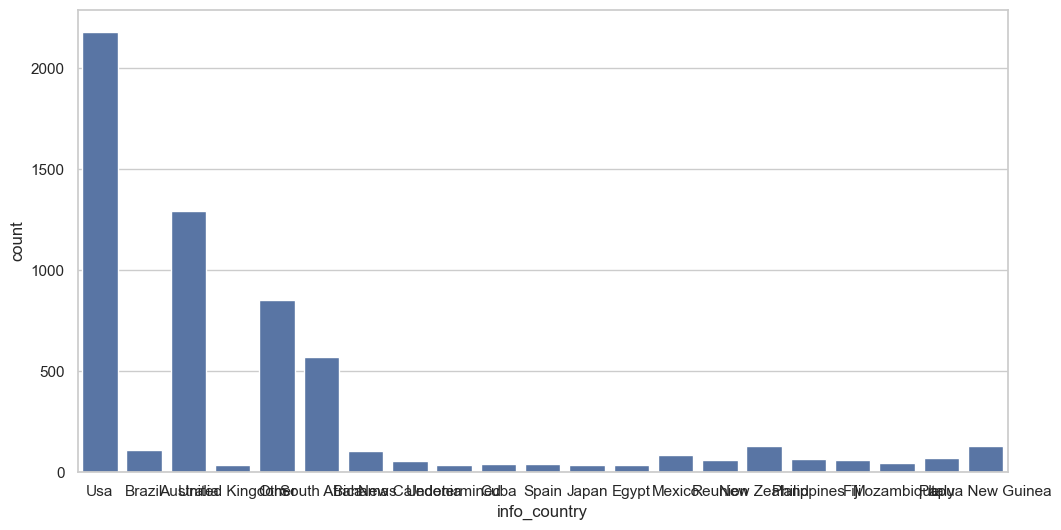

In [788]:
# let's try to get a countplot
sns.countplot(data=dfcountries20, x='info_country')

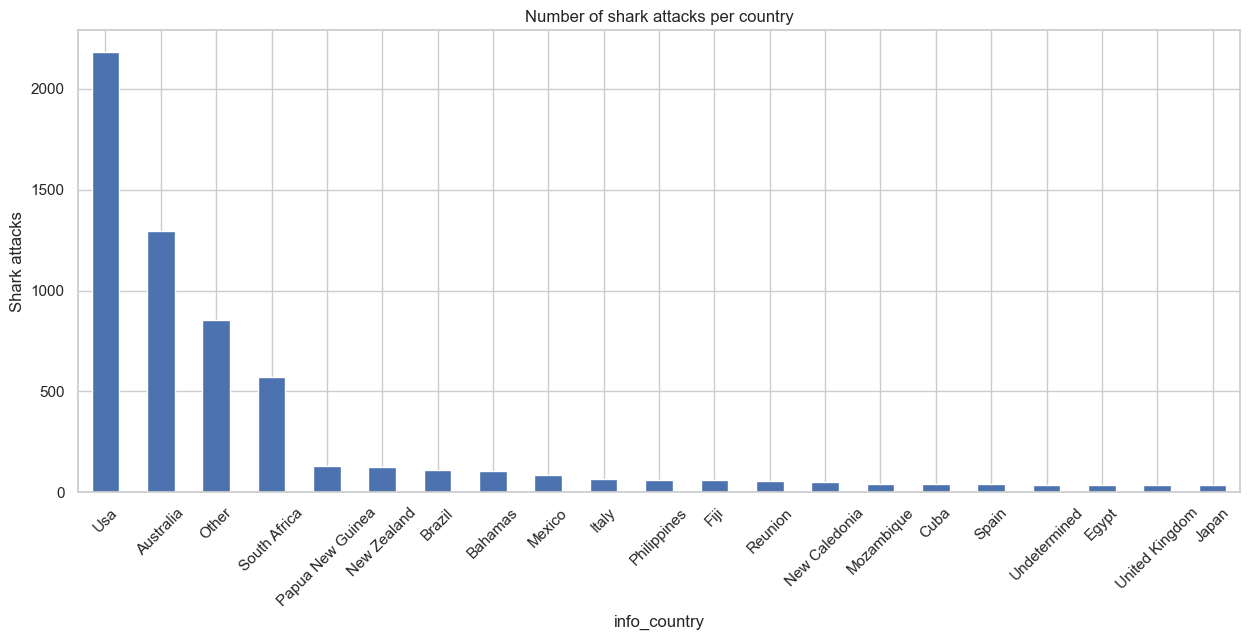

In [789]:
# we cannot see anything, let's get use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfcountries20['info_country'].value_counts().plot(kind="bar", title="Number of shark attacks per country")
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

In [790]:
# let's try to get out the 'Other' values in the 'info_country' column
dfcountries20clean = dfcountries20[dfcountries20['info_country']!='Other']
dfcountries20clean['info_country'].value_counts()

info_country
Usa                 2181
Australia           1296
South Africa         571
Papua New Guinea     130
New Zealand          127
Brazil               111
Bahamas              106
Mexico                85
Italy                 67
Philippines           62
Fiji                  60
Reunion               58
New Caledonia         53
Mozambique            43
Cuba                  41
Spain                 40
Undetermined          37
Egypt                 37
United Kingdom        35
Japan                 34
Name: count, dtype: int64

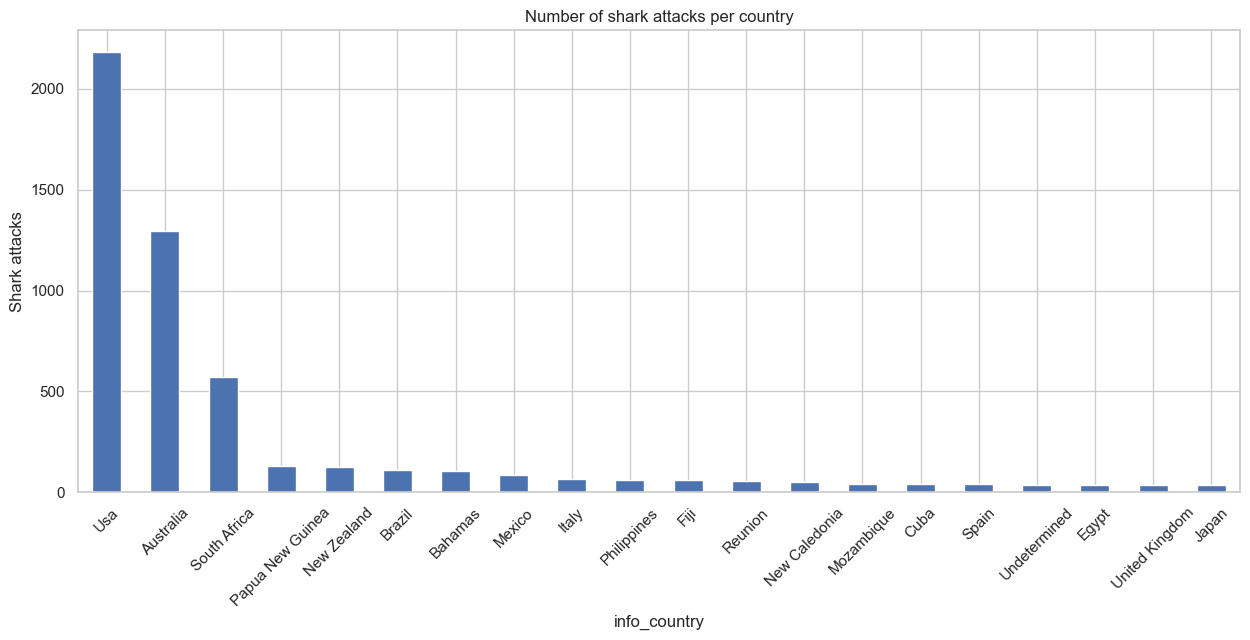

In [791]:
# let's run again the countplot
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfcountries20clean['info_country'].value_counts().plot(kind="bar", title="Number of shark attacks per country")
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

In [792]:
# let's analize the activity and try to relate it to the fatality
dfcountries.activity.value_counts()

activity
Surfing                                                  968
Swimming                                                 821
Fishing                                                  419
Spearfishing                                             333
Wading                                                   145
                                                        ... 
Attempting to set underwater endurance record              1
Swimming, attacked at  surf carnival                       1
Free diving, working on U/W scenes for motion picture      1
Longling fishing                                           1
Vessel capsized, wading ashore carrying an oar             1
Name: count, Length: 1463, dtype: int64

In [793]:
dfcountries.activity.isna().sum() # let's see if we have nulls

486

In [794]:
# we have many nulls, we have to get rid of them in order to analize the df
dfcountries.activity.fillna('Unknown', inplace=True)
dfcountries.activity.isna().sum() # let's see if it has been changed correctly

0

In [795]:
dfcountries.activity.nunique()

1463

In [796]:
# too many activities, 1463, let's group some
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
print(', '.join(activity_list)) # to see the full list, but I have to scroll to the right and I don't see clearly the full name
activity_list # I see it better, though the output is truncated

 ,    ,  a canoe was pursuing a schooner that had forcibily abducted 5 young girls, "Boat accident", "Climbing up to ship after repairing the stern in water", "Crossing the river", "Flying Tiger" transport plane went down with 5 men onboard, "Riding waves on a board", "Swimming vigorously", ., 12 of the Penang's crew were returning to the ship when their 12' dinghy capsized, 13 men in the water after sailboat capsized & sank, 14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water, 1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909, 16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore, 17 Maldivians adrift in open boat for 31 days, 2 boats capsized, 2 messboys (Jeppsen) & Tony Latona (13) were

[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '"Swimming vigorously"',
 '.',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats caps

In [797]:
# too messy, let's take a look at the least common activities
dfcountries.activity.value_counts().tail(50)

activity
Swimming near jetty with 2' piece of wood                                                                                                                                                                                  1
Lifesaving exhibition                                                                                                                                                                                                      1
Moving shark from tuna vessel when boat rolled, placing both man & shark in chest-deep water                                                                                                                               1
Underwater photography                                                                                                                                                                                                     1
Fishing, shark caught in his net                                                                           

In [798]:
# there's just too much detail, many of them could be converted to common activities such as 'Swimming' of 'Fishing'
# so let's apply Regex
dffishingregex = dfcountries[dfcountries['activity'].str.contains(r"Fishing")] # I apply regex to select the rows where 'activity' contain 'Fishing'
dffishingregex.shape

(615, 17)

In [799]:
dfcountries[dfcountries['activity']=="Fishing"].shape

(419, 17)

In [800]:
# so we discovered around 200 cases where we can simplify the activity to just 'Fishing', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Fishing"), 'Fishing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Fishing'].shape # to check if we have done it correctly]

(615, 17)

In [801]:
dfcountries.activity.nunique() # there are more than a 100 rows converted to 'Fishing' (1463-1333)

1333

In [802]:
# let's apply Regex with 'Swimming'
dfswimminggregex = dfcountries[dfcountries['activity'].str.contains(r"Swimming")] # I apply regex to select the rows where 'activity' contain 'Swimming'
dfswimminggregex.shape

(1019, 17)

In [803]:
dfcountries[dfcountries['activity']=="Swimming"].shape

(821, 17)

In [804]:
# so we discovered around 200 cases where we can simplify the activity to just 'Swimming', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Swimming"), 'Swimming', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Swimming'].shape # to check if we have done it correctly]

(1019, 17)

In [805]:
dfcountries.activity.nunique() # there are more than a 100 rows converted to 'Swimming' (1333-1193)

1193

In [806]:
# too many activities, 1193, let's group some
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
activity_list # I see it better

[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '.',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '2 messboys (Jepps

In [807]:
# let's group 'Bathing'
dfcountries[dfcountries['activity']=="Bathing"].shape

(141, 17)

In [808]:
# let's apply Regex with 'Bathing'
dfbathinggregex = dfcountries[dfcountries['activity'].str.contains(r"Bathing")] # I apply regex to select the rows where 'activity' contain 'Bathing'
dfbathinggregex.shape

(163, 17)

In [809]:
dfswimminggregex.activity.value_counts() # to see the different activities that contain 'Bathing'

activity
Swimming                                                              821
Swimming                                                               46
Freedom Swimming                                                        4
Swimming after his hat                                                  2
Swimming / Wading                                                       2
                                                                     ... 
Swimming, after single-engine aircraft went down in the sea             1
Swimming in canal                                                       1
Swimming behind sailboat                                                1
Swimming from makeshift raft  to life vest after fishing boat sank      1
Swimming from capsized boat                                             1
Name: count, Length: 141, dtype: int64

In [810]:
dfbathinggregex.activity.value_counts().shape # to see how many activities contain 'Bathing'

(20,)

In [811]:
# so we discovered 19 cases where we can simplify the activity to just 'Bathing', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Bathing"), 'Bathing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Bathing'].shape # to check if we have done it correctly, it should be the same number as dfbathinggregex.shape

(163, 17)

In [812]:
dfcountries.activity.nunique() # there are around 20 rows converted to 'Bathing' (1193-1174)

1174

In [813]:
# let's group 'Surfing'
dfcountries[dfcountries['activity']=="Surfing"].shape

(968, 17)

In [814]:
# let's apply Regex with 'Surfing'
dfsurfinggregex = dfcountries[dfcountries['activity'].str.contains(r"Surfing")] # I apply regex to select the rows where 'activity' contain 'Surfing'
dfsurfinggregex.shape

(1021, 17)

In [815]:
dfsurfinggregex.activity.value_counts()  # to see the different activities that contain 'Surfing'

activity
Surfing                                                968
Surfing (sitting on his board)                           7
Kite Surfing                                             6
Surfing                                                  5
Surfing, paddling seawards                               3
Standing / Surfing                                       2
Surfing, collided with shark                             2
Surfing (lying prone on his board)                       2
Surfing, pushing board ashore                            1
Surfing, but swimming to his board                       1
Surfing on "chest board" (boogie board?)                 1
Surfing, but treading water                              1
Surfing & dangling foot in water amid baitfish           1
Surfing on air mattress                                  1
Surfing (pneumatic surfboard)                            1
Surfing & filming dolphins                               1
Night Surfing                                  

In [816]:
dfsurfinggregex.activity.value_counts().shape # to see how many activities contain 'Surfing'

(34,)

In [817]:
# so we discovered 33 cases where we can simplify the activity to just 'Surfing', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Surfing"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape # to check if we have done it correctly, it should be the same number as dfsurfinggregex.shape

(1021, 17)

In [818]:
dfcountries.activity.nunique() # there are around 50 rows converted to 'Surfing' (1193-1141)

1141

In [819]:
# too many activities, 1141, let's group some
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
activity_list # I see it better

[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '.',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '2 messboys (Jepps

In [820]:
# let's group 'Spearfishing'
dfcountries[dfcountries['activity']=="Spearfishing"].shape

(333, 17)

In [821]:
# let's apply Regex with 'Spearfishing'
dfspearfishinggregex = dfcountries[dfcountries['activity'].str.contains(r"Spearfishing")] # I apply regex to select the rows where 'activity' contain 'Spearfishing'
dfspearfishinggregex.shape

(408, 17)

In [822]:
dfspearfishinggregex.activity.value_counts()  # to see the different activities that contain 'Spearfishing'

activity
Spearfishing                                                                                                                                          333
Spearfishing on Scuba                                                                                                                                   6
Spearfishing / free diving                                                                                                                              4
Spearfishing (free diving)                                                                                                                              3
Spearfishing / Scuba diving (at surface)                                                                                                                3
Spearfishing                                                                                                                                            3
Free diving, Spearfishing                                          

In [823]:
dfspearfishinggregex.activity.value_counts().shape # to see how many activities contain 'Spearfishing'

(56,)

In [824]:
# so we discovered 55 cases where we can simplify the activity to just 'Spearfishing', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Spearfishing"), 'Spearfishing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Spearfishing'].shape # to check if we have done it correctly, it should be the same number as dfspearfishinggregex.shape

(408, 17)

In [825]:
dfcountries.activity.nunique() # there are more than a 100 rows converted to 'Spearfishing' (1141-1086)

1086

In [826]:
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Spear"), 'Spearfishing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Spearfishing'].shape # to check if we have done it correctly, it should be the same number as dfspearfishinggregex.shape

(415, 17)

In [827]:
dfcountries.activity.nunique() # there are more than a 100 rows converted to 'Spearfishing' (1141-1081)

1081

In [828]:
dfcountries.activity.value_counts().head(50)

activity
Surfing                    1021
Swimming                   1019
Fishing                     615
Unknown                     489
Spearfishing                415
Bathing                     163
Wading                      145
Diving                      115
Standing                     96
Snorkeling                   88
Scuba diving                 75
Body boarding                61
Body surfing                 49
Kayaking                     33
Treading water               32
Boogie boarding              29
Fell overboard               27
Free diving                  27
Pearl diving                 26
Windsurfing                  19
Walking                      17
Boogie Boarding              16
Shark fishing                15
Floating                     14
Canoeing                     12
Surf fishing                 12
Surf-skiing                  12
Rowing                       12
Surf skiing                  12
Freediving                   10
Scuba Diving                 10

In [829]:
# too many activities, 1081, let's group some more
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
activity_list # I see it better

[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '.',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '2 messboys (Jepps

In [830]:
# let's group 'Diving'
dfcountries[dfcountries['activity']=="Diving"].shape

(115, 17)

In [831]:
# let's apply Regex with 'Diving'
dfdivinggregex = dfcountries[dfcountries['activity'].str.contains(r"Div")] # I apply regex to select the rows where 'activity' contain 'Diving'
dfdivinggregex.shape

(238, 17)

In [832]:
dfdivinggregex.activity.value_counts()  # to see the different activities that contain 'Diving'

activity
Diving                                          115
Scuba Diving                                     10
Diving for trochus                                8
Diving for abalone                                7
Diving for coins                                  4
                                               ... 
Diving for trochus , but swimming on surface      1
Diving off wharf                                  1
Diving off pier & treading water                  1
Diving by wharf                                   1
Commercial Salvage Diving                         1
Name: count, Length: 83, dtype: int64

In [833]:
dfdivinggregex.activity.value_counts().shape # to see how many activities contain 'Diving'

(83,)

In [834]:
# so we discovered 82 cases where we can simplify the activity to just 'Diving', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Div"), 'Diving', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Diving'].shape # to check if we have done it correctly, it should be the same number as dfdivinggregex.shape

(238, 17)

In [835]:
dfcountries.activity.nunique() # there are almost 100 rows converted to 'Diving' (1081-999)

999

In [836]:
dfcountries.activity.value_counts().head(50)

activity
Surfing                       1021
Swimming                      1019
Fishing                        615
Unknown                        489
Spearfishing                   415
Diving                         238
Bathing                        163
Wading                         145
Standing                        96
Snorkeling                      88
Scuba diving                    75
Body boarding                   61
Body surfing                    49
Kayaking                        33
Treading water                  32
Boogie boarding                 29
Free diving                     27
Fell overboard                  27
Pearl diving                    26
Windsurfing                     19
Walking                         17
Boogie Boarding                 16
Shark fishing                   15
Floating                        14
Rowing                          12
Surf fishing                    12
Surf-skiing                     12
Surf skiing                     12
Canoeing   

In [837]:
# let's also change the lowercase cases ('diving')
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"diving"), 'Diving', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Diving'].shape

(530, 17)

In [838]:
dfcountries.activity.nunique() # there are more than a 100 rows converted to 'Diving' (999-885)

885

In [839]:
dfcountries.activity.value_counts().tail(60)

activity
Lifeboat capsized                                                                                                                                                                                                          1
Pulling raft out to ride to shore                                                                                                                                                                                          1
Testing classified underwater electronic gear for Raytheon Corporation, vessel torn apart by explosion                                                                                                                     1
Wading, fishing for flounder                                                                                                                                                                                               1
17 Maldivians adrift in open boat for 31 days                                                              

In [840]:
# let's group 'Wading'
dfcountries[dfcountries['activity']=="Wading"].shape

(145, 17)

In [841]:
# let's apply Regex with 'Wading'
dfWadinggregex = dfcountries[dfcountries['activity'].str.contains(r"Wading")] # I apply regex to select the rows where 'activity' contain 'Wading'
dfWadinggregex.shape

(162, 17)

In [842]:
dfWadinggregex.activity.value_counts()  # to see the different activities that contain 'Wading'

activity
Wading                                               145
Wading or swimming                                     1
Wading, netting fish                                   1
Wading, knocked down & swept away by large waves       1
Wading (shrimping)                                     1
Wading to dinghy, carrying his son                     1
Wading, fishing for flounder                           1
Wading & pushing dinghy toward  the shallows           1
Standing / Wading                                      1
Wading in school of baitfish                           1
Wading with surfboard                                  1
Wading to shore after surfing                          1
Wading, when he stepped on the shark                   1
Wading to shore from his boat                          1
Wading near a fishing net                              1
Wading / fishing & carrying a bag of fish              1
Wading?                                                1
Wading after stray fis

In [843]:
dfWadinggregex.activity.value_counts().shape # to see how many activities contain 'Wading'

(18,)

In [844]:
# so we discovered 17 cases where we can simplify the activity to just 'Wading', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Wading"), 'Wading', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Wading'].shape # to check if we have done it correctly, it should be the same number as dfWadinggregex.shape

(162, 17)

In [845]:
dfcountries.activity.nunique() # there are 17 rows converted to 'Wading' (885-868)

868

In [846]:
# let's apply Regex with 'wading' as well
dfwadinggregex = dfcountries[dfcountries['activity'].str.contains(r"wading")] # I apply regex to select the rows where 'activity' contain 'wading'
dfwadinggregex.shape

(5, 17)

In [847]:
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"wading"), 'wading', dfcountries['activity'])
dfcountries[dfcountries['activity']=='wading'].shape # to check if we have done it correctly, it should be the same number as dfwadinggregex.shape

(5, 17)

In [848]:
dfcountries.activity.nunique() # there are 4 rows converted to 'wading' (868-864)

864

In [849]:
dfcountries.activity.value_counts().head(50)

activity
Surfing                       1021
Swimming                      1019
Fishing                        615
Diving                         530
Unknown                        489
Spearfishing                   415
Bathing                        163
Wading                         162
Standing                        96
Snorkeling                      88
Body boarding                   61
Body surfing                    49
Kayaking                        33
Treading water                  32
Boogie boarding                 29
Fell overboard                  27
Windsurfing                     19
Walking                         17
Boogie Boarding                 16
Shark fishing                   15
Floating                        14
Rowing                          12
Surf-skiing                     12
Surf fishing                    12
Surf skiing                     12
Canoeing                        12
Sitting on surfboard             9
Paddle boarding                  8
Sea disaste

In [850]:
# let's group 'Body boarding'
dfcountries[dfcountries['activity']=="Body boarding"].shape

(61, 17)

In [851]:
# let's apply Regex with 'Body boarding'
dfBody_boardingregex = dfcountries[dfcountries['activity'].str.contains(r"Body boarding")] # I apply regex to select the rows where 'activity' contain 'Body boarding'
dfBody_boardingregex.shape

(63, 17)

In [852]:
dfBody_boardingregex.activity.value_counts()  # to see the different activities that contain 'Body boarding'

activity
Body boarding               61
Body boarding                1
Body boarding or surfing     1
Name: count, dtype: int64

In [853]:
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Body boarding"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Bodyboarding"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"body boarding"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape

(1086, 17)

In [854]:
dfcountries.activity.nunique()

859

In [855]:
dfcountries.activity.value_counts().head(50)

activity
Surfing                       1086
Swimming                      1019
Fishing                        615
Diving                         530
Unknown                        489
Spearfishing                   415
Bathing                        163
Wading                         162
Standing                        96
Snorkeling                      88
Body surfing                    49
Kayaking                        33
Treading water                  32
Boogie boarding                 29
Fell overboard                  27
Windsurfing                     19
Walking                         17
Boogie Boarding                 16
Shark fishing                   15
Floating                        14
Surf skiing                     12
Canoeing                        12
Surf-skiing                     12
Surf fishing                    12
Rowing                          12
Sitting on surfboard             9
Paddle boarding                  8
Sea disaster                     8
Sailing    

In [856]:
# let's group 'Surf skiing'
dfcountries[dfcountries['activity']=="Surf skiing"].shape

(12, 17)

In [857]:
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Surf-skiing"), 'Surf skiing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surf skiing'].shape

(24, 17)

In [858]:
dfcountries.activity.value_counts().head(50)

activity
Surfing                       1086
Swimming                      1019
Fishing                        615
Diving                         530
Unknown                        489
Spearfishing                   415
Bathing                        163
Wading                         162
Standing                        96
Snorkeling                      88
Body surfing                    49
Kayaking                        33
Treading water                  32
Boogie boarding                 29
Fell overboard                  27
Surf skiing                     24
Windsurfing                     19
Walking                         17
Boogie Boarding                 16
Shark fishing                   15
Floating                        14
Canoeing                        12
Surf fishing                    12
Rowing                          12
Sitting on surfboard             9
Paddle boarding                  8
Sailing                          8
Sea disaster                     8
Surf skiing

In [859]:
dfcountries[dfcountries['activity']=="Fishing"].shape

(615, 17)

In [860]:
# let's apply Regex with 'fishing'
df_fishinggregex = dfcountries[dfcountries['activity'].str.contains(r"fishing")] # I apply regex to select the rows where 'activity' contains 'fishing'
df_fishinggregex.shape

(506, 17)

In [861]:
df_fishinggregex.activity.value_counts()  # to see the different activities that contain 'fishing'

activity
Spearfishing                                                                                                                                                              415
Shark fishing                                                                                                                                                              15
Surf fishing                                                                                                                                                               12
Wade fishing                                                                                                                                                                3
Kayak fishing                                                                                                                                                               3
Crayfishing                                                                                                              

In [862]:
df_fishinggregex.activity.value_counts().shape # to see how many activities contain 'fishing'

(57,)

In [863]:
# Let's analize 'Spearfishing', the most frequent activity. Since it's a tpye of fishing, we can group it all together
# so we discovered 57 cases where we can simplify the activity to just 'Fishing', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"fishing"), 'Fishing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Fishing'].shape # to check if we have done it correctly, it should be the same number as df_fishinggregex.shape + dffishinggregex.shape

(1121, 17)

In [864]:
dfcountries.activity.nunique() # there are around 50 rows converted to 'Fishing'

801

In [865]:
dfcountries.activity.value_counts().head(50)

activity
Fishing                       1121
Surfing                       1086
Swimming                      1019
Diving                         530
Unknown                        489
Bathing                        163
Wading                         162
Standing                        96
Snorkeling                      88
Body surfing                    49
Kayaking                        33
Treading water                  32
Boogie boarding                 29
Fell overboard                  27
Surf skiing                     24
Windsurfing                     19
Walking                         17
Boogie Boarding                 16
Floating                        14
Canoeing                        12
Rowing                          12
Sitting on surfboard             9
Sailing                          8
Sea disaster                     8
Paddle boarding                  8
Playing                          7
Fell into the water              7
Surf skiing                      7
Floating on

In [866]:
# let's group 'Boogie boarding'
dfcountries[dfcountries['activity']=="Boogie boarding"].shape

(29, 17)

In [867]:
# let's apply Regex with 'Boogie boarding'
dfBoogie_boardingregex = dfcountries[dfcountries['activity'].str.contains(r"Boogie boarding")] # I apply regex to select the rows where 'activity' contains 'Boogie boarding'
dfBoogie_boardingregex.shape

(31, 17)

In [868]:
dfBoogie_boardingregex.activity.value_counts()  # to see the different activities that contain 'Boogie boarding'

activity
Boogie boarding                                   29
Boogie boarding, kicked at object in the water     1
Body surfing or Boogie boarding                    1
Name: count, dtype: int64

In [869]:
# so we discovered cases where we can simplify the activity to just 'Surfing', let's do it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Boogie boarding"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Boogie Boarding"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Body surfing"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape

(1188, 17)

In [870]:
dfcountries[dfcountries['activity']=='Swimming'].shape

(1019, 17)

In [871]:
# let's group as well 'Snorkeling' with 'Swimming', since it's basically the same, the only difference when you snorkel you have goggles
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Snorkeling"), 'Swimming', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Swimming'].shape

(1113, 17)

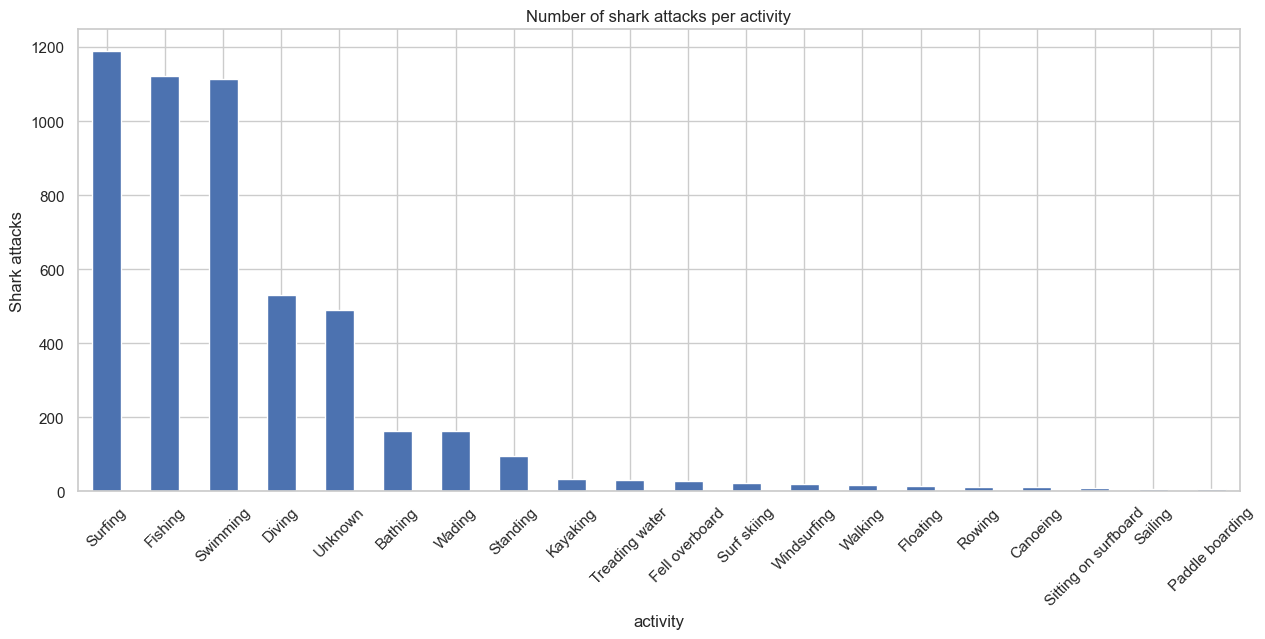

In [872]:
# let's get use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfcountries['activity'].value_counts().head(20).plot(kind="bar", title="Number of shark attacks per activity") # we are only interested in the 20 most common activities
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

In [873]:
dfcountries[dfcountries['activity']=='Wading'].shape

(162, 17)

In [874]:
dfcountries.activity.nunique()

784

In [875]:
# let's group 'Wading' and 'Walking'
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Walking"), 'Wading', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"wading"), 'Wading', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Wading'].shape

(193, 17)

In [876]:
dfcountries.activity.nunique()

775

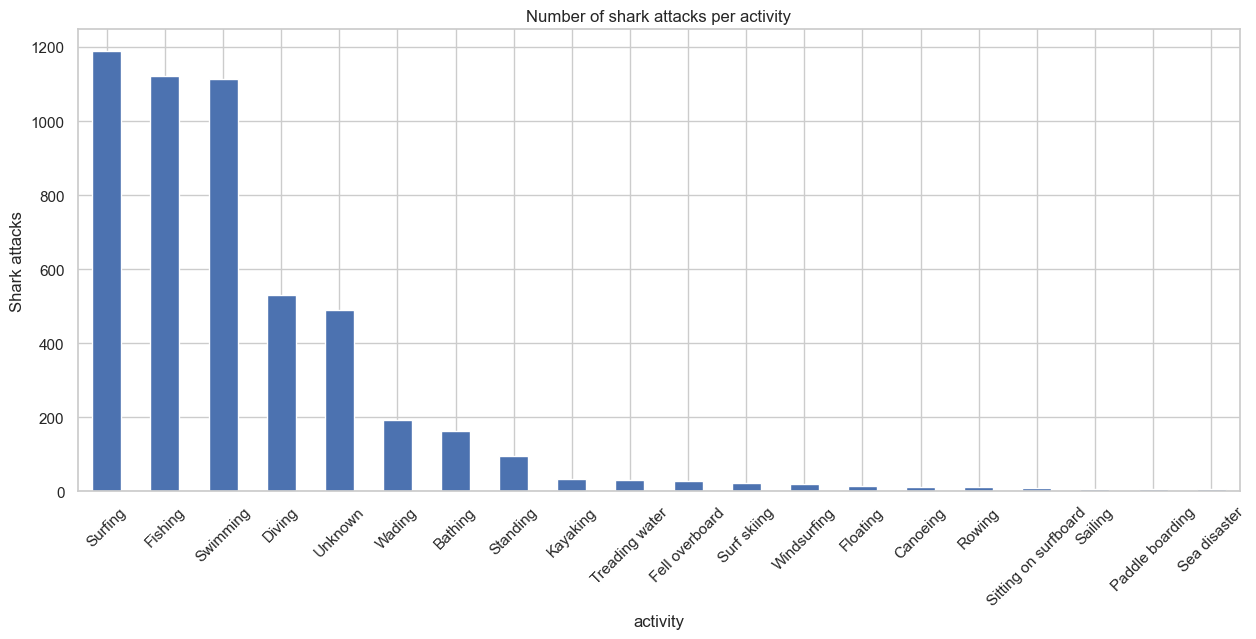

In [877]:
# let's get use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfcountries['activity'].value_counts().head(20).plot(kind="bar", title="Number of shark attacks per activity") # we are only interested in the 20 most common activities
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

In [878]:
# 'Bathing' and 'Swimming' look very similar, let's group them
dfcountries[dfcountries['activity']=='Swimming'].shape

(1113, 17)

In [879]:
dfcountries[dfcountries['activity']=='Bathing'].shape

(163, 17)

In [880]:
# let's apply Regex with 'Swimming'
df_swimminggregex = dfcountries[dfcountries['activity'].str.contains(r"swimming")] # I apply regex to select the rows where 'activity' contains 'swimming'

In [881]:
# yes, we can group these cases with 'Swimming'
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Bathing"), 'Swimming', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"bathing"), 'Swimming', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"swimming"), 'Swimming', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Swimming'].shape

(1308, 17)

In [882]:
dfcountries.activity.nunique()

747

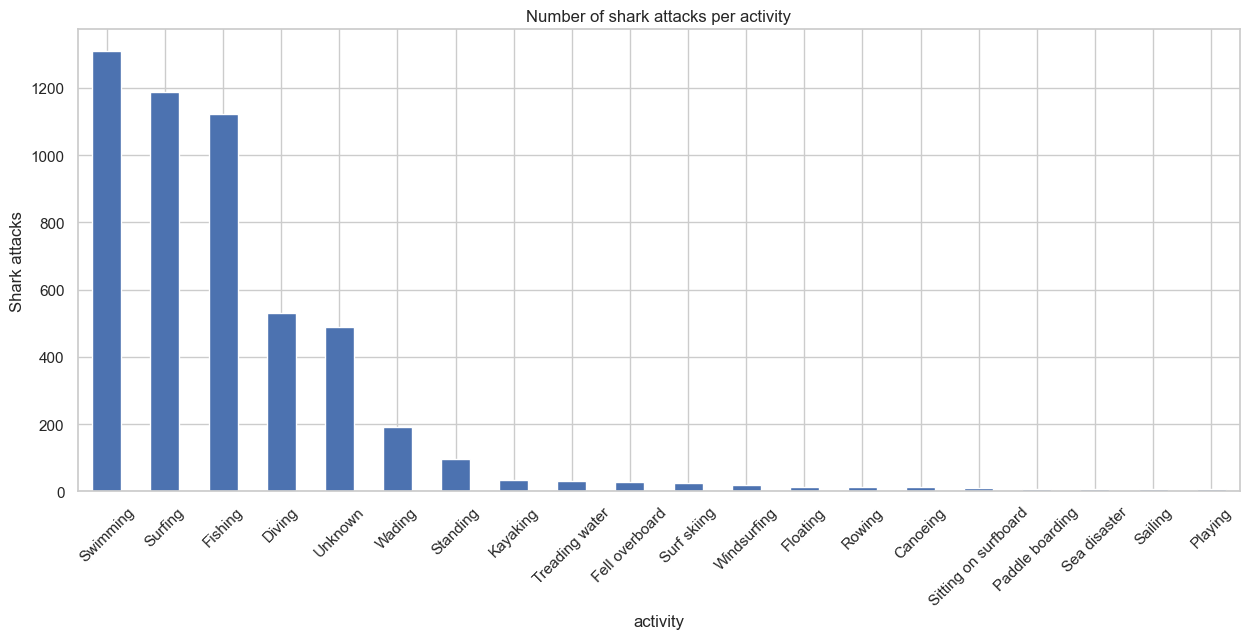

In [883]:
# let's get use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfcountries['activity'].value_counts().head(20).plot(kind="bar", title="Number of shark attacks per activity") # we are only interested in the 20 most common activities
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

In [884]:
dfcountries[dfcountries['activity']=='Swimming'].shape

(1308, 17)

In [885]:
# let's group as well 'Treading water' with 'Swimming'
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Treading water"), 'Swimming', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"treading water"), 'Swimming', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Swimming'].shape

(1344, 17)

In [886]:
dfcountries.activity.value_counts().head(20)

activity
Swimming                1344
Surfing                 1188
Fishing                 1121
Diving                   530
Unknown                  489
Wading                   193
Standing                  96
Kayaking                  33
Fell overboard            27
Surf skiing               24
Windsurfing               19
Floating                  14
Canoeing                  12
Rowing                    12
Sitting on surfboard       9
Sea disaster               8
Paddle boarding            8
Sailing                    8
Playing                    7
Surf skiing                7
Name: count, dtype: int64

In [887]:
dfcountries[dfcountries['activity']=='Surfing'].shape

(1188, 17)

In [888]:
# let's group as well more cases with 'Surfing'
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Sitting on surfboard"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Surfng"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape

(1198, 17)

In [889]:
dfcountries.activity.nunique() # there are more than a 100 rows converted to 'Swimming' (1333-1193)

740

In [890]:
# too many activities, 740, let's group some more
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
activity_list # I see it better

[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '.',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '2 messboys (Jepps

In [891]:
dfcountries[dfcountries['activity']=='Surf skiing'].shape

(24, 17)

In [892]:
# let's group 'Surf skiing'
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Surf skiing "), 'Surf skiing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surf skiing'].shape

(31, 17)

In [893]:
# let's group 'Sea Disaster'
dfcountries[dfcountries['activity']=='Sea Disaster'].shape

(6, 17)

In [894]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Sea Disaster"), 'Sea Disaster', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Sea disaster"), 'Sea Disaster', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Sea Disaster'].shape

(27, 17)

In [895]:
dfcountries.activity.nunique()

725

In [896]:
# too many activities, 725, let's group some more
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
activity_list # I see it better

[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '.',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '2 messboys (Jepps

In [897]:
# let's group more cases with 'Surfing'
dfcountries[dfcountries['activity']=='Surfing'].shape

(1198, 17)

In [898]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Windsurfing"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Wind surfing"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape

(1220, 17)

In [899]:
dfcountries.activity.nunique()

721

In [900]:
# let's group more cases with 'Shipwreck'
dfcountries[dfcountries['activity']=='Shipwreck'].shape

(5, 17)

In [901]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Shipwreck"), 'Shipwreck', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Sinking"), 'Shipwreck', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"wreck"), 'Shipwreck', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Wreck"), 'Shipwreck', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Shipwreck'].shape

(38, 17)

In [902]:
dfcountries.activity.nunique()

690

In [903]:
# too many activities, 690, let's group some more
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
activity_list # I see it better

[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '.',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '2 messboys (Jeppsen) & Tony Latona (13) were playing on the afterdeck of the Danish ship Grete Maersk. Jeppsen fell overboard, Latona threw a lifebelt then jumped in to help him. Ship didn’t notice they were missing',
 '25-foot cabin cruiser Happy Jack sank in heavy seas',
 '3 men & 2 boys picked up wearing life jackets and with inner tube',
 '3,909-ton Panamanian freighter Chieh Lee sank in 

In [904]:
# let's group 'Surfing'
dfcountries[dfcountries['activity']=='Surfing'].shape

(1220, 17)

In [905]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Surf paddling"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape


(1221, 17)

In [906]:
# let's group 'Adrift'
dfcountries[dfcountries['activity']=='Adrift'].shape

(0, 17)

In [907]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Adrift"), 'Adrift', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"adrift"), 'Adrift', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Adrift'].shape

(16, 17)

In [908]:
# let's group 'Air disaster'
dfcountries[dfcountries['activity']=='Air disaster'].shape

(2, 17)

In [909]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Air disaster"), 'Air disaster', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Air Disaster"), 'Air disaster', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Air disaster'].shape

(7, 17)

In [910]:
dfcountries[dfcountries['activity']=='Air disaster']

date  year          type   info_country        country  \
3744    2009.02.08  2009  Sea Disaster            Usa            Usa   
3887  2004.01.03.a  2004  Sea Disaster          Egypt          Egypt   
3959    2000.05.13  2000  Sea Disaster  New Caledonia  New Caledonia   
4422    1970.01.16  1970  Sea Disaster          Egypt          Egypt   
4639    1960.08.29  1960  Sea Disaster        Senegal        Senegal   
4860    1952.12.14  1952       Invalid          Other      Guatemala   
5240    1930.05.11  1930       Invalid     Costa Rica     Costa Rica   

                    area                        location      activity  \
3744         Puerto Rico                    Quebradillas  Air disaster   
3887     Sinai Peninsula             Off Sharm El-Sheikh  Air disaster   
3959      South Province                       Mont Dore  Air disaster   
4422             Red Sea  A few miles south of Port Suez  Air disaster   
4639  Cap-Vert Peninsula                       off Dakar  Air disaster   
4860                 NaN                             NaN  Air disaster   
5240      Limón Province                 Off Porto Limon  Air disaster   

                                                   name      sex    age  \
3744                           occupant of a Cessna 206        M  27.38   
3887                           135 passengers & 13 crew  Unknown  27.38   
3959                                           3 people  Unknown  27.38   
4422                           pilot of Israeli skyhawk        M  27.38   
4639                                                NaN  Unknown  27.38   
4860  Soledad Castellanos     - or -       Norma Fig...        F  27.38   
5240                                                NaN  Unknown  27.38   

     info_age                                             injury fatal   time  \
3744      NaN  It is probable that all 5 passengers died on i...     Y    NaN   
3887      NaN          No survivors, sharks scavenged on remains     Y  03h00   
3959      NaN               Sharks prevented recovery of remains     Y    NaN   
4422      NaN                                              FATAL     Y    NaN   
4639      NaN  All 63 on board perished when the aircraft hit...     Y    NaN   
4860      NaN  It is probable that all onboard (2 men & 2 wom...   NaN    NaN   
5240      NaN  Shark involvement prior to death was not confi...   NaN    NaN   

                                                species  \
3744                                                NaN   
3887                                                NaN   
3959      Tiger sharks & bull sharks (20 sharks in all)   
4422                                                NaN   
4639                                                NaN   
4860  Shark involvement prior to death was not confi...   
5240       Shark involvement prior to death unconfirmed   

                                 investigator or source  
3744                                 C. Ekstander, GSAF  
3887                                 Scotsman, 1/4/2004  
3959  W. Leander; Les Nouvelles Caledoniennes, 5/15/...  
4422                            The Progress, 1/17/1970  
4639       The Daily Telegram (Colombus, 8/30/1960, p.3  
4860     The Frederick Post (Maryland), 12/17/1952, p.1  
5240                     Evening Independent, 5/12/1930

In [911]:
dfcountries.activity.value_counts().head(20)

activity
Swimming               1344
Surfing                1221
Fishing                1121
Diving                  530
Unknown                 489
Wading                  193
Standing                 96
Shipwreck                38
Kayaking                 33
Surf skiing              31
Sea Disaster             27
Fell overboard           27
Adrift                   16
Floating                 14
Rowing                   12
Canoeing                 12
Paddle boarding           8
Sailing                   8
Fell into the water       7
Playing                   7
Name: count, dtype: int64

In [912]:
dfcountries.activity.nunique()

671

In [913]:
dfcountries['activity'] = dfcountries['activity'].str.strip() # I should have done this at the very beginning

In [914]:
dfcountries.activity.nunique()

660

In [915]:
dfcountries['activity'] = dfcountries['activity'].str.strip(".-/\'")

In [916]:
dfcountries.activity.nunique()

659

In [917]:
# too many activities, 659, let's group some more
activity_valuecounts = dfcountries.activity.unique() # to get all the activities
activity_list = list(activity_valuecounts) # store them in a list
activity_list.sort() # sort the list alphabetically
activity_list # I see it better

['',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 '2 boats capsized',
 '2 messboys (Jeppsen) & Tony Latona (13) were playing on the afterdeck of the Danish ship Grete Maersk. Jeppsen fell overboard, Latona threw a lifebelt then jumped in to help him. Ship didn’t notice they were missing',
 '25-foot cabin cruiser Happy Jack sank in heavy seas',
 '3 men & 2 boys picked up wearing life jackets and with inner tube',
 '3,909-ton Panamanian freighter Chieh Lee sank in a typhoon',
 '3-masted steel barque Glenbank foundered during a cyclone',
 '43-ton schooner Irene capsized & sank',
 '90 European civilians, man

In [918]:
dfcountries.activity.value_counts().tail(30)

activity
Fell overboard from the Malacca                                                       1
2 boats capsized                                                                      1
Photo shoot                                                                           1
Bodysurfing                                                                           1
Reported swept away by waves while gathering opihi                                    1
Petting a shark                                                                       1
Filming a documentary                                                                 1
Wrangling a shark                                                                     1
Attempting to free the shark                                                          1
Standing, collecting sea stars                                                        1
Kayaking or Wave skiing                                                               1
Washing horses         

In [919]:
# let's group 'fell...'
dfcountries[dfcountries['activity'].str.contains('fell')].shape

(12, 17)

In [920]:
dfcountries[dfcountries['activity'].str.contains('fell')]

date  year        type        info_country             country  \
2091    1984.11.30  1984  Unprovoked           Australia           Australia   
2727    1961.09.23  1961  Unprovoked  Mid Atlantic Ocean  Mid Atlantic Ocean   
2746    1961.04.14  1961  Unprovoked           Australia           Australia   
3052  1948.12.14.a  1948  Unprovoked                Cuba                Cuba   
3145  1941.00.00.c  1941  Unprovoked                Iran                Iran   
3291    1924.11.24  1924  Unprovoked              Panama              Panama   
4260    1982.06.13  1982  Unprovoked                 Usa                 Usa   
4969  1945.00.00.c  1945  Unprovoked                Cuba                Cuba   
5536    1907.10.12  1907     Invalid               Other               Haiti   
5574    1905.07.02  1905  Unprovoked           Indonesia           Indonesia   
5581    1904.09.00  1904  Unprovoked                Cuba                Cuba   
5766    1888.12.00  1888  Unprovoked           Australia           Australia   

                                                   area  \
2091                                         Queensland   
2727                            165  miles from Bermuda   
2746                                    New South Wales   
3052                                Guantanamo Province   
3145                                 Khuzestan Province   
3291  2 to 3 miles off Taboguilla Island, Pacific Ocean   
4260                                             Hawaii   
4969                                    Havana Province   
5536                                  Tiburon Peninsula   
5574                                      Nusa Tenggara   
5581                                    Havana Province   
5766                                    New South Wales   

                                          location  \
2091                        1 km off Black's Beach   
2727                                           NaN   
2746  10 miles off Nambucca Heads  onboard trawler   
3052                       10 miles off Cape Maisi   
3145                     Ahvaz, on the Karun River   
3291        Pacific Anchorage off the Panama Canal   
4260                   Ho'okipa Beach, Pa'ia, Maui   
4969                                       Cojimar   
5536                     Aux Cayes (now Les Cayes)   
5574                              Off Rakit Island   
5581                                 Havana Harbor   
5766                     Hawkesbury Bridge, Sydney   

                                               activity  \
2091         Sailing on catamaran & fell into the water   
2727  Survived US Naval aircraft crash, climbing onb...   
2746           Checking fish traps, fell into the water   
3052  2 messboys (Jeppsen) & Tony Latona (13) were p...   
3145          Slipped off rocks and fell into the water   
3291  Inebriated, woke from sleep and fell off deck ...   
4260  Sailboarding, fell into water 100 yards outsid...   
4969     Playing on rock, slipped & fell into the water   
5536   Reached out to disentangle rope & fell overboard   
5574                           Jumped or fell overboard   
5581                  Lost his footing & fell overboard   
5766  Working on the bridge when he fell into the river   

                                                   name sex    age info_age  \
2091                                       Nicholas Bos   M  16.00       16   
2727                                      Patrick Imhof   M  22.00       22   
2746                                        Keith Davis   M  40.00       40   
3052                                       Bret Jeppsen   M  14.00       14   
3145                                                boy   M   6.00        6   
3291                                               male   M  35.00       35   
4260                                    Scott Shoemaker   M  27.38      NaN   
4969                                                boy   M  27.38      NaN   
5536  William Thomas, a

In [921]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"fell"), 'Fell Overboard', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Fell Overboard'].shape

(12, 17)

In [922]:
# the same with the uppercases 'Fell...'
dfcountries[dfcountries['activity'].str.contains('Fell')].shape

(75, 17)

In [923]:
dfcountries[dfcountries['activity'].str.contains('Fell')]

date  year        type        info_country             country  \
403    2014.05.27.R  2014  Unprovoked           Australia           Australia   
1447     2001.08.12  2001  Unprovoked            Thailand            Thailand   
1505     2000.09.18  2000    Provoked           Australia           Australia   
2091     1984.11.30  1984  Unprovoked           Australia           Australia   
2727     1961.09.23  1961  Unprovoked  Mid Atlantic Ocean  Mid Atlantic Ocean   
...             ...   ...         ...                 ...                 ...   
5969  1863.00.00.R2  1863  Unprovoked               Other              Ceylon   
6003     1855.03.28  1855  Unprovoked           Australia           Australia   
6010   1853.00.00.d  1853  Unprovoked           Australia           Australia   
6016   1852.10.09.R  1852  Unprovoked           Australia           Australia   
6017     1852.08.07  1852  Unprovoked               Tonga               Tonga   

                         area                          location  \
403                Queensland  Nerang River near Chevron Island   
1447          Rayong Province                Laem Mae Pim Beach   
1505          New South Wales                        Wollongong   
2091               Queensland            1 km off Black's Beach   
2727  165  miles from Bermuda                               NaN   
...                       ...                               ...   
5969                      NaN                               NaN   
6003          South Australia                    Port Wakefield   
6010               Queensland                       Moreton Bay   
6016          New South Wales                         Coalcliff   
6017                Tongatapu                               NaN   

                             activity  \
403               Fell into the water   
1447             Fell off banana boat   
1505             Fell onto dead shark   
2091                   Fell Overboard   
2727                   Fell Overboard   
...                               ...   
5969                   Fell overboard   
6003  Fell overboard from the Sobella   
6010              Fell into the water   
6016                   Fell overboard   
6017                   Fell overboard   

                                         name sex    age info_age  \
403                            Bianca Freeman   F  29.00       29   
1447                     O. Jaimaung & friend   M  27.00   21 & ?   
1505                                      boy   M  12.00       12   
2091                             Nicholas Bos   M  16.00       16   
2727                            Patrick Imhof   M  22.00       22   
...                                       ...  ..    ...      ...   
5969  male, carpenter from the ship Fair Hope   M  27.38      NaN   
6003                           Master Coleman   M  27.38      NaN   
6010                      James Hexton, pilot   M  27.38      NaN   
6016                             James Rogers   M  27.38      NaN   
6017                         Charles Weymouth   M  27.38      NaN   

                                                 injury fatal   time  \
403                                 Lacerations to legs     N    NaN   
1447                                        Legs bitten     N    NaN   
1505  Foot lacerated from toe to heel when he trippe...     N    NaN   
2091                                              FATAL     Y  12h33   
2727             Right shoulder blade  & back lacerated     N  06h00   
...                                                 ...   ...    ...   
5969                                              FATAL     Y    NaN   
6003                                              FATAL     Y    NaN   
6010                                              FATAL     Y    NaN   
6016                                              FATAL     Y    NaN   
6017                                              FATAL     Y    NaN   

                                                sp

In [924]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Fell"), 'Fell Overboard', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Fell Overboard'].shape

(75, 17)

In [925]:
dfcountries.activity.nunique()

618

In [926]:
dfcountries.activity.value_counts().tail(30)

activity
Kayaking or Wave skiing                                                               1
Standing, collecting sea stars                                                        1
Attempting to free the shark                                                          1
Wrangling a shark                                                                     1
Filming a documentary                                                                 1
Petting a shark                                                                       1
Bodysurfing                                                                           1
Grabbing shark for a selfie                                                           1
Photo shoot                                                                           1
2 boats capsized                                                                      1
Floating, holding onto an oar after dory capsized                                     1
"Crossing the river"   

In [927]:
# let's group 'Kayaking'
dfcountries[dfcountries['activity']=='Kayaking'].shape

(35, 17)

In [928]:
# let's group 'Kayaking'
dfcountries[dfcountries['activity'].str.contains('Kayaking')].shape

(36, 17)

In [929]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Kayaking"), 'Kayaking', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Kayaking'].shape

(36, 17)

In [930]:
dfcountries.activity.value_counts().tail(30)

activity
Standing, collecting sea stars                                                        1
Attempting to free the shark                                                          1
Wrangling a shark                                                                     1
Filming a documentary                                                                 1
Petting a shark                                                                       1
Bodysurfing                                                                           1
Grabbing shark for a selfie                                                           1
Photo shoot                                                                           1
2 boats capsized                                                                      1
Floating, holding onto an oar after dory capsized                                     1
"Crossing the river"                                                                  1
Washing horses         

In [931]:
# let's group 'Surfing'
dfcountries[dfcountries['activity']=='Surfing'].shape

(1221, 17)

In [932]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"surfing"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"surf"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape

(1256, 17)

In [933]:
dfcountries.activity.nunique()

592

In [934]:
dfcountries.activity.value_counts().tail(30)

activity
Wrangling a shark                                                                     1
Killing  sharks                                                                       1
Attempting to drive shark away from sailing regatta                                   1
Crouching in 2' of water                                                              1
Touching sharks                                                                       1
Shrimping                                                                             1
Removing hook from shark                                                              1
The 426-ton cargo ship Mia, laden with cement, capsized in heavy seas                 1
Attempting to chase shark out to sea                                                  1
Yacht race                                                                            1
Washing his feet                                                                      1
Standing, holding shark

In [935]:
# let's group 'Floating'
dfcountries[dfcountries['activity'].str.contains('Floating')].shape

(44, 17)

In [936]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Floating"), 'Floating', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"floating"), 'Floating', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Floating'].shape

(45, 17)

In [937]:
dfcountries.activity.nunique()

571

In [938]:
dfcountries.activity.value_counts().tail(20)

activity
Crouching in 2' of water                                                 1
Touching sharks                                                          1
Shrimping                                                                1
Removing hook from shark                                                 1
The 426-ton cargo ship Mia, laden with cement, capsized in heavy seas    1
Attempting to chase shark out to sea                                     1
Yacht race                                                               1
Washing his feet                                                         1
Standing, holding shark pup                                              1
Standing, collecting sea stars                                           1
Attempting to free the shark                                             1
Wrangling a shark                                                        1
Filming a documentary                                                    1
Petting a shark 

In [939]:
dfcountries[dfcountries['activity']==('Washing')].shape

(2, 17)

In [940]:
# let's group
dfcountries[dfcountries['activity'].str.contains('Washing')].shape

(9, 17)

In [941]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Washing"), 'Washing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Washing'].shape

(9, 17)

In [942]:
dfcountries.activity.nunique()

564

In [943]:
dfcountries[dfcountries['activity']==('Standing')].shape

(98, 17)

In [944]:
# let's group
dfcountries[dfcountries['activity'].str.contains('Standing')].shape

(118, 17)

In [945]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Standing"), 'Standing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"standing"), 'Standing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Standing'].shape

(123, 17)

In [946]:
dfcountries.activity.nunique()

542

In [947]:
dfcountries.activity.value_counts().tail(20)

activity
Paddle Skiing                                                            1
Scientific research (Dr. Sonny Gruber's student)                         1
Canoe with 3 men onboard sank                                            1
Feeding prawns to captive sharks                                         1
Conducting research                                                      1
Kite-Boarding                                                            1
Attempting to retreive a dinghy                                          1
Petting captive sharks                                                   1
Killing  sharks                                                          1
Attempting to drive shark away from sailing regatta                      1
Crouching in 2' of water                                                 1
Touching sharks                                                          1
Shrimping                                                                1
Removing hook fr

In [948]:
# let's group
dfcountries[dfcountries['activity'].str.contains('boarding')].shape

(26, 17)

In [949]:
# let's group
dfcountries[dfcountries['activity'].str.contains('Boarding')].shape

(8, 17)

In [950]:
dfcountries[dfcountries['activity'].str.contains('Boarding')]

date  year        type   info_country        country  \
297   2015.06.27.a  2015  Unprovoked   South Africa   South Africa   
692   2011.05.21.a  2011  Unprovoked  New Caledonia  New Caledonia   
783     2010.02.03  2010  Unprovoked            Usa            Usa   
1635    1998.06.22  1998  Unprovoked   South Africa   South Africa   
1711    1996.08.29  1996  Unprovoked            Usa            Usa   
2160  1982.07.24.a  1982  Unprovoked            Usa            Usa   
3921    2001.10.07  2001  Unprovoked   South Africa   South Africa   
5949    1865.00.00  1865     Boating      Australia      Australia   

                       area                                 location  \
297   Western Cape Province                  Buffels Bay near Knysna   
692          North Province                                   Kendec   
783                 Florida                    Stuart, Martin County   
1635  Eastern Cape Province  Gonubie, 13 km northeast of East London   
1711                 Hawaii                          Paukukalo, Maui   
2160             California     Point Buchon, San Luis Obispo County   
3921          KwaZulu-Natal                               Salt Rock    
5949        South Australia                                Semaphore   

             activity                                               name  \
297     Body Boarding                                    Caleb Swanepoel   
692     Kite Boarding                                        Nathan ____   
783     Kite Boarding                             Stephen Howard Schafer   
1635    Body Boarding                                        Anton deVos   
1711    Body Boarding                                   David Nanod, Jr.   
2160  Paddle Boarding                                    Casimir Pulaski   
3921    Kite-Boarding                                    Alwin van Breda   
5949  Boarding a ship  R.H. Barrett, pilot holding steering oar of wh...   

          sex    age info_age  \
297         M  19.00       19   
692         M  15.00       15   
783         M  38.00       38   
1635        M  20.00       20   
1711        M  19.00       19   
2160        M  26.00       26   
3921        M  27.38      NaN   
5949  Unknown  27.38      NaN   

                                                 injury fatal   time  \
297   Right leg severed, multiple lacerations to lef...     N  14h40   
692                                 Thigh bitten, FATAL     Y  11h00   
783                                               FATAL     Y  15h44   
1635                       FATAL, hands & calf bitten       Y  09h55   
1711                                  Right calf bitten     N  16h00   
2160                            No Injury, board bitten     N  11h00   
3921                                          No injury     N    NaN   
5949                     No injury to pilot, oar bitten     N    NaN   

                                        species  \
297                                 White shark   
692                           Tiger shark, 2.8m   
783                                         NaN   
1635                                White shark   
1711                   Tiger shark, 2.4 m [8']    
2160  4.5 m to 5.5 m [14.7' to 18'] white shark   
3921                   Mako shark, 2 m [6.75']    
5949                                        NaN   

                                 investigator or source  
297                                      NSRI, 6/27/205  
692   Radio New Zealand & Les Nouvelles Caledonienne...  
783                                   TC Palm, 2/3/2010  
1635                                   A. Gifford, GSAF  
1711                                       Allen, p.117  
2160  R.N. Lea & D. Miller; R. Collier, pp.86-87; G....  
3921                                                NSB  
5949                       V.M. Coppleson (1958), p.186

In [951]:
dfcountries[dfcountries['activity']==('Surfing')].shape

(1256, 17)

In [952]:
# let's apply regex to change it
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Boarding"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"boarding"), 'Surfing', dfcountries['activity'])
dfcountries['activity'] = np.where(dfcountries['activity'].str.contains(r"Surf"), 'Surfing', dfcountries['activity'])
dfcountries[dfcountries['activity']=='Surfing'].shape

(1321, 17)

In [953]:
dfcountries.activity.value_counts().head(15)

activity
Swimming          1344
Surfing           1321
Fishing           1121
Diving             530
Unknown            489
Wading             193
Standing           123
Fell Overboard      75
Floating            45
Shipwreck           38
Kayaking            36
Sea Disaster        27
Adrift              16
Rowing              14
Canoeing            12
Name: count, dtype: int64

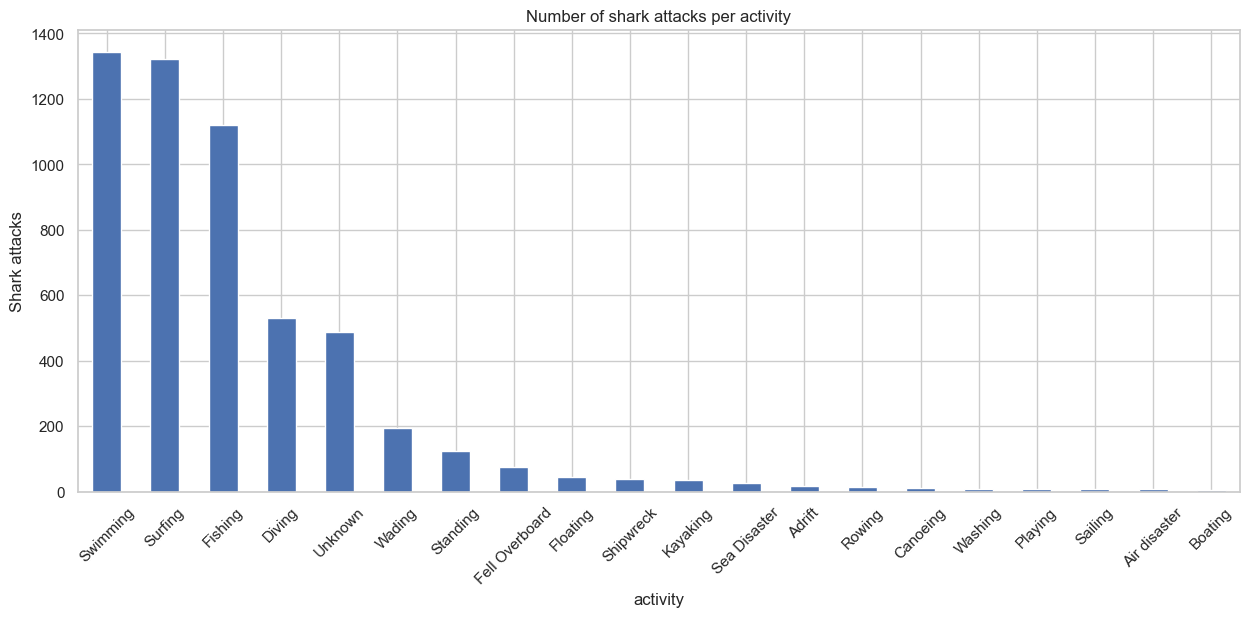

In [954]:
# let's get use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfcountries['activity'].value_counts().head(20).plot(kind="bar", title="Number of shark attacks per activity") # we are only interested in the 20 most common activities
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

In [955]:
dfotheractivities = dfcountries.copy()

In [956]:
other_activities = list(dfotheractivities['activity'].value_counts().head(8).index) # let's take only the most common activities
all_activities = list(dfotheractivities['activity'].value_counts().index)
dfotheractivities['activity'] = dfotheractivities['activity'].apply(lambda x: 'Other' if x not in other_activities else x)
dfotheractivities['activity'].value_counts()

activity
Swimming          1344
Surfing           1321
Fishing           1121
Other              832
Diving             530
Unknown            489
Wading             193
Standing           123
Fell Overboard      75
Name: count, dtype: int64

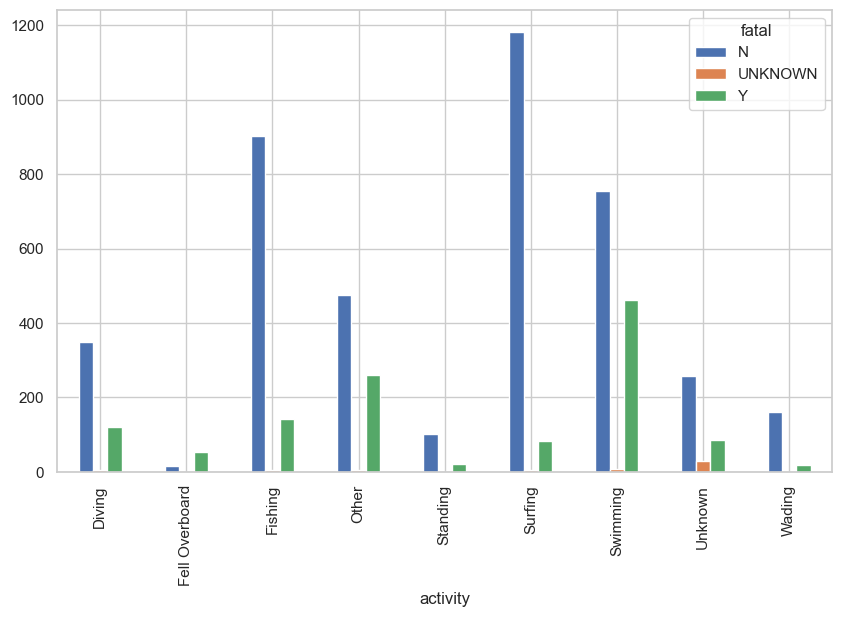

In [957]:
pd.crosstab(dfotheractivities['activity'], dfotheractivities.fatal).plot(kind="bar", figsize=(10, 6)); # fatality per activity

In [958]:
# there's a higher ratio of fatality amongst people who were swimming or diving, compared to the ones who were surfing or fishing

In [959]:
dfcountries.activity.nunique()

527

In [960]:
dfotheractivities.activity.nunique()

9

In [961]:
dfotheractivities['info_country'].nunique()

78

In [962]:
dfcountries20 = dfotheractivities.copy()
country_namestop = list(dfcountries20['country'].value_counts().head(20).index) # the top 20 countries with the highest number of attacks
country_namesall = list(dfcountries20['country'].value_counts().index) # all the countries
dfcountries20['info_country'] = dfcountries20['country'].apply(lambda x: 'Other' if x not in country_namestop else x) # the function where I substitute the least frequent countries with 'Other'
dfcountries20['info_country'].nunique()

21

In [963]:
dfcountries20.activity.nunique()

9

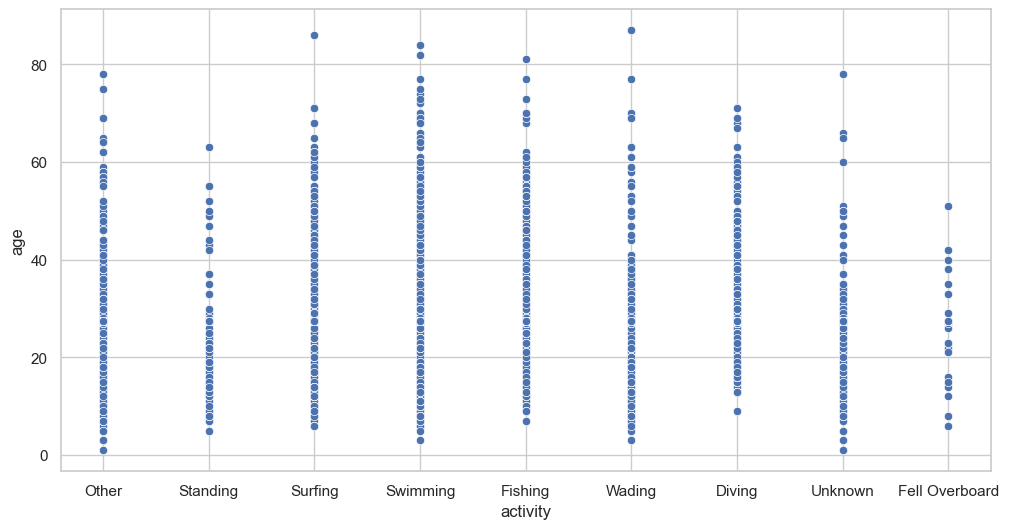

In [964]:
sns.scatterplot(data=dfotheractivities, x="activity", y="age");

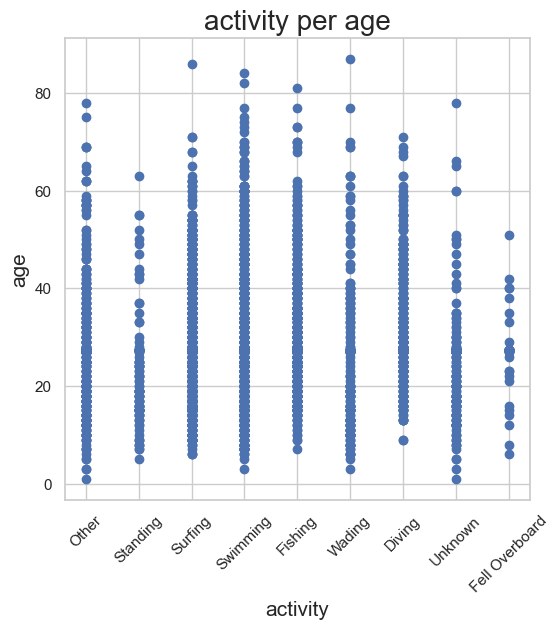

In [965]:
plt.figure(figsize=(6, 6)) # I want to see it bigger
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.scatter(x=dfotheractivities["activity"], y=dfotheractivities["age"])
plt.xlabel("activity", fontsize=15)
plt.ylabel("age", fontsize=15)
plt.title("activity per age", fontsize = 20);

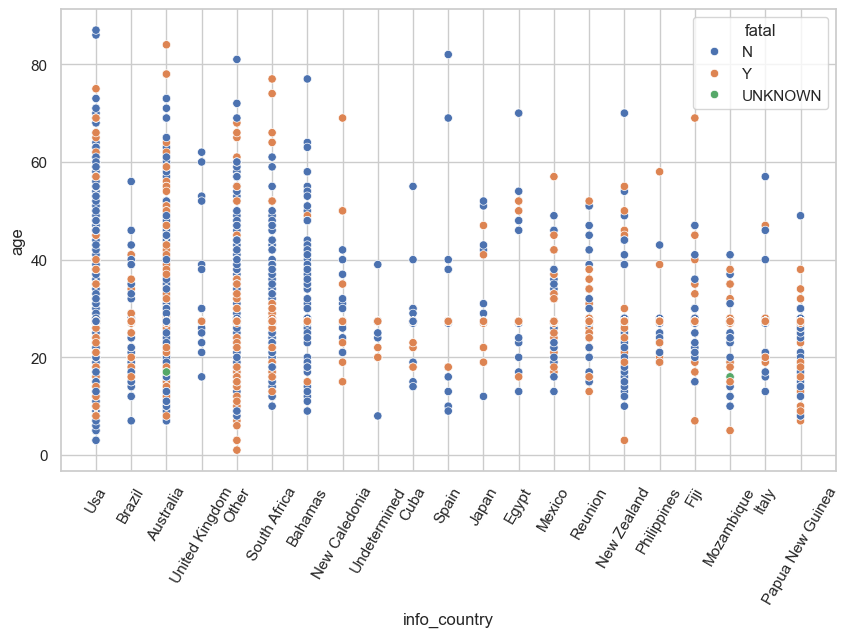

In [966]:
plt.figure(figsize=(10,6)) # I want to see it bigger
sns.scatterplot(x="info_country", y="age", hue="fatal",data=dfcountries20)
plt.xticks(rotation=60) # we tilt the names of the countries so we can see them
plt.show()

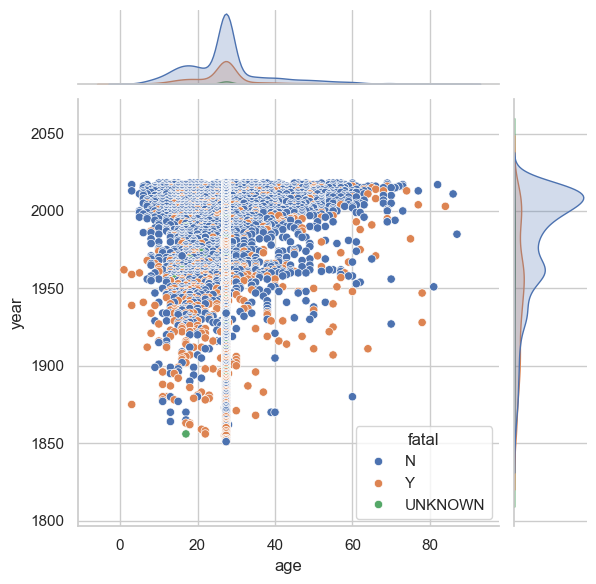

In [967]:
sns.jointplot(data=dfcountries20, x= "age", y= "year", hue="fatal");

In [968]:
dfcountries20.sample(5)

date  year        type  info_country       country  \
1926  1990.10.30.b  1990  Unprovoked           Usa           Usa   
2142    1983.04.12  1983  Unprovoked  South Africa  South Africa   
390     2014.07.13  2014     Invalid       Bahamas       Bahamas   
3966    2000.03.09  2000     Boating     Australia     Australia   
3867    2004.08.20  2004  Unprovoked           Usa           Usa   

                       area                           location activity  \
1926                Florida    Melbourne Beach, Brevard County  Surfing   
2142  Eastern Cape Province                          Bonza Bay  Fishing   
390                West End                        Tiger Beach   Diving   
3966        New South Wales                   Parramatta River    Other   
3867             California  204s, San Clemente, Orange County  Surfing   

                      name      sex    age info_age  \
1926         Robert Spratt        M  50.00       50   
2142       Peter S. Venter        M  27.00       27   
390             John Petty        M  63.00       63   
3966  boat of Al Hattersly  Unknown  27.38      NaN   
3867        Shannon Lehman        M  27.38      NaN   

                                                 injury fatal   time  \
1926      Hand & wrist bitten, tooth fragments in wound     N  16h55   
2142                            Puncture wounds to foot     N  19h30   
390   Missing after a dive, shark involvement consid...   NaN  Night   
3966                 No injury to occupants; oar bitten     N    NaN   
3867                                        Foot bitten     N  17h30   

                                                species  \
1926                                  1.8 m [6'] shark    
2142  Raggedtooth shark, 1.5 m [5'] (tooth fragment ...   
390                     Shark involvement not confirmed   
3966                                                NaN   
3867              0.9 m to 1.2 m [3' to 4'] white shark   

                                 investigator or source  
1926  S. Jacobson, Orlando Sentinel, 11/1/1990, p. B...  
2142  R. Horn, East London Aquarium; Natal Witness, ...  
390                                  Outside, 7/14/2014  
3966                              Sydney Morning Herald  
3867                                   R. Collier, GSAF

In [969]:
dfotheractivities[(dfotheractivities['age']<40) & (dfotheractivities['activity'].str.contains('Surfing'))]

date  year        type  info_country       country  \
8       2018.05.21  2018  Unprovoked           Usa           Usa   
16      2018.04.19  2018  Unprovoked           Usa           Usa   
20    2018.04.15.a  2018  Unprovoked     Australia     Australia   
23      2018.04.03  2018  Unprovoked  South Africa  South Africa   
24      2018.03.31  2018  Unprovoked           Usa           Usa   
...            ...   ...         ...           ...           ...   
5104  1937.10.24.a  1937  Unprovoked     Australia     Australia   
5155    1935.03.11  1935  Unprovoked     Australia     Australia   
5299    1927.01.20  1927  Unprovoked  South Africa  South Africa   
5398    1918.03.22  1918  Unprovoked     Australia     Australia   
5949    1865.00.00  1865     Boating     Australia     Australia   

                       area                                location activity  \
8            South Carolina       Isle of Palms,  Charleston County  Surfing   
16                   Hawaii  Shipwreck’s Beach, Keoneloa Bay, Kauai  Surfing   
20        Western Australia       Cobblestones, Margaret River Area  Surfing   
23    Eastern Cape Province                         St. Francis Bay  Surfing   
24                   Hawaii                             Kukio Beach  Surfing   
...                     ...                                     ...      ...   
5104        New South Wales                              Byron Bay   Surfing   
5155        New South Wales                               Newcastle  Surfing   
5299  Eastern Cape Province                            Kidd’s Beach  Surfing   
5398        New South Wales                               Newcastle  Surfing   
5949        South Australia                               Semaphore  Surfing   

                                                   name      sex    age  \
8                                          Trey de Boer        M  10.00   
16                                     Dylan McWilliams        M  29.00   
20                                 Alejandro Travaglini        M  37.00   
23                                         Ross Spowart        M  19.00   
24                                                 male        M  25.00   
...                                                 ...      ...    ...   
5104                                       Glen Denning        M  27.38   
5155                                     Eric McMichael        M  27.38   
5299                                    Andrew I. Brown        M  27.38   
5398                                        Arthur Cook        M  27.38   
5949  R.H. Barrett, pilot holding steering oar of wh...  Unknown  27.38   

     info_age                                             injury fatal   time  \
8          10               Injuries to lower right leg and foot     N    NaN   
16         29                     Lacerations to right lower leg     N    NaN   
20         37                                Lacerations to legs     N  08h00   
23         19               Lacerations to left knee & lower leg     N  15h00   
24         25                       Injuries to right leg & hand     N  09h30   
...       ...                                                ...   ...    ...   
5104      NaN                          No injury, repulsed shark     N    NaN   
5155      NaN                                 Abrasions to shins     N    NaN   
5299      NaN                             Both thighs  lacerated     N  11h45   
5398      NaN  Severe laceration to arm, necessitating surgic...     N  18h00   
5949      NaN                     No injury to pilot, oar bitten     N    NaN   

                             species  \
8                                NaN   
16                          6' shark   
20                               NaN   
23                       White shark   
24                  Tiger shark, 12'   
...                              ...   
5104              2.6 m [8.5'] shark   
5155                             NaN   
52

In [970]:
dfcountries20.nunique()

date                      6010
year                       167
type                         8
info_country                21
country                    187
area                       783
location                  3975
activity                     9
name                      5067
sex                          3
age                         81
info_age                   156
injury                    3643
fatal                        3
time                       364
species                   1529
investigator or source    4761
dtype: int64

In [971]:
# dfcountries20 = dfcountries.copy()
# country_namestop = list(dfcountries20['country'].value_counts().head(20).index) # the top 20 countries with the highest number of attacks
# country_namesall = list(dfcountries20['country'].value_counts().index) # all the countries
# dfcountries20['info_country'] = dfcountries20['country'].apply(lambda x: 'Other' if x not in country_namestop else x) # the function where I substitute the least frequent countries with 'Other'
# dfcountries20['info_country'].value_counts()

In [972]:
dfcountries20['fatal'].value_counts(dropna=False) # let's check again the fatal value counts

fatal
N          4200
Y          1245
NaN         521
UNKNOWN      62
Name: count, dtype: int64

In [973]:
dfcountries20['fatal'].fillna('UNKNOWN', inplace=True)
dfcountries20['fatal'].value_counts(dropna=False) # let's check again the fatal value counts

fatal
N          4200
Y          1245
UNKNOWN     583
Name: count, dtype: int64

In [974]:
# let's group
dfcountries20[dfcountries20['fatal'].str.contains('UN')].shape

(583, 17)

In [975]:
# let's apply regex to change it
dfcountries20['fatal'] = np.where(dfcountries20['fatal'].str.contains(r"UN"), 'Unknown', dfcountries20['fatal'])
dfcountries20[dfcountries20['fatal']=='Unknown'].shape

(583, 17)

In [976]:
# let's apply regex to change it
dfcountries20['fatal'] = np.where(dfcountries20['fatal'].str.contains(r"N"), 'No', dfcountries20['fatal'])
dfcountries20['fatal'] = np.where(dfcountries20['fatal'].str.contains(r"Y"), 'Yes', dfcountries20['fatal'])
dfcountries20['fatal'].value_counts(dropna=False) # let's check again the fatal value counts

fatal
No         4200
Yes        1245
Unknown     583
Name: count, dtype: int64

In [977]:
dftopvalues = dfcountries20.copy()

In [978]:
dfagenonulls = dftopvalues.copy()
dfagenonulls.dropna(subset=['info_age'], inplace=True) # I delete the rows where info_age is null (2581 out of 6028)
dfagenonulls.shape

(3446, 17)

<Axes: xlabel='fatal', ylabel='Count'>

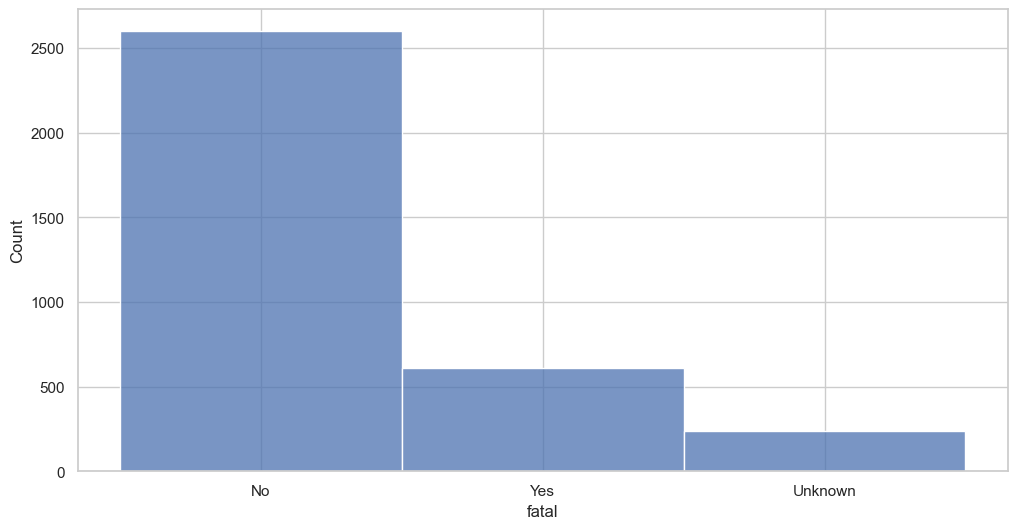

In [979]:
sns.histplot(data=dfagenonulls, x='fatal')

In [980]:
dftopvalues['type'].value_counts()

type
Unprovoked      4368
Provoked         564
Invalid          530
Sea Disaster     225
Boating          204
Boat             130
Questionable       2
Boatomg            1
Name: count, dtype: int64

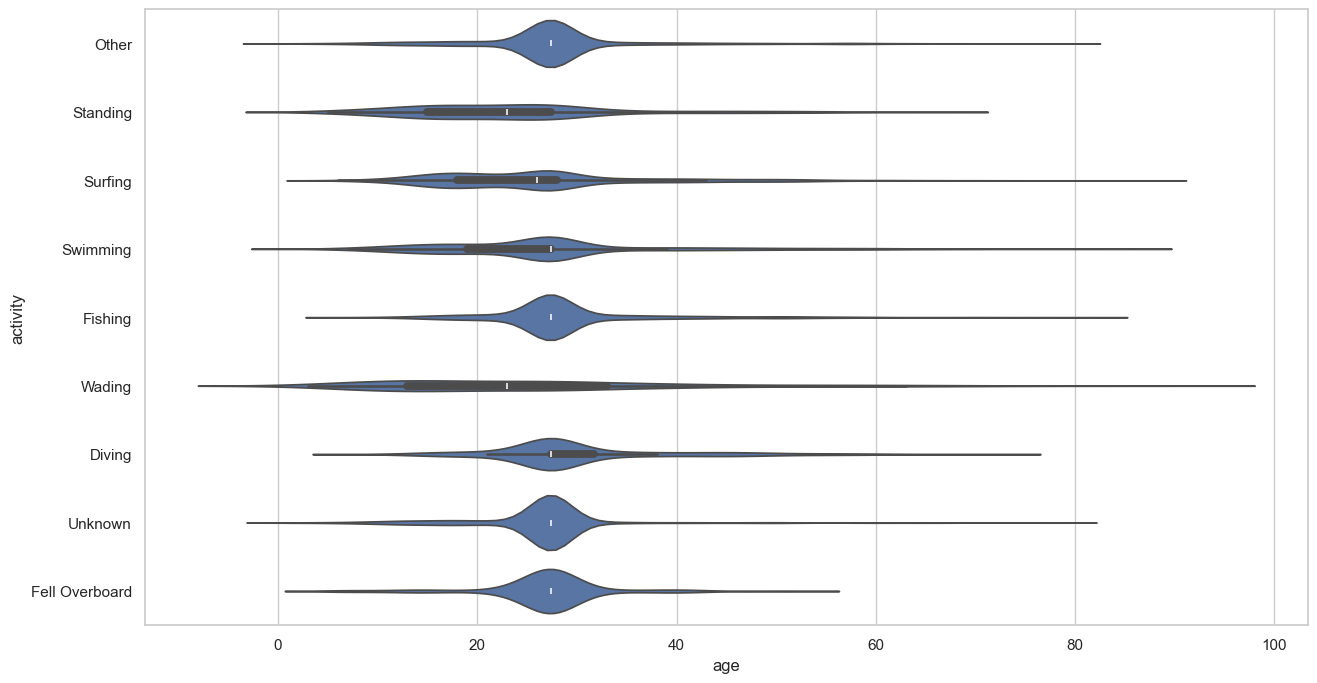

In [981]:
plt.figure(figsize=(15, 8)) # I want to see it bigger
sns.violinplot(x=dftopvalues.age, y=dftopvalues.activity);

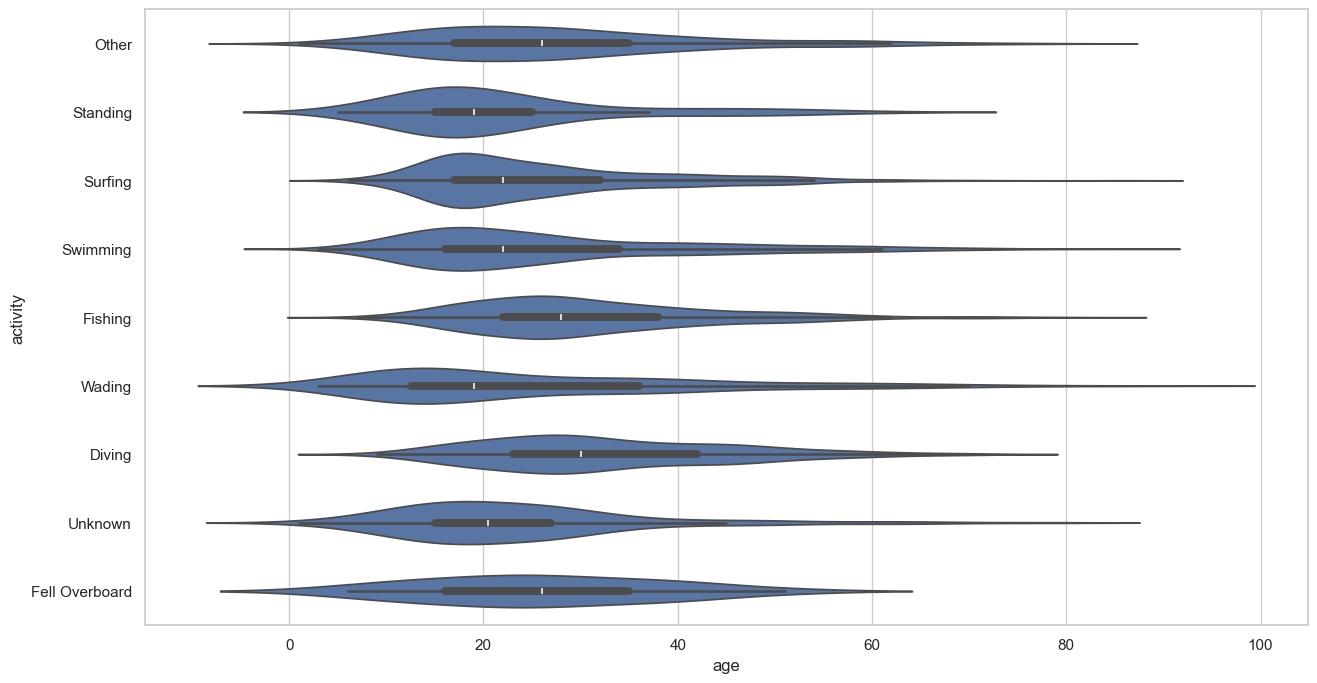

In [982]:
plt.figure(figsize=(15, 8)) # I want to see it bigger
sns.violinplot(x=dfagenonulls.age, y=dfagenonulls.activity);

In [983]:
dfagenonulls.shape

(3446, 17)

In [984]:
dftopvalues.shape

(6028, 17)

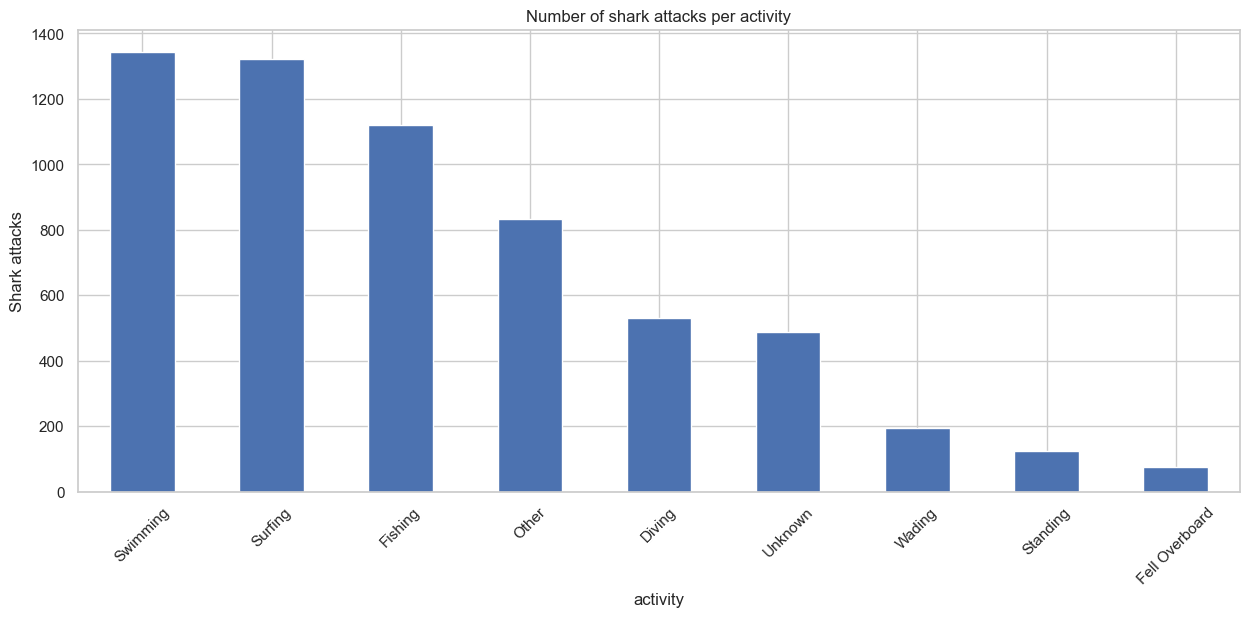

In [985]:
# let's get use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dftopvalues['activity'].value_counts().head(20).plot(kind="bar", title="Number of shark attacks per activity") # we are only interested in the 20 most common activities
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

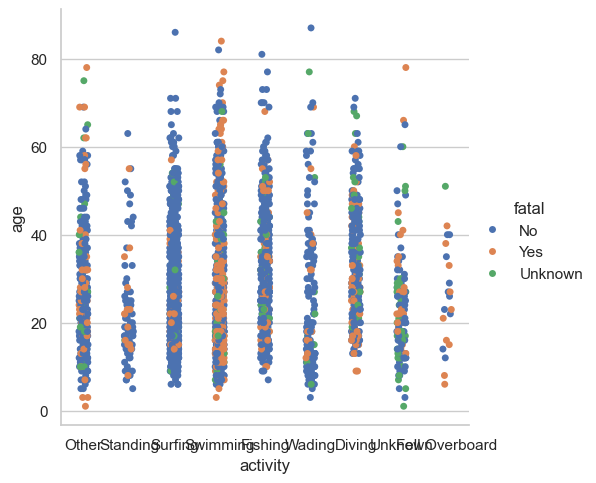

In [986]:
sns.catplot(data=dfagenonulls, x="activity", y="age", hue="fatal");

In [987]:
# sns.swarmplot(data=dfagenonulls, x="age", y="activity", hue="fatal");

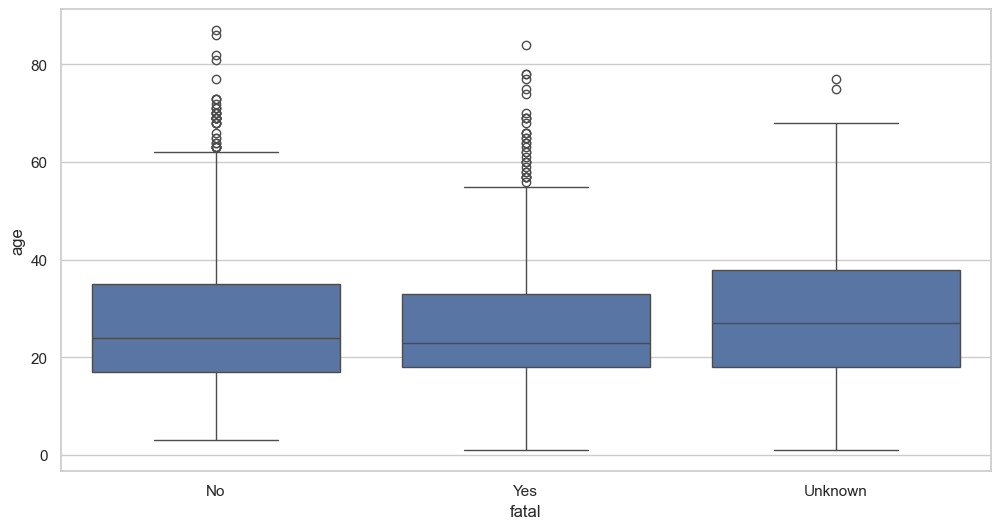

In [988]:
sns.boxplot(x="fatal", y="age", data=dfagenonulls);

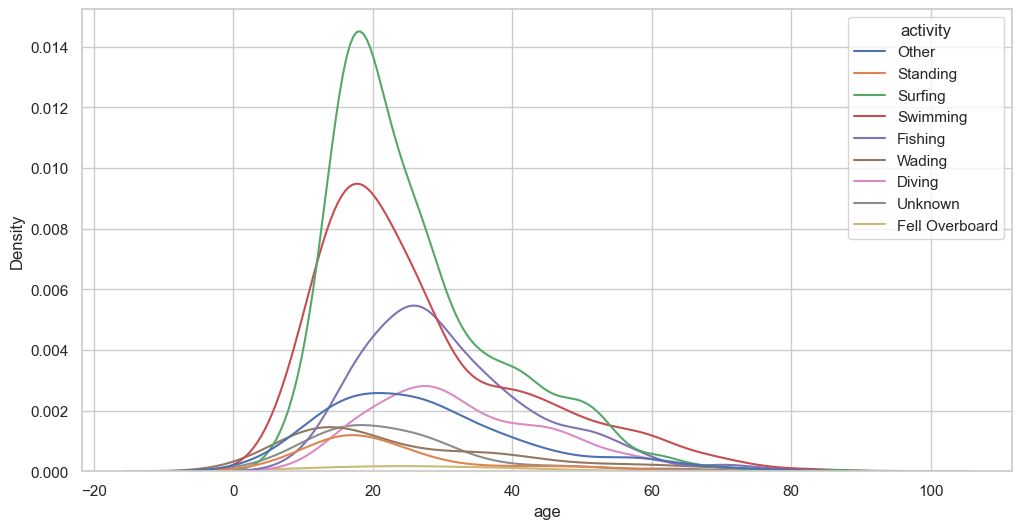

In [989]:
sns.kdeplot(x=dfagenonulls.age, hue=dfagenonulls.activity);

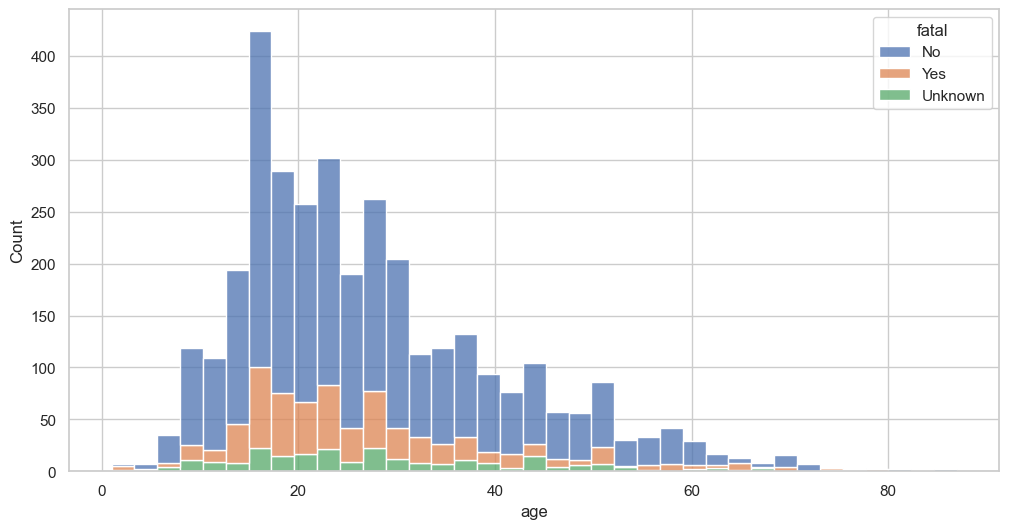

In [990]:
sns.histplot(data=dfagenonulls, x="age", hue="fatal", multiple="stack");

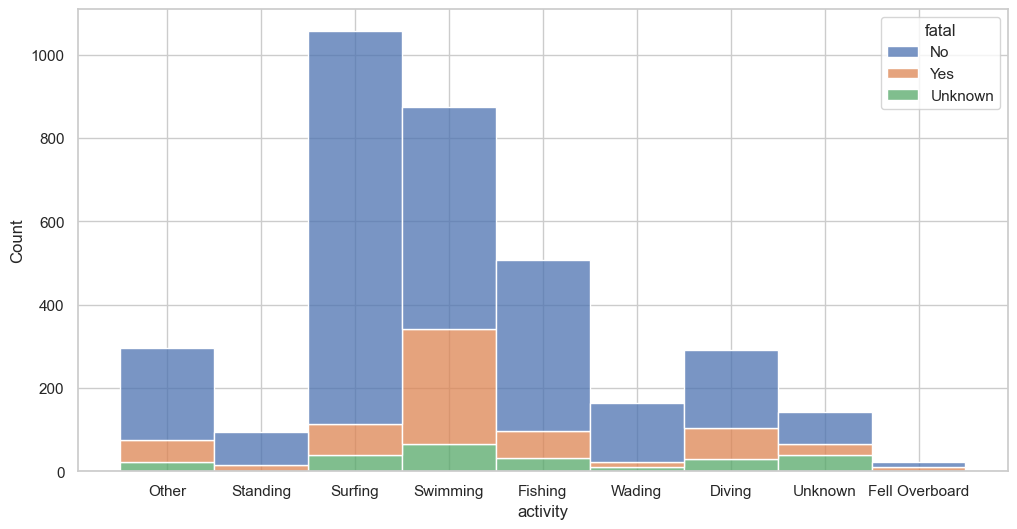

In [991]:
sns.histplot(data=dfagenonulls, x="activity", hue="fatal", multiple="stack");

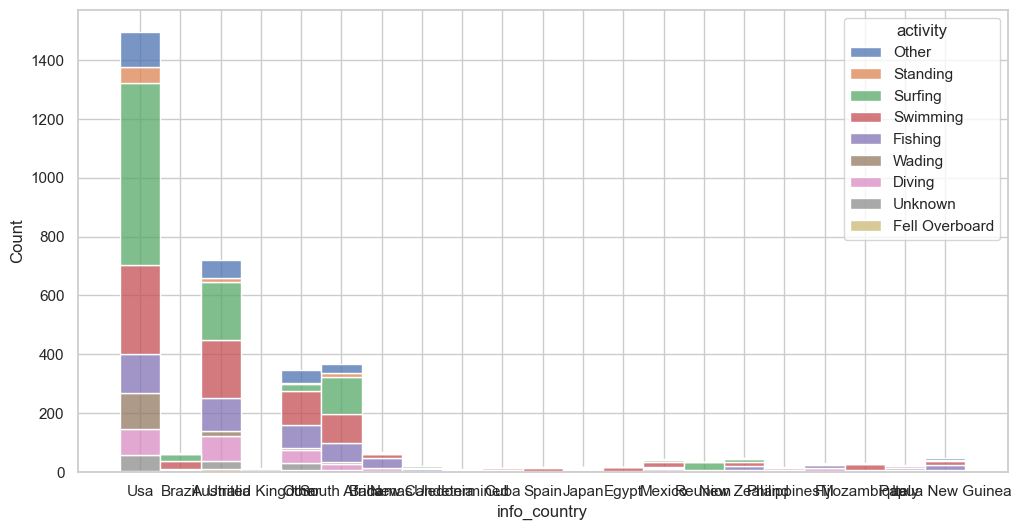

In [992]:
sns.histplot(data=dfagenonulls, x="info_country", hue="activity", multiple="stack");

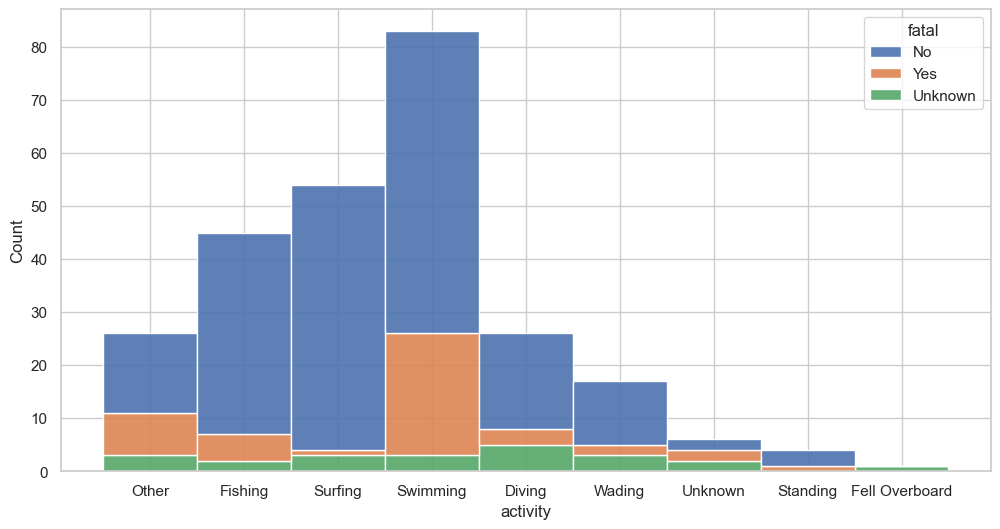

In [993]:
sns.histplot(data=dfagenonulls, x=dfagenonulls[dfagenonulls.age > 50].activity, hue="fatal", alpha = 0.9, multiple="stack");

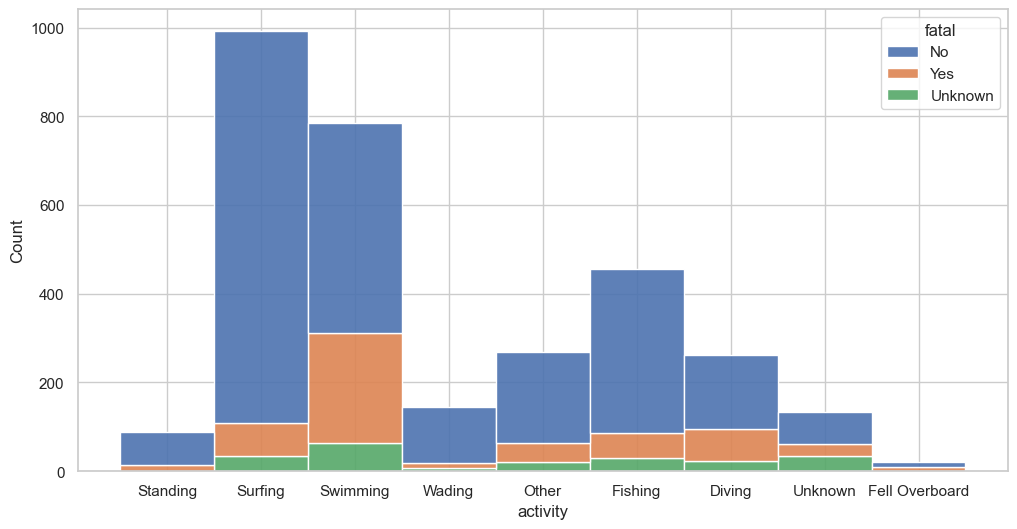

In [994]:
sns.histplot(data=dfagenonulls, x=dfagenonulls[dfagenonulls.age < 50].activity, hue="fatal", alpha = 0.9, multiple="stack");

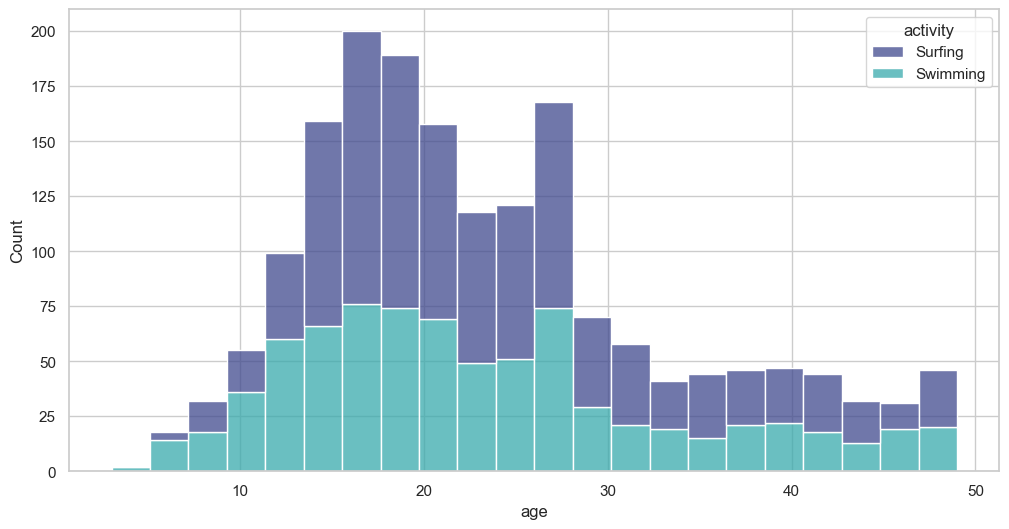

In [995]:
sns.histplot(palette="mako", 
             x=dfagenonulls[dfagenonulls.age < 50].age, 
             hue=dfagenonulls[(dfagenonulls.activity=="Surfing")|(dfagenonulls.activity=="Swimming")].activity, 
            multiple="stack");

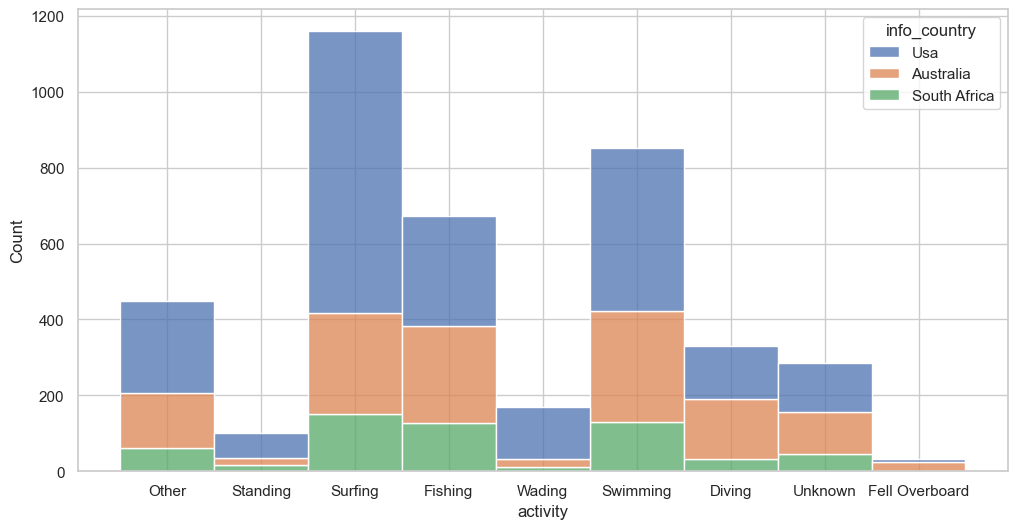

In [996]:
sns.histplot(x=dftop3countries.activity, 
             hue=dftop3countries['info_country'], 
            multiple="stack");

In [997]:
dfagenonulls[['activity','info_country']].groupby(['activity']).max()

info_country
activity                   
Diving                  Usa
Fell Overboard          Usa
Fishing                 Usa
Other                   Usa
Standing                Usa
Surfing                 Usa
Swimming                Usa
Unknown                 Usa
Wading                  Usa

In [998]:
dfagenonulls['activity'].nunique()

9

In [999]:
dfcountries20['country'].value_counts().head(20)

country
Usa                 2181
Australia           1296
South Africa         571
Papua New Guinea     130
New Zealand          127
Brazil               111
Bahamas              106
Mexico                85
Italy                 67
Philippines           62
Fiji                  60
Reunion               58
New Caledonia         53
Mozambique            43
Cuba                  41
Spain                 40
Egypt                 37
Undetermined          37
United Kingdom        35
Japan                 34
Name: count, dtype: int64

In [1000]:
dftop5countries = dftopvalues[(dftopvalues['info_country']=='Usa') | (dftopvalues['info_country']=='Australia') | (dftopvalues['info_country']=='South Africa') | (dftopvalues['info_country']=='Papua New Guinea')]

In [1001]:
dftop3countries = dftopvalues[(dftopvalues['info_country']=='Usa') | (dftopvalues['info_country']=='Australia') | (dftopvalues['info_country']=='South Africa')]
dftop3countries['info_country'].value_counts()

info_country
Usa             2181
Australia       1296
South Africa     571
Name: count, dtype: int64

In [1002]:
dftop3countries.shape

(4048, 17)

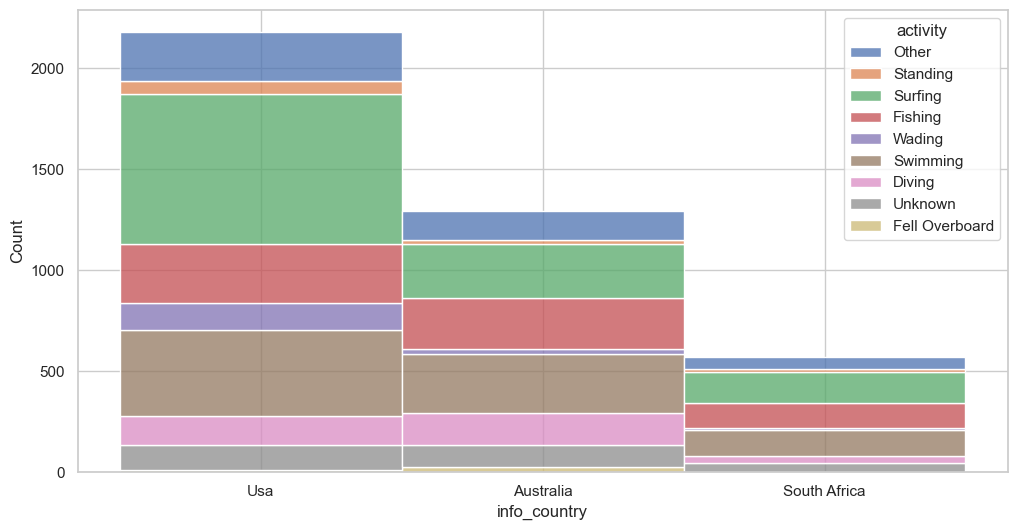

In [1003]:
sns.histplot(data=dftop3countries, x="info_country", hue="activity", multiple="stack");

<Axes: xlabel='activity', ylabel='Count'>

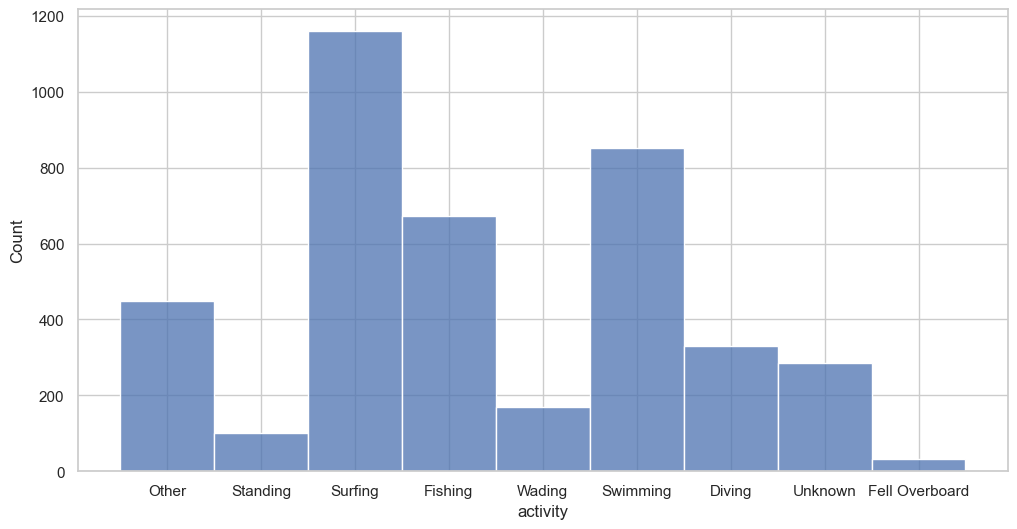

In [1004]:
sns.histplot(data=dftop3countries, x='activity')

In [1005]:
dftop3 = dftop3countries[(dftop3countries['activity']=='Surfing') | (dftop3countries['activity']=='Swimming') | (dftop3countries['activity']=='Fishing') | (dftop3countries['activity']=='Wading')]
dftop3['activity'].value_counts()

activity
Surfing     1160
Swimming     851
Fishing      674
Wading       168
Name: count, dtype: int64

In [1006]:
dftop3.shape

(2853, 17)

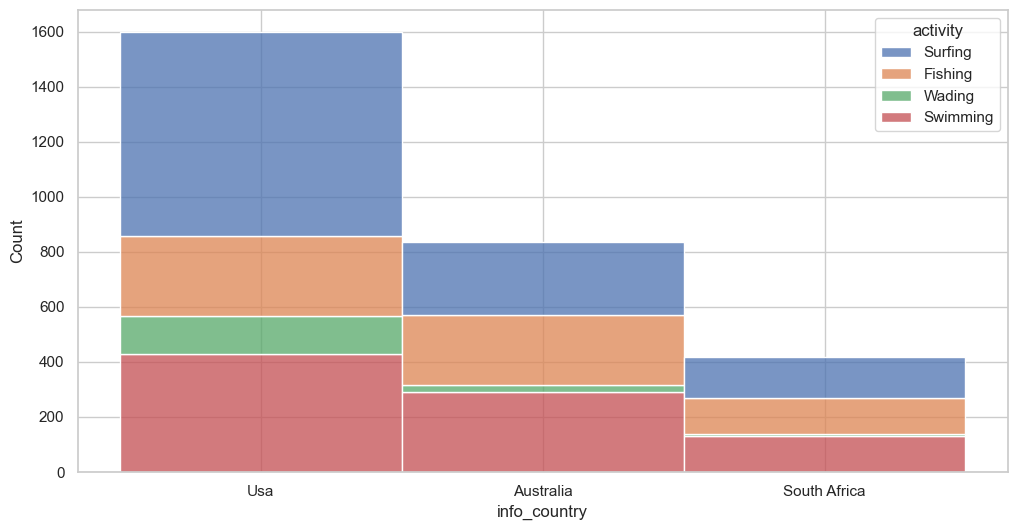

In [1007]:
sns.histplot(data=dftop3, x="info_country", hue="activity", multiple="stack");

In [1008]:
dfFlorida = dfcountries[dfcountries['area']=='Florida']
dftop3Florida = dfFlorida[(dfFlorida['activity']=='Surfing') | (dfFlorida['activity']=='Swimming') | (dfFlorida['activity']=='Fishing') | (dfFlorida['activity']=='Wading')]
dftop3Florida['activity'].value_counts()

activity
Surfing     438
Swimming    184
Wading       94
Fishing      91
Name: count, dtype: int64

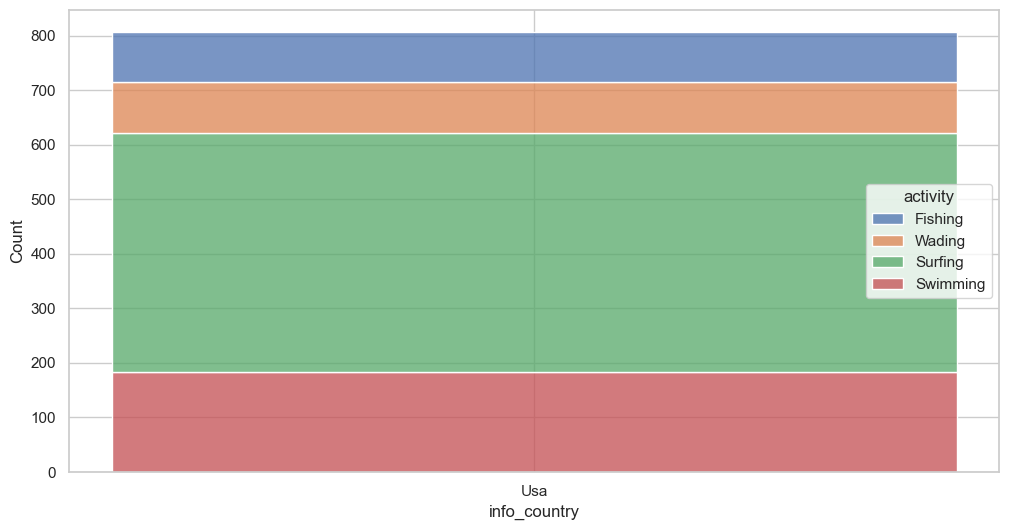

In [1009]:
sns.histplot(data=dftop3Florida, x="info_country", hue="activity", multiple="stack");

<Axes: xlabel='activity', ylabel='Count'>

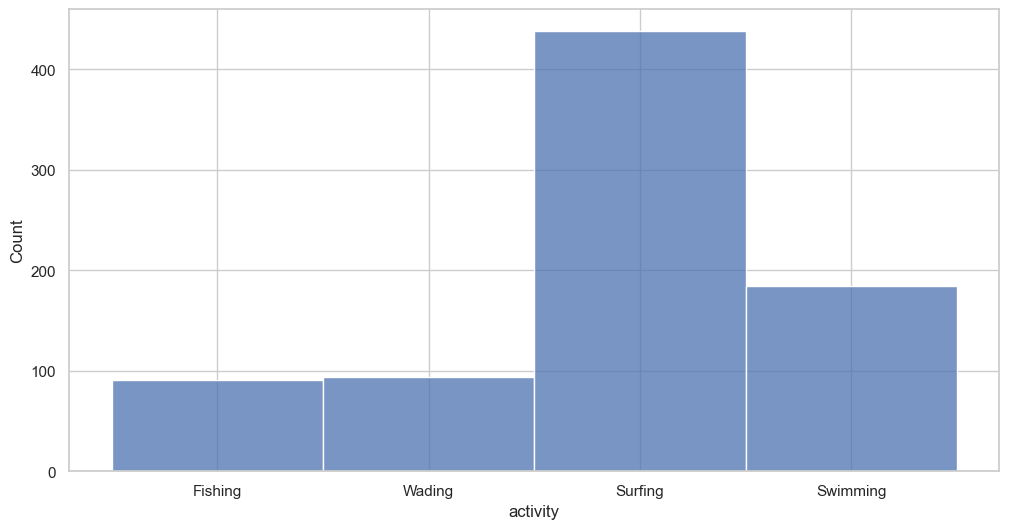

In [1010]:
sns.histplot(data=dftop3Florida, x='activity')

In [1011]:
dftop3countries[['activity', 'info_country', 'fatal']].groupby(['activity', 'info_country', 'fatal']).sum()

Empty DataFrame
Columns: []
Index: [(Diving, Australia, No), (Diving, Australia, Unknown), (Diving, Australia, Yes), (Diving, South Africa, No), (Diving, South Africa, Unknown), (Diving, South Africa, Yes), (Diving, Usa, No), (Diving, Usa, Unknown), (Diving, Usa, Yes), (Fell Overboard, Australia, No), (Fell Overboard, Australia, Unknown), (Fell Overboard, Australia, Yes), (Fell Overboard, Usa, No), (Fell Overboard, Usa, Unknown), (Fell Overboard, Usa, Yes), (Fishing, Australia, No), (Fishing, Australia, Unknown), (Fishing, Australia, Yes), (Fishing, South Africa, No), (Fishing, South Africa, Unknown), (Fishing, South Africa, Yes), (Fishing, Usa, No), (Fishing, Usa, Unknown), (Fishing, Usa, Yes), (Other, Australia, No), (Other, Australia, Unknown), (Other, Australia, Yes), (Other, South Africa, No), (Other, South Africa, Unknown), (Other, South Africa, Yes), (Other, Usa, No), (Other, Usa, Unknown), (Other, Usa, Yes), (Standing, Australia, No), (Standing, Australia, Yes), (Standing, South Africa, No), (Standing, South Africa, Unknown), (Standing, South Africa, Yes), (Standing, Usa, No), (Standing, Usa, Unknown), (Standing, Usa, Yes), (Surfing, Australia, No), (Surfing, Australia, Unknown), (Surfing, Australia, Yes), (Surfing, South Africa, No), (Surfing, South Africa, Unknown), (Surfing, South Africa, Yes), (Surfing, Usa, No), (Surfing, Usa, Unknown), (Surfing, Usa, Yes), (Swimming, Australia, No), (Swimming, Australia, Unknown), (Swimming, Australia, Yes), (Swimming, South Africa, No), (Swimming, South Africa, Unknown), (Swimming, South Africa, Yes), (Swimming, Usa, No), (Swimming, Usa, Unknown), (Swimming, Usa, Yes), (Unknown, Australia, No), (Unknown, Australia, Unknown), (Unknown, Australia, Yes), (Unknown, South Africa, No), (Unknown, South Africa, Unknown), (Unknown, South Africa, Yes), (Unknown, Usa, No), (Unknown, Usa, Unknown), (Unknown, Usa, Yes), (Wading, Australia, No), (Wading, Australia, Unknown), (Wading, Australia, Yes), (Wading, South Africa, No), (Wading, South Africa, Yes), (Wading, Usa, No), (Wading, Usa, Unknown), (Wading, Usa, Yes)]

[76 rows x 0 columns]

In [1012]:
dftop3countries.pivot_table(values="activity", index="fatal", aggfunc="count")

activity
fatal            
No           3123
Unknown       396
Yes           529

In [1013]:
dftop3countries.sample(5)

date  year        type  info_country       country  \
2287    1975.12.06  1975  Unprovoked           Usa           Usa   
2692  1962.06.11.a  1962  Unprovoked           Usa           Usa   
2910  1956.08.15.R  1956  Unprovoked           Usa           Usa   
1584    1999.07.15  1999  Unprovoked  South Africa  South Africa   
4705    1959.04.05  1959  Unprovoked     Australia     Australia   

                       area                   location activity  \
2287             California           Farallon Islands   Diving   
2692             California          San Francisco Bay    Other   
2910            Puerto Rico                North coast   Diving   
1584  Western Cape Province  Buffels Bay (near Knysna)  Surfing   
4705        New South Wales                   Thirroul  Fishing   

                       name sex    age info_age  \
2287   Robin Buckley (male)   M  27.00       27   
2692       Frank Lee Morris   M  35.00       35   
2910  Jose Luis Nufize Lago   M  13.00       13   
1584     Hercules Pretorius   M  14.00       14   
4705           Jeff McAuley   M  27.38      NaN   

                                                 injury fatal   time  \
2287                                         Leg bitten    No  12h00   
2692  FATAL, but shark involvement uncomfirmed. Deat...   Yes  Night   
2910                                              FATAL   Yes    NaN   
1584                                              FATAL   Yes  11h15   
4705                                    Swim fin bitten    No    NaN   

          species                             investigator or source  
2287  White shark  D. Miller & R. Collier, R. Collier, pp.67-69; ...  
2692          NaN                  San Francisco Chronicle, 5/3/1986  
2910          NaN           Virgin Island Daily News, 8/15/1956, p.1  
1584  White shark                                   A. Gifford, GSAF  
4705          NaN        P. Gilbert, L. Schultz & S. Springer (1960)

In [1014]:
dftopvalues['type'].value_counts()

type
Unprovoked      4368
Provoked         564
Invalid          530
Sea Disaster     225
Boating          204
Boat             130
Questionable       2
Boatomg            1
Name: count, dtype: int64

In [1015]:
dftopvalues['type'].isna().sum()

4

In [1016]:
dftopvalues['type'].fillna('Unknown', inplace=True)

In [1017]:
dftopvalues['type'].value_counts()

type
Unprovoked      4368
Provoked         564
Invalid          530
Sea Disaster     225
Boating          204
Boat             130
Unknown            4
Questionable       2
Boatomg            1
Name: count, dtype: int64

In [1018]:
# dftopvalues[dftopvalues['type']=='Boat']

In [1019]:
# let's apply regex to change it
dftopvalues['type'] = np.where(dftopvalues['type'].str.contains(r"Boat"), 'Boating', dftopvalues['type'])
dftopvalues['type'] = np.where(dftopvalues['type'].str.contains(r"Questionable"), 'Unknown', dftopvalues['type'])
dftopvalues['type'] = np.where(dftopvalues['type'].str.contains(r"Invalid"), 'Unknown', dftopvalues['type'])
dftopvalues[dftopvalues['type']=='Unknown'].shape

(536, 17)

In [1020]:
dftopvalues['type'].value_counts()

type
Unprovoked      4368
Provoked         564
Unknown          536
Boating          335
Sea Disaster     225
Name: count, dtype: int64

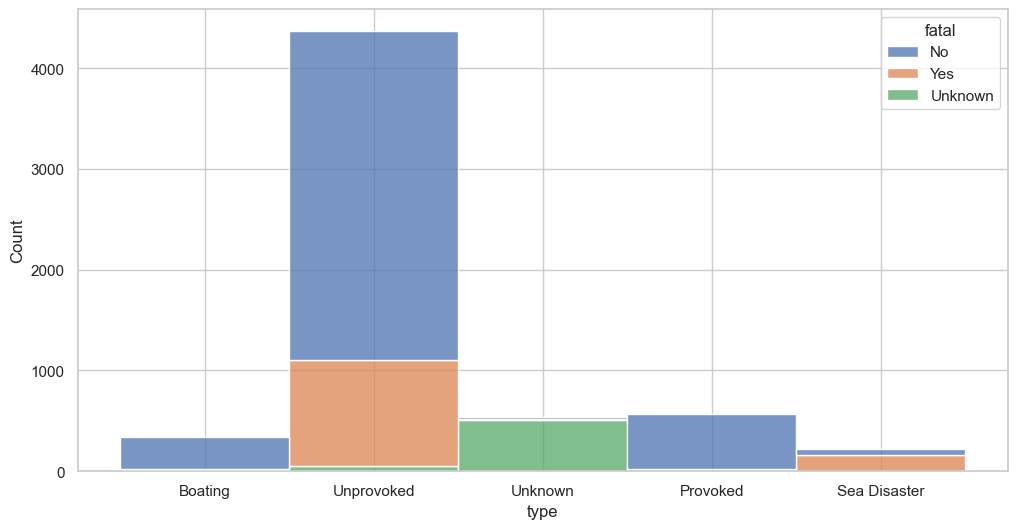

In [1021]:
sns.histplot(data=dftopvalues, x="type", hue="fatal", multiple="stack");

In [1022]:
dfnotunprovoked = dftopvalues[dftopvalues['type']!= 'Unprovoked']
dfnotunprovoked.shape

(1660, 17)

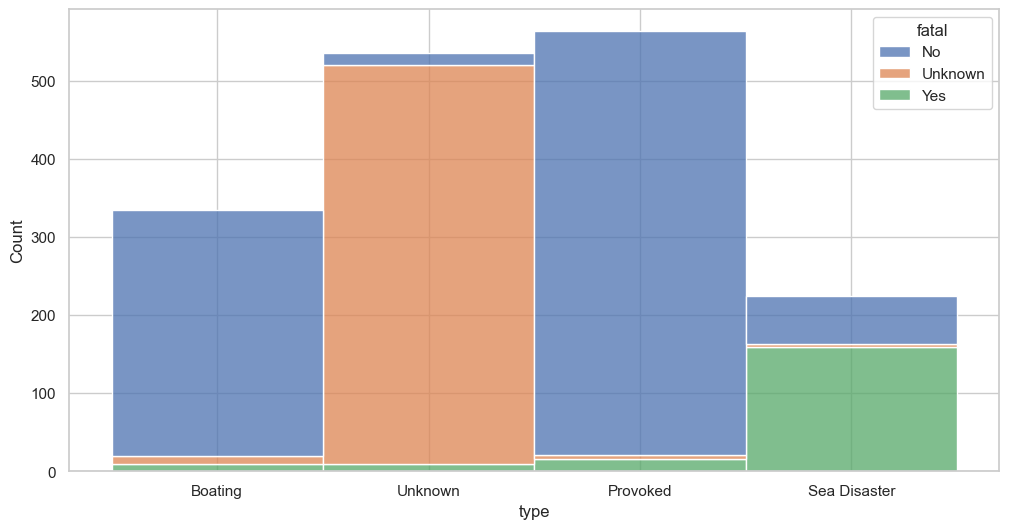

In [1023]:
sns.histplot(data=dfnotunprovoked, x="type", hue="fatal", multiple="stack");

In [1024]:
# we could analize the fatality of different oceans
# Let's start with USA, the most represented country, and divide the cases into the different oceans

# attacks by USA area 
dfUSA = dfcountries[dfcountries['info_country']=='Usa']
dfUSA.area.value_counts()

area
Florida                   1024
Hawaii                     291
California                 287
South Carolina             150
North Carolina             100
Texas                       73
New Jersey                  49
Oregon                      29
New York                    28
Virginia                    19
Puerto Rico                 16
Alabama                     15
Georgia                     14
Massachusetts               12
Louisiana                   11
Delaware                     7
Rhode Island                 6
Maryland                     6
Connecticut                  6
US Virgin Islands            5
Mississippi                  5
Washington                   2
East coast                   2
New York                     2
Palmyra Atoll                2
Missouri                     1
Johnston Atoll               1
 New Jersey                  1
Midway Atoll                 1
 North Carolina              1
Wake Island                  1
Illinois                     1
Nor

In [1025]:
dfUSA10states = dfUSA.copy()
USA10states = list(dfUSA10states['area'].value_counts().head(10).index) # the top 20 countries with the highest number of attacks
USAallstates = list(dfUSA10states['area'].value_counts().index) # all the countries
dfUSA10states['area'] = dfUSA10states['area'].apply(lambda x: 'Other' if x not in USA10states else x) # the function where I substitute the least frequent countries with 'Other'
dfUSA10states['area'].nunique()

11

In [1026]:
dfUSA10states.shape

(2181, 17)

In [1027]:
# damn, the most represented state, Florida, has 2 oceans, Caribbean and Atlantic, it can be quite different to set. Let's try anyway
# attacks by locations of Florida 
dfcountries[dfcountries['area']=='Florida'].location.value_counts()

location
New Smyrna Beach, Volusia County          163
Daytona Beach, Volusia County              30
Ponce Inlet, Volusia County                20
Melbourne Beach, Brevard County            18
Cocoa Beach, Brevard County                12
                                         ... 
Daytona  Beach, Volusia County              1
Big Pine Key, Monroe County                 1
St. Augustine, St. Johns County             1
South Jacksonville Beach, Duval County      1
Near Fernandina Bar, Nassau County          1
Name: count, Length: 503, dtype: int64

In [1028]:
# let's try to split them in oceans. To use regex, first we have to get rid of the nulls

dfcountries.location.isna().sum()

466

In [1029]:
dfcountries[dfcountries.location.isna()]

date  year          type   info_country        country  \
42      2017.12.09  2017    Unprovoked        Bahamas        Bahamas   
47    2017.11.13.R  2017    Unprovoked   Undetermined   Undetermined   
117     2017.03.09  2017    Unprovoked        Bahamas        Bahamas   
118     2017.02.21  2017    Unprovoked        Reunion        Reunion   
121   2017.02.01.a  2017    Unprovoked        Bahamas        Bahamas   
...            ...   ...           ...            ...            ...   
6006    1853.11.08  1853    Unprovoked      Australia      Australia   
6009    1853,94.29  1853    Unprovoked         Greece         Greece   
6015  1852.10.23.R  1852      Provoked  Pacific Ocean  Pacific Ocean   
6017    1852.08.07  1852    Unprovoked          Tonga          Tonga   
6026    1806.04.24  1896  Sea Disaster            Usa            Usa   

                         area location        activity  \
42                        NaN      NaN        Swimming   
47                        NaN      NaN         Surfing   
117               Great Exuma      NaN         Washing   
118               Saint-Andre      NaN         Surfing   
121                    Bimini      NaN          Diving   
...                       ...      ...             ...   
6006          New South Wales      NaN        Swimming   
6009                   Corfu       NaN        Swimming   
6015  Between Australia & USA      NaN         Fishing   
6017                Tongatapu      NaN  Fell Overboard   
6026                      NaN      NaN         Unknown   

                           name sex    age info_age  \
42          Sarah Illig-Carroll   F  25.00       25   
47                Timur Yunusov   M  24.00       24   
117              George Keywood   M  58.00       58   
118         Alexandre Naussance   M  26.00       26   
121                  Freek Vonk   M  37.00       37   
...                         ...  ..    ...      ...   
6006                John Peters   M  27.38      NaN   
6009                     Hanson   M  27.38      NaN   
6015           William Stannard   M  27.38      NaN   
6017           Charles Weymouth   M  27.38      NaN   
6026  Crew of the schooner Mary   M  27.38      NaN   

                                             injury fatal   time  \
42                              Minor injury to arm     N    NaN   
47                          Puncture wounds to feet     N    NaN   
117    Abrasions & lacerations to left leg and hand     N    NaN   
118                                           Fatal     Y  09h30   
121                  Lacerations to upper right arm     N    NaN   
...                                             ...   ...    ...   
6006                                     Leg bitten     N    NaN   
6009                            Leg severed at knee     N    NaN   
6015  Foot bitten by hooked shark PROVOKED INCIDENT     N    NaN   
6017                                          FATAL     Y    NaN   
6026            Shark scavenged on the dead sailors   NaN    NaN   

                   species               investigator or source  
42         Nurse shark. 5'               Daily Star, 12/11/2017  
47                     NaN                            Instagram  
117            Lemon shark                  Kent Live, 3/9/2017  
118                    NaN                  Surfline, 2/21/2017  
121   Caribbean reef shark                 Dutch News, 2/2/2017  
...                    ...                                  ...  
6006                   NaN         Maitland Mercury, 11/19/1853  
6009          234-lb shark  South Australian Register, 5/8/1854  
6015                   NaN         Maitland Mercury, 10/23/1852  
6017                   NaN                    Courier, 1/3/1853  
6026                   NaN               Evening Post, 9/6/1806  

[466 rows x 17 columns]

In [1030]:
# let's try to split them in oceans. To use regex, first we have to get rid of the nulls

dfFlorida.location.isna().sum()

11

In [1031]:
dfFloridanulls = dfFlorida[dfFlorida.location.isna()]
dfFloridanulls

date  year        type info_country country     area location  \
343     2015.01.08  2015     Invalid          Usa     Usa  Florida      NaN   
1658  1997.11.05.R  1997  Unprovoked          Usa     Usa  Florida      NaN   
1740  1995.10.28.R  1995  Unprovoked          Usa     Usa  Florida      NaN   
1867    1992.11.23  1992  Unprovoked          Usa     Usa  Florida      NaN   
2100  1984.09.22.b  1984  Unprovoked          Usa     Usa  Florida      NaN   
2107    1984.07.01  1984  Unprovoked          Usa     Usa  Florida      NaN   
3335    1916.06.23  1916    Provoked          Usa     Usa  Florida      NaN   
3495    2017.04.26  2017     Invalid          Usa     Usa  Florida      NaN   
4247    1983.04.19  1983  Unprovoked          Usa     Usa  Florida      NaN   
5285  1928.01.21.b  1928     Invalid          Usa     Usa  Florida      NaN   
5679  1896.00.00.b  1896  Unprovoked          Usa     Usa  Florida      NaN   

         activity                                               name      sex  \
343      Swimming                                         Rob Konrad        M   
1658     Swimming  James Ogilvy, 31st in line for the British Throne        M   
1740      Surfing                                     Matthew Beyrer        M   
1867      Surfing                                         Larry Bush        M   
2100     Swimming                                    male from Tampa        M   
2107      Fishing                                  William McConnell        M   
3335      Unknown                                      Adolph Crouse        M   
3495  Photo shoot                                      Molly Cavelli        F   
4247      Surfing                                 Arnold Schwarzwood        M   
5285     Swimming                                            Unknown  Unknown   
5679     Swimming                                               male        M   

        age info_age                                             injury  \
343   38.00       38  During his 16-hour swim to shore, he was circl...   
1658  32.00       32                                       Thigh bitten   
1740  13.00       13                          Lacerations to right foot   
1867  24.00       24                                 Right ankle bitten   
2100  27.00  Elderly                                Left foot lacerated   
2107  30.00       30                                        Leg abraded   
3335  26.00       26  Leg bitten by shark hooked shark PROVOKED INCI...   
3495  27.38      NaN                   Alleged laceration to left ankle   
4247  27.38      NaN                                         No details   
5285  27.38      NaN                                Body not recovered    
5679  27.38      NaN                                              FATAL   

        fatal         time                                         species  \
343       NaN        Night                            No shark involvement   
1658        N  Mid morning                                             NaN   
1740        N          NaN                                             NaN   
1867        N        13h00                                1.8 m [6'] shark   
2100        N          NaN                                             NaN   
2107        N        18h00                                             NaN   
3335        N          NaN                                             NaN   
3495      NaN          NaN  No shark invovlement - it ws a publicity stunt   
4247  UNKNOWN          NaN                                             NaN   
5285      NaN        Night                 Shark involvement not confirmed   
5679        Y          NaN                                             NaN   

                                 investigator or source  
343                                      UPI, 1/12/2015  
1658                     The Mirror (London), 11/5/1997  
1740        Flagler/Palm Coast News Tribune, 10/28/1995  
1867  Fort Pierce Trib

In [1032]:
dfFlorida.location.value_counts(dropna=False).head(20)

location
New Smyrna Beach, Volusia County                   163
Daytona Beach, Volusia County                       30
Ponce Inlet, Volusia County                         20
Melbourne Beach, Brevard County                     18
Cocoa Beach, Brevard County                         12
Ponce Inlet, New Smyrna Beach, Volusia County       12
NaN                                                 11
Cocoa Beach, Brevard  County                        11
Ormond Beach, Volusia County                        11
Palm Beach, Palm Beach County                       10
Singer Island, Riviera Beach, Palm Beach County     10
Jacksonville Beach, Duval County                     9
Florida Keys, Monroe County                          9
Juno Beach, Palm Beach County                        9
Florida Keys                                         8
Vero Beach, Indian River County                      8
Sanibel Island, Lee County                           8
Jacksonville, Duval County                           7
J

In [1033]:
# we have 11 nulls
dfFlorida.dropna(subset=['location'], inplace=True)
dfFlorida.shape

(1013, 17)

In [1034]:
dfUSA.sample()

date  year        type info_country country            area  \
2730  1961.08.16  1961  Unprovoked          Usa     Usa  South Carolina   

                                location activity                name sex  \
2730  Pawley’s Island, Georgetown County   Wading  William Lee Bailey   M   

       age info_age                                             injury fatal  \
2730  19.0       19  Right arm bitten. Left leg bitten, surgically ...     N   

       time      species investigator or source  
2730  08h00  White shark             C.O. Adams

In [1035]:
dfFlorida.location.value_counts().head(20)

location
New Smyrna Beach, Volusia County                   163
Daytona Beach, Volusia County                       30
Ponce Inlet, Volusia County                         20
Melbourne Beach, Brevard County                     18
Cocoa Beach, Brevard County                         12
Ponce Inlet, New Smyrna Beach, Volusia County       12
Ormond Beach, Volusia County                        11
Cocoa Beach, Brevard  County                        11
Singer Island, Riviera Beach, Palm Beach County     10
Palm Beach, Palm Beach County                       10
Jacksonville Beach, Duval County                     9
Florida Keys, Monroe County                          9
Juno Beach, Palm Beach County                        9
Sanibel Island, Lee County                           8
Florida Keys                                         8
Vero Beach, Indian River County                      8
Jacksonville, Duval County                           7
Jupiter, Palm Beach County                           6
J

In [1036]:
# let's apply regex to change it
dfcountries['ocean'] = np.where(dfcountries['location'].str.contains(r"Volusia"), 'Atlantic', '')

oceancolumns = ['date', 'year', 'type', 'info_country', 'country', 'area', 'location', 'ocean', 'activity', 'name', 'sex', 'age', 'info_age', 'injury', 'fatal', 'time', 'species', 'investigator or source']
dfcountries = dfcountries.reindex (columns = oceancolumns)
dfcountries.sample()

date  year  type  info_country       country  \
4349  1976.03.09  1976  Boat  South Africa  South Africa   

                       area                       location ocean activity  \
4349  Western Cape Province  2 km from Macassar, False Bay        Unknown   

                        name      sex    age info_age  \
4349  5 m skiboat; Stephanie  Unknown  27.38      NaN   

                           injury fatal time                     species  \
4349  Shark breached hull of boat     N  NaN  White shark named “Spotty”   

     investigator or source  
4349       T. Wallett, p.31

In [1037]:
# let's apply regex to change it
dfcountries['ocean'] = np.where(dfcountries['info_country'].str.contains(r"Chile"), 'Pacific', '')

oceancolumns = ['date', 'year', 'type', 'info_country', 'country', 'area', 'location', 'ocean', 'activity', 'name', 'sex', 'age', 'info_age', 'injury', 'fatal', 'time', 'species', 'investigator or source']
dfFlorida = dfFlorida.reindex (columns = oceancolumns)
dfFlorida.sample()

date  year        type info_country country     area  \
3621  2013.06.25.b  2013  Unprovoked          Usa     Usa  Florida   

                        location  ocean  activity            name sex    age  \
3621  Jacksonville, Duval County    NaN  Swimming  Colleen Malone   M  27.38   

     info_age                    injury fatal time                    species  \
3621      NaN  Lacerations to left foot     N  NaN  Possibly a Bull shark, 3'   

      investigator or source  
3621  Action News, 7/25/2013

In [1038]:
dfFlorida[dfFlorida['location'].str.contains(r"Escambia")]

date  year        type info_country country     area  \
457     2013.09.14  2013  Unprovoked          Usa     Usa  Florida   
680     2011.06.21  2011  Unprovoked          Usa     Usa  Florida   
1449  2001.07.15.b  2001  Unprovoked          Usa     Usa  Florida   
1585    1999.07.04  1999  Unprovoked          Usa     Usa  Florida   
1939    1990.07.08  1990  Unprovoked          Usa     Usa  Florida   
1951    1990.00.00  1990  Unprovoked          Usa     Usa  Florida   
3407    1881.10.16  1881     Invalid          Usa     Usa  Florida   
3957    2000.06.13  2000        Boat          Usa     Usa  Florida   
3963    2000.03.31  2000  Unprovoked          Usa     Usa  Florida   
5478    1911.11.08  1911     Invalid          Usa     Usa  Florida   
5481    1911.09.20  1911  Unprovoked          Usa     Usa  Florida   
5509    1909.08.13  1909  Unprovoked          Usa     Usa  Florida   
5828  1883.00.00.c  1883  Unprovoked          Usa     Usa  Florida   
5841  1882.00.00.b  1882  Unprovoked          Usa     Usa  Florida   

                                               location  ocean  \
457            Casino Beach, Pensacola, Escambia County    NaN   
680                        Perdido Key, Escambia County    NaN   
1449                 Santa Rosa Island, Escambia County    NaN   
1585                  Pensacola  Beach, Escambia County    NaN   
1939  Perdido Key near the Florida Panhandle, Escamb...    NaN   
1951                         Pensacola, Escambia County    NaN   
3407                     Pensacola Bay, Escambia County    NaN   
3957                     Pensacola Bay, Escambia County    NaN   
3963                   Santa Rosa Sound Escambia County    NaN   
5478                     Pensacola Bay, Escambia County    NaN   
5481                     Pensacola Bay, Escambia County    NaN   
5509                     Pensacola Bay, Escambia County    NaN   
5828                      Fort Pickens, Escambia County    NaN   
5841  In the bay near the naval yard at Pensacola, E...    NaN   

                                               activity  \
457                                            Swimming   
680                                          Jet skiing   
1449                                            Surfing   
1585                                             Wading   
1939                                            Surfing   
1951                                            Surfing   
3407                                           Swimming   
3957                                            Sailing   
3963                                            Fishing   
5478                                            Unknown   
5481                                           Swimming   
5509                                            Fishing   
5828                                     Fell Overboard   
5841  During "an exhibition" he was tied in sack & t...   

                             name      sex    age info_age  \
457                  Trevor Kalck        M  21.00       21   
680               Tyler McConnell        M  20.00       20   
1449              Michael Waters         M  48.00       48   
1585               Lisa Alexander        F  30.00       30   
1939               Scott Holloway        M  17.00       17   
1951                         male        M  17.00       17   
3407             Anthony McDonald        M  18.00       18   
3957            22' pleasure boat  Unknown  27.38      NaN   
3963                 Dave Edwards        M  27.38      NaN   
5478                Jules Antoine        M  27.38      NaN   
5481  Thomas Ashe, a ship’s pilot        M  27.38      NaN   
5509                William Craug        M  27.38      NaN   
5828            the Captain’s boy        M  27.38      NaN   
5841                John T. Clark        M  27.38      NaN   

                                                 injury    fatal       time  \
457                           Lacerations to right foot        N      15h30 

In [1039]:
# let's clean the locations
dfcountries[dfcountries['location'].str.contains(r"Okaloosa")].shape 

ValueError: Cannot mask with non-boolean array containing NA / NaN values

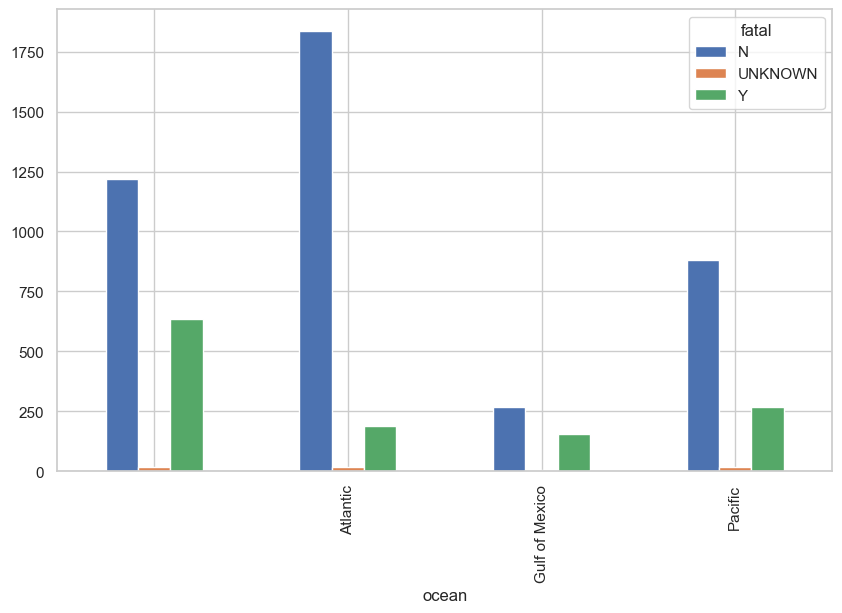

In [1047]:
pd.crosstab(dfcountries['ocean'], dfcountries.fatal).plot(kind="bar", figsize=(10, 6)); # fatality per oceans

In [1052]:
dfcountries['ocean'] = np.where(dfcountries['location'].str.contains(r"Brevard"), 'Atlantic', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['location'].str.contains(r"Palm Beach"), 'Atlantic', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['location'].str.contains(r"Bathtub"), 'Atlantic', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['location'].str.contains(r"Duval County"), 'Atlantic', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['info_country'].str.contains(r"Brazil"), 'Atlantic', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['info_country'].str.contains(r"Australia"), 'Pacific', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['info_country'].str.contains(r"Austrlia"), 'Pacific', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['info_country'].str.contains(r"Fiji"), 'Pacific', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['info_country'].str.contains(r"Usa"), 'Atlantic', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['info_country'].str.contains(r"Bahamas"), 'Caribbean Sea', dfcountries['ocean'])


dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Monroe"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Miami"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Miami"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Indian River"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Flagler"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Lucie"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Broward"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Johns County"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Nassau"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Daytona"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Lauderdale"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Martin"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Dade"), 'Atlantic', dfFlorida['ocean'])

dfcountries['ocean'] = np.where(dfcountries['location'].str.contains(r"Okaloosa"), 'Gulf of Mexico', dfcountries['ocean'])
dfcountries['ocean'] = np.where(dfcountries['location'].str.contains(r"Pinellas"), 'Gulf of Mexico', dfcountries['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Lee"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Marco Island"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Collier"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Charlotte"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Sarasota"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Manatee"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Hillsborough"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Hernando"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Citrus"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Wakulla"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Franklin"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Gulf "), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Bay C"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Walton C"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Santa Rosa"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Escambia"), 'Gulf of Mexico', dfFlorida['ocean'])

dfcountries.ocean.value_counts()

ocean
Atlantic          2221
                  1929
Pacific           1314
Gulf of Mexico     488
Caribbean Sea       76
Name: count, dtype: int64

In [617]:
dfcountries['info_country'].value_counts().head(20)

info_country
Usa                 2181
Australia           1296
South Africa         571
Other                183
Papua New Guinea     130
New Zealand          127
Brazil               111
Bahamas              106
Mexico                85
Italy                 67
Philippines           62
Fiji                  60
Reunion               58
New Caledonia         53
Mozambique            43
Cuba                  41
Spain                 40
Undetermined          37
Egypt                 37
United Kingdom        35
Name: count, dtype: int64

In [1048]:
dfcountries['location'].isna().sum()

466

In [1054]:
locationnulls = dfcountries[dfcountries['location'].isna()]
locationnulls['info_country'].value_counts().head(20)

info_country
Other                   61
Usa                     46
Australia               34
Bahamas                 30
Undetermined            29
Fiji                    16
Atlantic Ocean          15
Philippines             15
Papua New Guinea        13
Hong Kong               12
Reunion                 11
Pacific Ocean           10
Mexico                   9
Solomon Islands          8
South Atlantic Ocean     8
South Africa             8
Panama                   8
New Caledonia            7
Japan                    7
Jamaica                  5
Name: count, dtype: int64

In [429]:
# let's clean the locations
dfFlorida[dfFlorida['location'].str.contains(r"Escambia")].shape # I apply regex to select the rows where 'age' has an odd value, where there is not a digit

(14, 18)

In [430]:
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Brevard"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Palm Beach"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Bathtub"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Duval County"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Monroe"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Miami"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Miami"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Indian River"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Flagler"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Lucie"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Broward"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Johns County"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Nassau"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Daytona"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Lauderdale"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Martin"), 'Atlantic', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Dade"), 'Atlantic', dfFlorida['ocean'])

dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Okaloosa"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Pinellas"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Lee"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Marco Island"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Collier"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Charlotte"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Sarasota"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Manatee"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Hillsborough"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Hernando"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Citrus"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Wakulla"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Franklin"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Gulf "), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Bay C"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Walton C"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Santa Rosa"), 'Gulf of Mexico', dfFlorida['ocean'])
dfFlorida['ocean'] = np.where(dfFlorida['location'].str.contains(r"Escambia"), 'Gulf of Mexico', dfFlorida['ocean'])

dfFlorida.ocean.value_counts()

ocean
Atlantic          812
Gulf of Mexico    110
                   91
Name: count, dtype: int64

In [431]:
dfFlorida[dfFlorida['ocean']=='']

date  year        type info_country country     area  \
418     2014.03.21  2014  Unprovoked          Usa     Usa  Florida   
462   2013.09.01.c  2013    Provoked          Usa     Usa  Florida   
553   2012.09.06.a  2012  Unprovoked          Usa     Usa  Florida   
561     2012.08.09  2012  Unprovoked          Usa     Usa  Florida   
622     2011.12.23  2011  Unprovoked          Usa     Usa  Florida   
...            ...   ...         ...          ...     ...      ...   
5642  1899.00.00.b  1899     Boating          Usa     Usa  Florida   
5643  1899.00.00.a  1899  Unprovoked          Usa     Usa  Florida   
5695    1894.12.11  1894    Provoked          Usa     Usa  Florida   
5703    1894.06.29  1894  Unprovoked          Usa     Usa  Florida   
5780    1887.10.18  1887  Unprovoked          Usa     Usa  Florida   

                                               location ocean  \
418                                Macarthur State Park         
462                                   Key West Aquarium         
553              St. Augustine Beach, St. John's County         
561                                           Key Largo         
622                                    New Smyrna Beach         
...                                                 ...   ...   
5642                                   St. John's River         
5643      Near a small wreck in a channel at Indian Key         
5695                         North Beach, St. Augustine         
5703                                   Anastasia Island         
5780  Between Lake Worth & Biscayne Bay, near Hillsboro         

                                               activity  \
418                                             Surfing   
462                                             Unknown   
553                                             Surfing   
561                                              Diving   
622                                             Surfing   
...                                                 ...   
5642                                             Rowing   
5643                                   Hunting crayfish   
5695                                            Fishing   
5703                                           Swimming   
5780  Crossing inlet in a boat, seen fighting sharks...   

                                        name sex    age info_age  \
418                         Sebastian Cozzen   M   9.00        9   
462                                   female   M   3.00        3   
553                          Andrew Birchall   M  37.00       37   
561                          David Lowe, Sr.   M  56.00       56   
622                              Will Futato   M  27.00       27   
...                                      ...  ..    ...      ...   
5642  boat, occupants: 2 Jacksonville pilots   M  27.38      NaN   
5643                                    male   M  27.38      NaN   
5695                      Chatiles F. Brynes   M  27.38      NaN   
5703                     Erskine H. Reynolds   M  27.38      NaN   
5780       James F. Hamilton, a mail carrier   M  27.38      NaN   

                                             injury    fatal   time  \
418      Lacerations to toes and heel of right foot        N    NaN   
462   Arm bitten by captive shark PROVOKED INCIDENT        N    NaN   
553                             Lacerations to foot        N  11h30   
561       Lacerations to little finger of left hand        N   1600   
622                             Laceration to ankle        N  12h30   
...                                             ...      ...    ...   
5642          No injury to occupants. shark bit oar        N    NaN   
5643                                     Leg bitten        N    NaN   
5695              Left leg bitten PROVOKED INCIDENT        N    NaN   
5703             "Painfully injured" but no details  UNKNOWN    NaN   
5780                                          FATAL        Y    NaN   

             

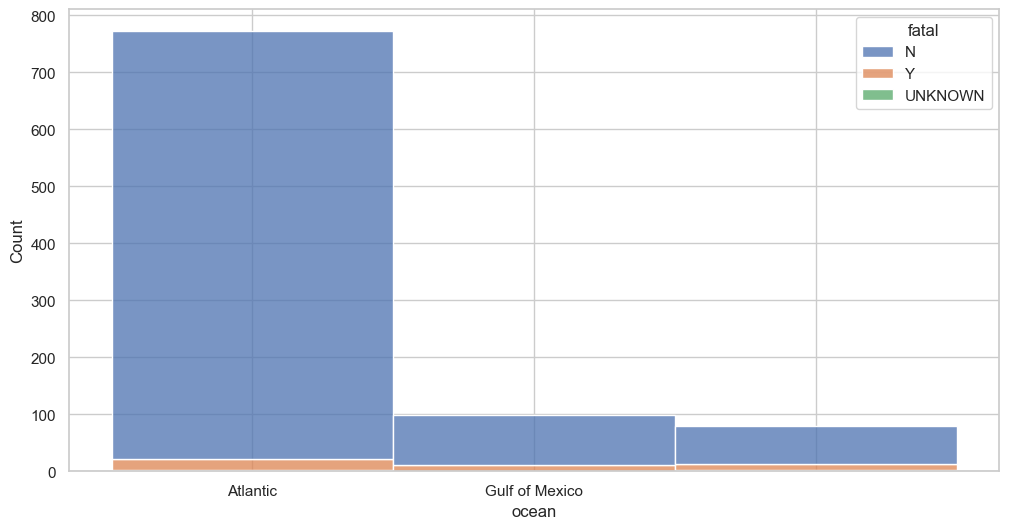

In [432]:
sns.histplot(data=dfFlorida, x="ocean", hue="fatal", multiple="stack");

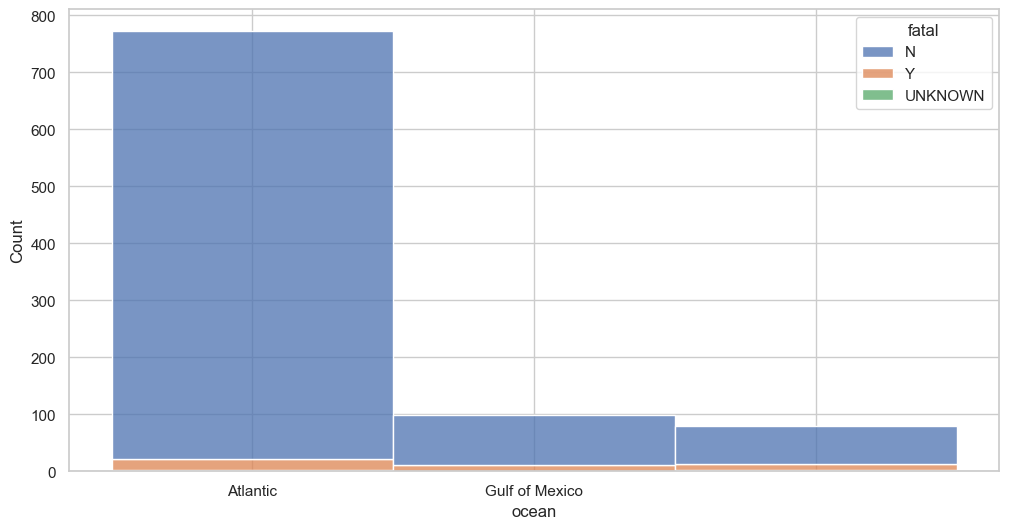

In [433]:
sns.histplot(data=dfFlorida, x="ocean", hue="fatal", multiple="stack");

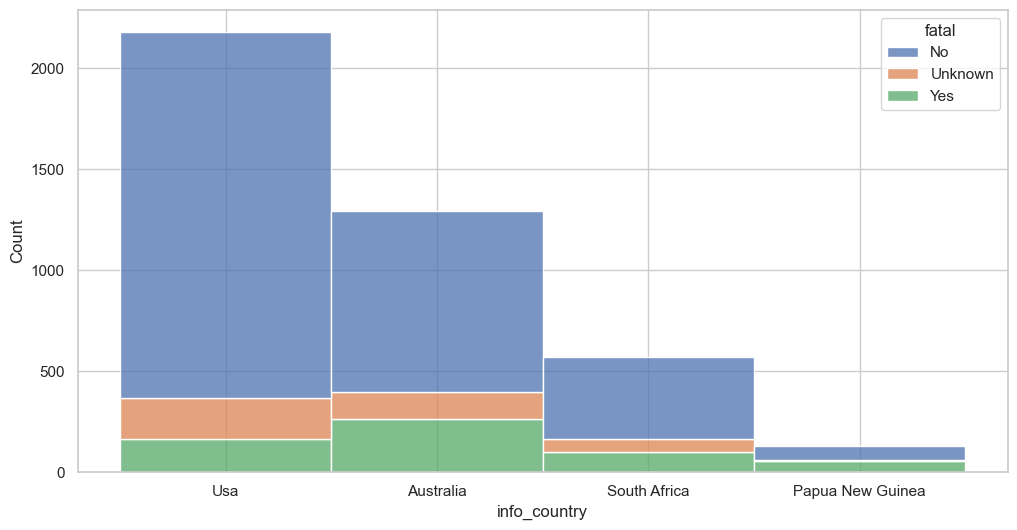

In [462]:
sns.histplot(data=dftop5countries, x="info_country", hue="fatal", multiple="stack");

In [473]:
dfPapua = dfagenonulls[dfagenonulls['info_country']=='Papua New Guinea']
dfPapua.shape

(47, 17)

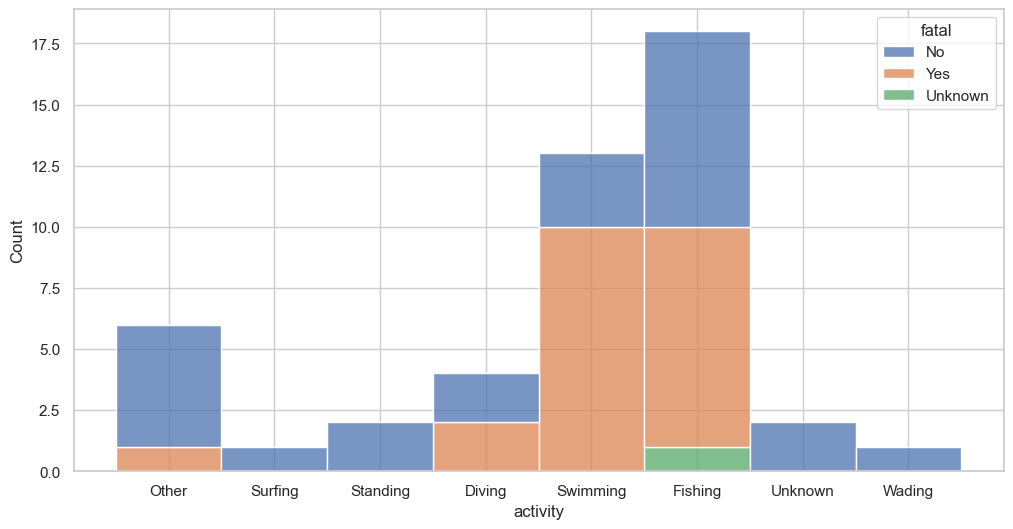

In [475]:
sns.histplot(data=dfPapua, x="activity", hue="fatal", multiple="stack");

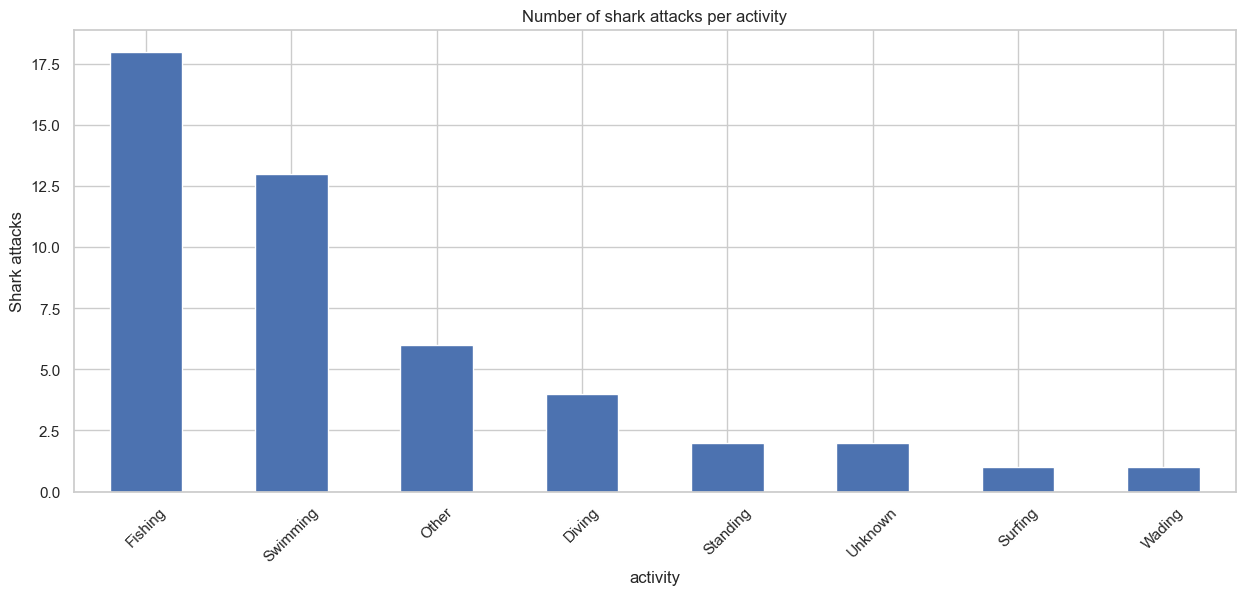

In [476]:
# let's get use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfPapua['activity'].value_counts().head(20).plot(kind="bar", title="Number of shark attacks per activity") # we are only interested in the 20 most common activities
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

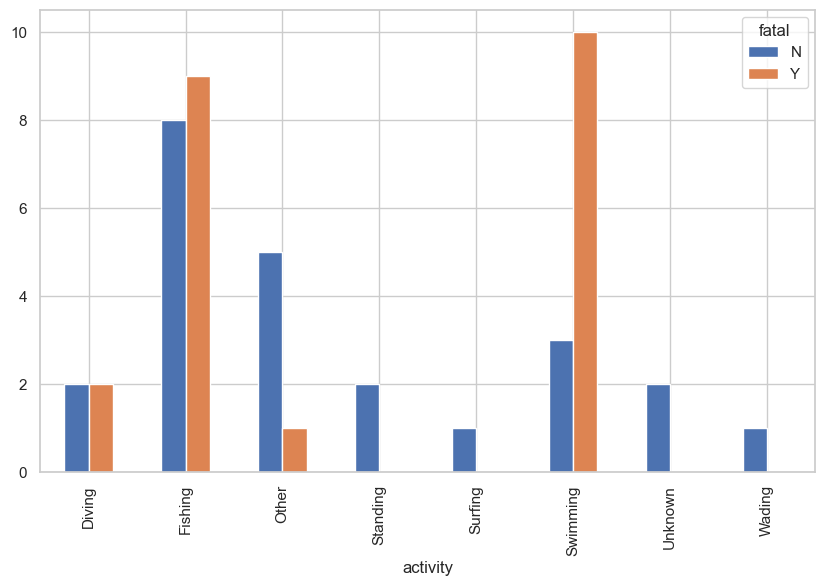

In [477]:
pd.crosstab(dfPapua['activity'], dfotheractivities.fatal).plot(kind="bar", figsize=(10, 6)); # fatality per activity

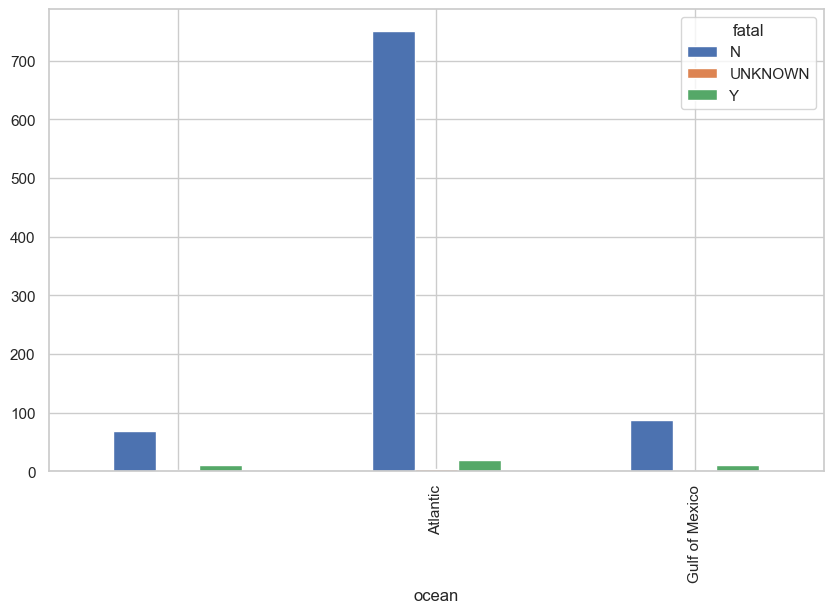

In [434]:
pd.crosstab(dfFlorida['ocean'], dfFlorida.fatal).plot(kind="bar", figsize=(10, 6)); # fatality per oceans

In [435]:
# different species in Florida 
dfcountries20clean[dfcountries20clean['area']=='Florida'].species.value_counts()

species
Shark involvement not confirmed                            23
4' shark                                                   21
3' shark                                                   19
1.2 m [4'] shark                                           17
6' shark                                                   15
                                                           ..
Nurse shark, 1.5 m [5']                                     1
0.9 m [3'] shark,  probably a blacktip or spinner shark     1
Unidentified                                                1
Bull shark, 2.1 m [7']                                      1
12' shark                                                   1
Name: count, Length: 274, dtype: int64

In [436]:
# different species in the top 20 countries
dfcountries20clean.species.value_counts()

species
White shark                                           142
Shark involvement prior to death was not confirmed     92
Shark involvement not confirmed                        81
Invalid                                                77
Tiger shark                                            58
                                                     ... 
3 to 3.5 m [10' to 11.5'] bull shark                    1
1.2 m [4'] spinner shark                                1
>1.8 m [6'] shark                                       1
Lemon shark, 4'                                         1
Said to involve a 6 m to 7.3 m [20' to 24'] shark       1
Name: count, Length: 1387, dtype: int64

In [481]:
# different species in all the countries
dfcountries.species.value_counts().head(20) # not a big difference... we could study only the top20 countries, but let's study it with all the countries

species
White shark                                           161
Shark involvement prior to death was not confirmed    105
Invalid                                                99
Shark involvement not confirmed                        88
Tiger shark                                            70
Shark involvement prior to death unconfirmed           59
Bull shark                                             48
4' shark                                               40
6' shark                                               39
Questionable incident                                  35
1.8 m [6'] shark                                       33
Questionable                                           32
1.5 m [5'] shark                                       32
3' shark                                               26
1.2 m [4'] shark                                       26
5' shark                                               26
2 m shark                                              25
4' to 

In [517]:
# let's apply regex to change it
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"not confirmed"), 'Shark involvement not confirmed', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"unconfirmed"), 'Shark involvement not confirmed', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"No shark"), 'Shark involvement not confirmed', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"Questionable"), 'Unknown', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"Invalid"), 'Unknown', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"small"), 'Unknown', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"^\d"), 'Unknown', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"White shark"), 'White shark', dfcountries['species'])
dfcountries['species'] = np.where(dfcountries['species'].str.contains(r"Bull shark"), 'Bull shark', dfcountries['species'])

print(dfcountries.species.nunique())
# different species in all the countries
dfcountries.species.value_counts().head(20)

745


species
Shark involvement not confirmed    2931
Unknown                            1394
White shark                         430
Bull shark                          125
Tiger shark                          70
Wobbegong shark                      21
Blacktip shark                       15
Blue shark                           14
Mako shark                           13
Raggedtooth shark                    12
Nurse shark                          12
Bronze whaler shark                  12
Zambesi shark                        11
Grey nurse shark                     11
Hammerhead shark                      9
Unidentified species                  8
Lemon shark                           7
Sandtiger shark                       7
Spinner shark                         6
Oceanic whitetip shark                6
Name: count, dtype: int64

In [521]:
dftop3species = dfcountries[(dfcountries.species =='White shark') | (dfcountries.species =='Bull shark') | (dfcountries.species =='Tiger shark')]

In [514]:
dfcountries[dfcountries['species'].str.contains('White')].shape

(433, 17)

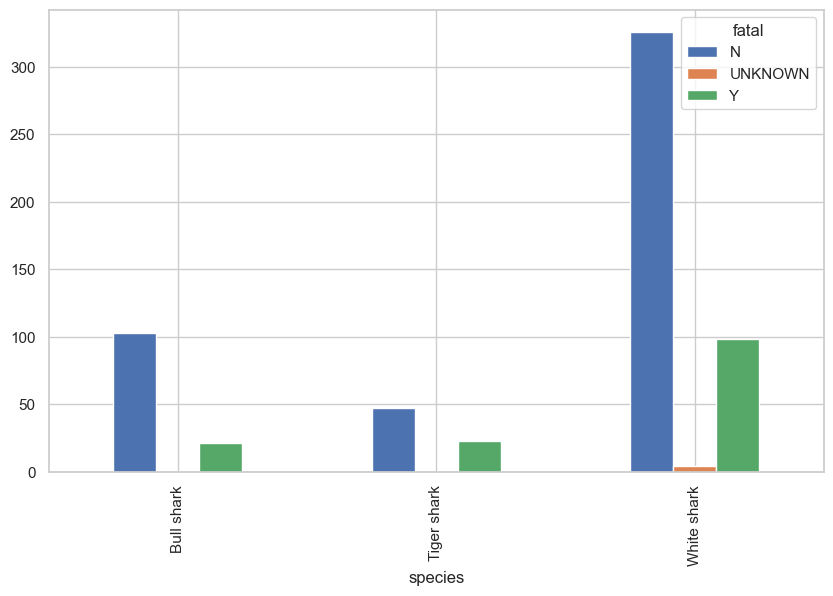

In [522]:
pd.crosstab(dftop3species['species'], dftop3species.fatal).plot(kind="bar", figsize=(10, 6)); # fatality per activity

In [565]:
dftop4activities = dfcountries[(dfcountries['activity']=='Surfing') | (dfcountries['activity']=='Swimming') | (dfcountries['activity']=='Fishing') | (dfcountries['activity']=='Diving')]
dftop4 = dftop4activities.copy()

In [564]:
dftop3species = dftop4activities[(dftop4activities['species'] =='White shark') | (dftop4activities['species']=='Bull shark') | (dftop4activities['species']=='Tiger shark')]

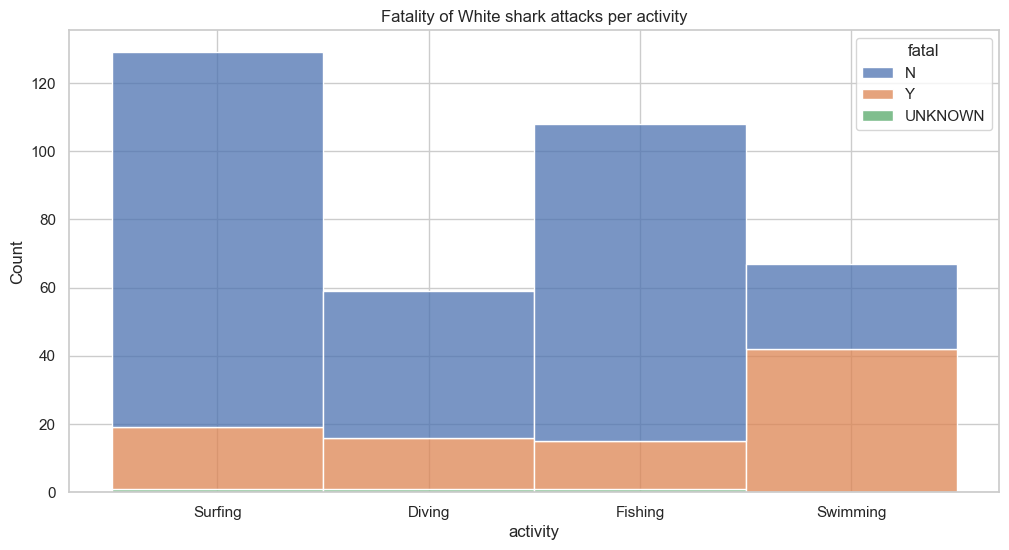

In [532]:
sns.histplot(data=dftop4[dftop4.species =='White shark'], x="activity", hue="fatal", multiple="stack")
plt.title('Fatality of White shark attacks per activity')
plt.show;

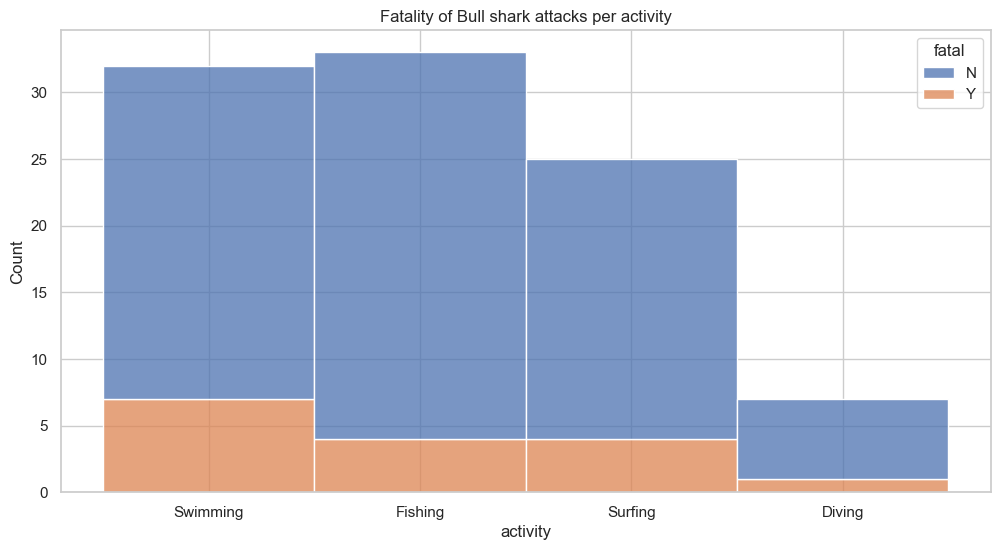

In [535]:
sns.histplot(data=dftop4[dftop4.species =='Bull shark'], x="activity", hue="fatal", multiple="stack")
plt.title('Fatality of Bull shark attacks per activity')
plt.show;

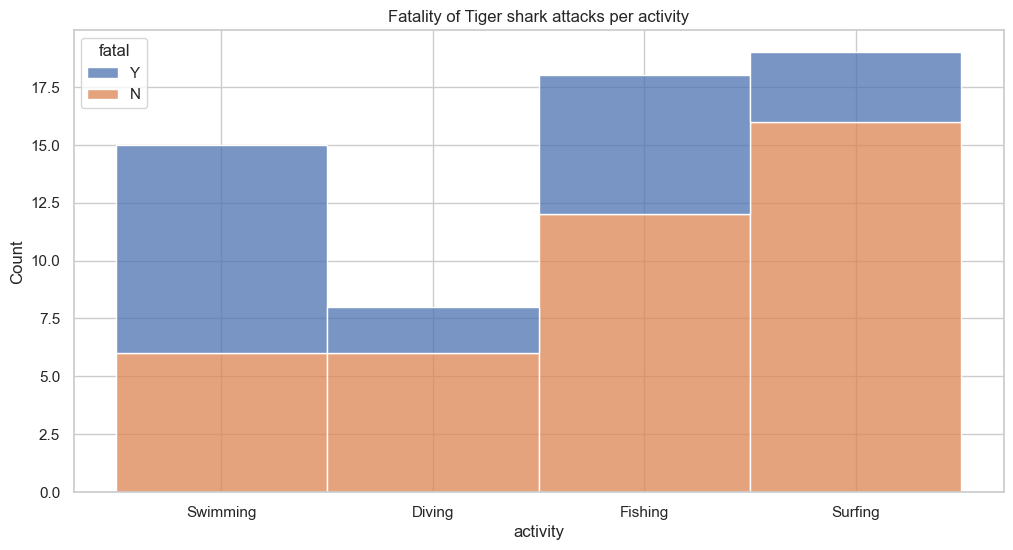

In [536]:
sns.histplot(data=dftop4[dftop4.species =='Tiger shark'], x="activity", hue="fatal", multiple="stack")
plt.title('Fatality of Tiger shark attacks per activity')
plt.show;

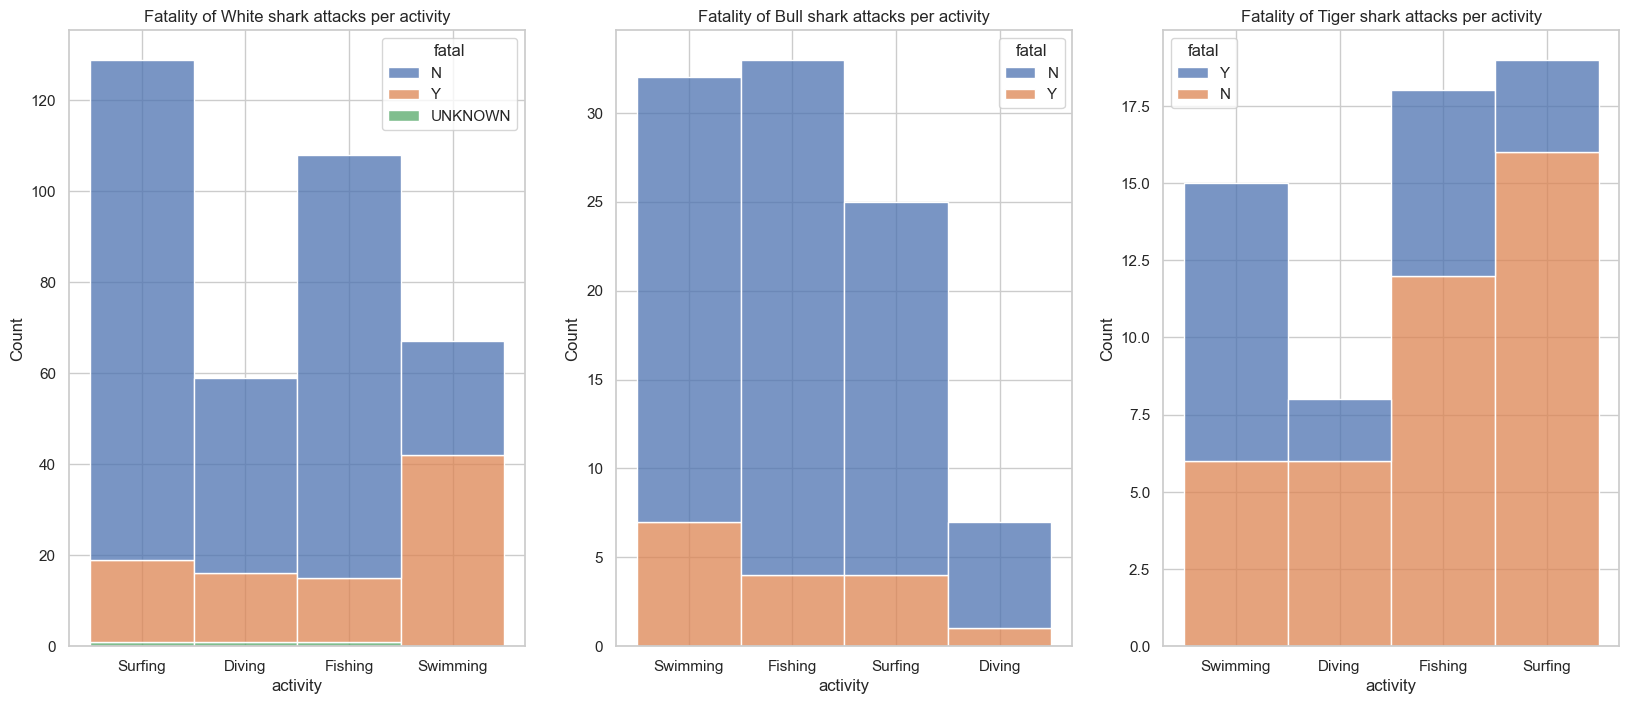

In [550]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

sns.histplot(data=dftop4[dftop4.species =='White shark'], x="activity", hue="fatal", multiple="stack", ax=axs[0])
axs[0].set_title('Fatality of White shark attacks per activity')
sns.histplot(data=dftop4[dftop4.species =='Bull shark'], x="activity", hue="fatal", multiple="stack", ax=axs[1])
axs[1].set_title('Fatality of Bull shark attacks per activity');
sns.histplot(data=dftop4[dftop4.species =='Tiger shark'], x="activity", hue="fatal", multiple="stack", ax=axs[2])
axs[2].set_title('Fatality of Tiger shark attacks per activity');


In [526]:
dftop3species.activity.value_counts()

activity
Surfing                                                         173
Fishing                                                         161
Swimming                                                        114
Diving                                                           75
Unknown                                                          20
Kayaking                                                         17
Standing                                                          9
Wading                                                            7
Floating                                                          4
Boat                                                              3
HMAS Parramatta torpedoed & sunk by the U-559                     2
Shark watching                                                    2
Boating                                                           2
Fell Overboard                                                    2
Rowing                                 

In [573]:
dfcountries.sample()

date  year          type info_country    country area  \
5566  1906.04.10.R.a & b  1906  Sea Disaster    Indonesia  Indonesia  NaN   

                         location  \
5566  40 miles from Tahane Island   

                                              activity  \
5566  The schooner Tahitienne foundered in a hurricane   

                              name sex    age info_age     injury fatal time  \
5566  Captain Baxter & Dick Chares   M  27.38      NaN  FATAL x 2     Y  NaN   

                              species                   investigator or source  
5566  Shark involvement not confirmed  Atlanta Constitution, 5/13/1906, et al.

In [438]:
# Countries with attacks of a White shark
dfcountries[dfcountries['species']=='White shark'].country.value_counts()

country
Usa                 43
Australia           41
South Africa        40
Italy                8
Croatia              6
New Zealand          4
Greece               3
Mexico               2
Chile                2
Papua New Guinea     1
Malta                1
Okinawa              1
Atlantic Ocean       1
Vietnam              1
Russia               1
Philippines          1
Brazil               1
France               1
Turkey               1
Spain                1
Canada               1
Name: count, dtype: int64

In [591]:
# Countries with attacks of a White shark
dfcountries[dfcountries['fatal']=='Y'].country.value_counts()

country
Australia                    265
Usa                          165
South Africa                  99
Papua New Guinea              54
Mexico                        40
                            ... 
Solomon Islands / Vanuatu      1
Southwest Pacific Ocean        1
Bay Of Bengal                  1
Samoa                          1
Cook Islands                   1
Name: count, Length: 126, dtype: int64

In [439]:
# let's just continue until we know how to analize the data based in 'countries', no need to waste time now cleaning this data

In [440]:
dfarea = dfcountries.copy()
dfarea.area.value_counts()

area
Florida                           1024
New South Wales                    469
Queensland                         305
Hawaii                             291
California                         287
                                  ... 
Open sea                             1
Madeira                              1
St. Thomas Bay                       1
Near Dakar, Cap Vert Peninsula       1
Tongatapu                            1
Name: count, Length: 783, dtype: int64

In [441]:
dfarea.area.value_counts().head(20)

area
Florida                  1024
New South Wales           469
Queensland                305
Hawaii                    291
California                287
KwaZulu-Natal             208
Western Cape Province     193
Western Australia         184
Eastern Cape Province     159
South Carolina            151
South Australia           102
North Carolina            100
Victoria                   89
Pernambuco                 74
Texas                      73
Torres Strait              67
North Island               66
New Jersey                 49
South Island               40
Tasmania                   38
Name: count, dtype: int64